### 1) Cargar librerias

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

### 2) Cargar dataset

In [4]:
# Ruta al directorio con el historico de ventas
ruta = "D:/pycaret_entorno/Dataset_original"

# Nombre del archivo histórico de ventas
ventas = "Base ventas historicas tanques.xlsx"

# Concatenar la ruta completa usando os.path.join
ruta_completa = os.path.join(ruta, ventas)

# Cargar las hojas de Excel en DataFrames
hoja0 = pd.read_excel(ruta_completa, sheet_name='2019')
hoja1 = pd.read_excel(ruta_completa, sheet_name='2020')
hoja2 = pd.read_excel(ruta_completa, sheet_name='2021')
hoja3 = pd.read_excel(ruta_completa, sheet_name='2022')
hoja4 = pd.read_excel(ruta_completa, sheet_name='2023')
hoja5 = pd.read_excel(ruta_completa, sheet_name='2024')

### 3) Exploración de los datos

In [5]:
# Revisar columnas de cada hoja
print("Columnas ventas 2019:", hoja0.columns)
print("Columnas ventas 2020:", hoja1.columns)
print("Columnas ventas 2021:", hoja2.columns)
print("Columnas ventas 2022:", hoja3.columns)
print("Columnas ventas 2023:", hoja4.columns)
print("Columnas ventas 2024:", hoja5.columns)
    

Columnas ventas 2019: Index(['Fecha', 'BODEGA MOVIMIENTO', 'DESCRIPCION', 'CODIGO SAP',
       'NOMBRE ITEM SAP', 'VENTAS NETAS UNIDADES', 'VENTAS NETAS KILOS',
       'VENTAS NETAS PESOS'],
      dtype='object')
Columnas ventas 2020: Index(['Fecha', 'BODEGA MOVIMIENTO', 'DESCRIPCION', 'CODIGO SAP',
       'NOMBRE ITEM SAP', 'VENTAS NETAS UNIDADES', 'VENTAS NETAS KILOS',
       'VENTAS NETAS PESOS'],
      dtype='object')
Columnas ventas 2021: Index(['Fecha', 'BODEGA MOVIMIENTO', 'DESCRIPCION', 'CODIGO SAP',
       'NOMBRE ITEM SAP', 'VENTAS NETAS UNIDADES', 'VENTAS NETAS KILOS',
       'VENTAS NETAS PESOS'],
      dtype='object')
Columnas ventas 2022: Index(['Fecha', 'BODEGA MOVIMIENTO', 'DESCRIPCION', 'CODIGO SAP',
       'NOMBRE ITEM SAP', 'CIUDAD', 'VENTAS NETAS UNIDADES',
       'VENTAS NETAS KILOS', 'VENTAS NETAS PESOS'],
      dtype='object')
Columnas ventas 2023: Index(['Fecha', 'BODEGA MOVIMIENTO', 'NIT SAP', 'CODIGO SAP',
       'NOMBRE ITEM SAP', 'CIUDAD', 'VENTAS NETAS UNID

In [6]:
# Desde el 2022 se empezo a agregar el campo ciudad, así que agregamos el campo "CIUDAD" vacio a las hojas de 2021 hacia atras
hoja0['CIUDAD'] = np.nan
hoja1['CIUDAD'] = np.nan
hoja2['CIUDAD'] = np.nan

In [7]:
# Seleccionar las columnas deseadas de cada hoja
columnas_deseadas = ['Fecha', 'CODIGO SAP', 'NOMBRE ITEM SAP', 'BODEGA MOVIMIENTO', 'CIUDAD', 'VENTAS NETAS UNIDADES']
#columnas_deseadas = ['Fecha', 'CODIGO SAP', 'NOMBRE ITEM SAP', 'BODEGA MOVIMIENTO', 'CIUDAD', 'VENTAS NETAS UNIDADES','VENTAS NETAS KILOS','VENTAS NETAS PESOS']

# Combinar las hojas en una sola conservando solo las columnas deseadas
ventas = pd.concat([hoja0[columnas_deseadas], hoja1[columnas_deseadas], hoja2[columnas_deseadas], hoja3[columnas_deseadas], hoja4[columnas_deseadas], hoja5[columnas_deseadas]], ignore_index=True)

# Ordenar el DataFrame resultante por la columna 'Fecha'
ventas = ventas.sort_values(by='Fecha')

# Muestreame el nuevo data frame
ventas.head()

Fecha   CODIGO SAP             NOMBRE ITEM SAP  \
85 2019-01-08  T1005028410  JUEGO TANQUE TOPTEC 1000 L   
86 2019-01-08  T1005028451   JUEGO TANQUE TOPTEC 500 L   
84 2019-01-08  T1005028410  JUEGO TANQUE TOPTEC 1000 L   
90 2019-01-09  T1005028425   JUEGO TANQUE TOPTEC 250 L   
87 2019-01-09  T1005028451   JUEGO TANQUE TOPTEC 500 L   

                 BODEGA MOVIMIENTO CIUDAD  VENTAS NETAS UNIDADES  
85  PRODUCTO TERMINADO                NaN                     25  
86  PRODUCTO TERMINADO                NaN                      1  
84  PRODUCTO TERMINADO                NaN                      4  
90  PRODUCTO TERMINADO                NaN                      4  
87  BOD SATEL TOPTEC BQLLA            NaN                      8

In [8]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34336 entries, 85 to 32151
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha                  34336 non-null  datetime64[ns]
 1   CODIGO SAP             34336 non-null  object        
 2   NOMBRE ITEM SAP        34336 non-null  object        
 3   BODEGA MOVIMIENTO      34336 non-null  object        
 4   CIUDAD                 22254 non-null  object        
 5   VENTAS NETAS UNIDADES  34336 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.8+ MB


#### Analicemos las columnas cuantitativas

In [9]:
ventas.describe()

Fecha  VENTAS NETAS UNIDADES
count                          34336           34336.000000
mean   2022-04-02 13:55:45.013979392               9.350885
min              2019-01-08 00:00:00            -238.000000
25%              2021-04-09 00:00:00               1.000000
50%              2022-07-15 00:00:00               5.000000
75%              2023-05-24 00:00:00              13.000000
max              2024-02-29 00:00:00             805.000000
std                              NaN              20.309946

No podemos tener ventas negativas, así que descartamos los registros con valores negativos

In [10]:
ventas = ventas.loc[ventas['VENTAS NETAS UNIDADES'] > 0]
#ventas = ventas.loc[(ventas['VENTAS NETAS UNIDADES'] > 0) & (ventas['VENTAS NETAS KILOS'] > 0) & (ventas['VENTAS NETAS PESOS'] > 0)]

In [11]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29982 entries, 85 to 32151
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha                  29982 non-null  datetime64[ns]
 1   CODIGO SAP             29982 non-null  object        
 2   NOMBRE ITEM SAP        29982 non-null  object        
 3   BODEGA MOVIMIENTO      29982 non-null  object        
 4   CIUDAD                 18333 non-null  object        
 5   VENTAS NETAS UNIDADES  29982 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.6+ MB


In [12]:
# Resetear los indices del dataframe
ventas = ventas.reset_index(drop=True)
ventas.head()

Fecha   CODIGO SAP             NOMBRE ITEM SAP  \
0 2019-01-08  T1005028410  JUEGO TANQUE TOPTEC 1000 L   
1 2019-01-08  T1005028451   JUEGO TANQUE TOPTEC 500 L   
2 2019-01-08  T1005028410  JUEGO TANQUE TOPTEC 1000 L   
3 2019-01-09  T1005028425   JUEGO TANQUE TOPTEC 250 L   
4 2019-01-09  T1005028451   JUEGO TANQUE TOPTEC 500 L   

                BODEGA MOVIMIENTO CIUDAD  VENTAS NETAS UNIDADES  
0  PRODUCTO TERMINADO                NaN                     25  
1  PRODUCTO TERMINADO                NaN                      1  
2  PRODUCTO TERMINADO                NaN                      4  
3  PRODUCTO TERMINADO                NaN                      4  
4  BOD SATEL TOPTEC BQLLA            NaN                      8

#### Definiciones globales

In [13]:
# Crear un rango de fechas mensual que cubra todo el período de datos
fecha_inicio = ventas['Fecha'].min().replace(day=1)
fecha_fin = ventas['Fecha'].max().replace(day=1)
rango_fechas = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='MS')

# Función para gráficar ventas netas de una lista de productos
def graficar_ventas_netas_productos(productos,df_ventas):
    for producto in productos:
        # Filtrar los datos de cada producto
        df_producto = df_ventas[df_ventas['NOMBRE ITEM SAP'] == producto]

        # Agrupar las ventas por mes y llenar los meses faltantes con 0
        df_mensual = df_producto.groupby(pd.Grouper(key='Fecha', freq='MS'))['VENTAS NETAS UNIDADES'].sum().reindex(rango_fechas, fill_value=0).reset_index()
        df_mensual.columns = ['Fecha', 'VENTAS NETAS UNIDADES']

        # Graficar
        plt.figure(figsize=(10, 5))
        plt.plot(df_mensual['Fecha'], df_mensual['VENTAS NETAS UNIDADES'], marker='o', linestyle='-')
        plt.title(f'serie de tiempo para {producto}')
        plt.xlabel('Fecha')
        plt.ylabel('VENTAS NETAS UNIDADES')
        plt.grid(True)
        plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad
        plt.tight_layout()  # Ajustar el diseño
        plt.show()

#### Analicemos las columnas cualitativas

Primero se aplicaran correcciones tipicas que son convertir todo a mayúsculas y eliminar errores de digitación con espacios

In [14]:
# Identificar columnas cualitativas (de tipo object o category)
columnas_cualitativas = ventas.select_dtypes(include=['object', 'category']).columns

# Convertir a mayúsculas solo esas columnas
ventas[columnas_cualitativas] = ventas[columnas_cualitativas].apply(lambda x: x.str.upper())

# Aplicar str.strip() para eliminar espacios en blanco al inicio y al final de cada valor
ventas[columnas_cualitativas] = ventas[columnas_cualitativas].apply(lambda x: x.str.strip())

# Reemplazar múltiples espacios por uno solo en cada columna cualitativa
ventas[columnas_cualitativas] = ventas[columnas_cualitativas].apply(lambda x: x.str.replace(r'\s+', ' ', regex=True))

In [15]:
nombres_items = ventas['NOMBRE ITEM SAP'].value_counts()
nombres_items

NOMBRE ITEM SAP
JUEGO TANQUE TOPTEC 1000 L                           2883
JUEGO TANQUE TOPTEC 500 L                            2412
JUEGO TANQUE TOPTEC 2000 L                           2022
TAPA TANQUE TOPTEC 1000 L                            1894
TANQUE TOPTEC 1000 L                                 1560
                                                     ... 
CABALLETE PVC P7                                        1
KIT JUEGO TANQUE 250 L AZUL (TANQUE 250L + TAPA)        1
VENTANA EN CALADO 0.61 X 0.61                           1
VENTANA EN CALADO 0.61 X 1.00                           1
KIT SISTEMA SEPTICO 6 A 10 PERSONAS CON ROSETONES       1
Name: count, Length: 144, dtype: int64

Como se tienen 144 productos diferentes se exportará a un CSV para revisarlos detenidamente en Excel

In [16]:
# Convertir a DataFrame y exportar a CSV
nombres_items_df = nombres_items.reset_index()
nombres_items_df.columns = ['Nombre Item', 'Frecuencia']
nombres_items_df.to_csv('nombres_items.csv', index=False)

Se identifican las siguientes inconsistencias:

- Algunos productos en su nombre tienen "TANQ" en vez de "TANQUE"
- Algunos productos en su nombre tienen "LTS" o "LT" en vez de "L"
- Algunos productos en su nombre tienen la capacidad seguido de la unidades (ej: 2000L, 6MM) y otros con un espacio de entre la capacidad y la unidad (ej: 1000 L, 6 MM)
- Unos productos tiene la palabra "JUEG0" con la letra "O" como un cero "0".
- Unos productos tiene la palabra "JUEGOTANQUE", es necesario separarla.
- Unificar nombre entre "JUEGO TANQUE TOPTEC AZUL BOTELLA 1100L" y "JUEGO TANQUE TOPTEC AZUL TIPO BOTELL 1100 LTS"
- Eliminar la notación del color del producto en el nombre
- Eliminar la palabra "NUEVO" en el nombre


In [17]:
# Se crea un nuevo DataFrame para realizar las correcciones
ventas_corregido = ventas

In [18]:
nombres_items = ventas_corregido['NOMBRE ITEM SAP'].value_counts()
nombres_items_df = nombres_items.reset_index()
nombres_items_df.columns = ['Nombre Item', 'Frecuencia']
nombres_items_df.to_csv('nombres_items_corregido_7.csv', index=False)

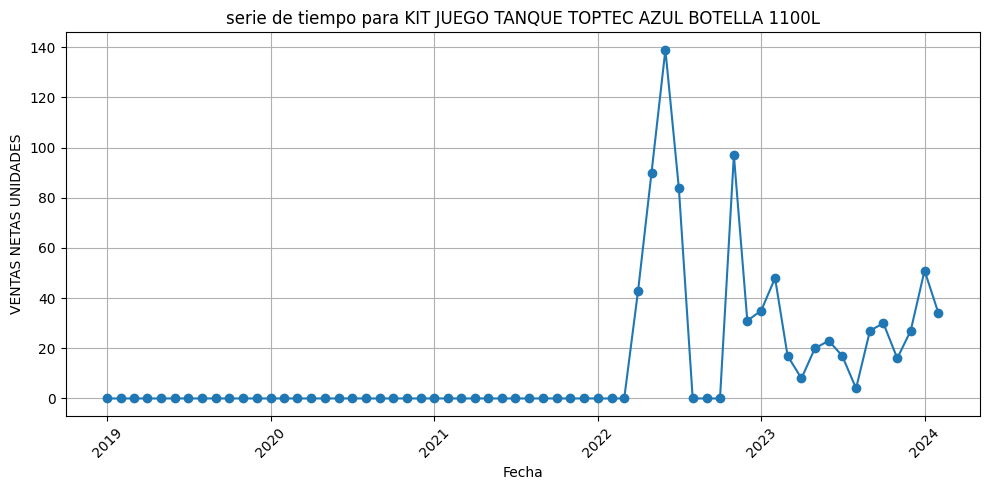

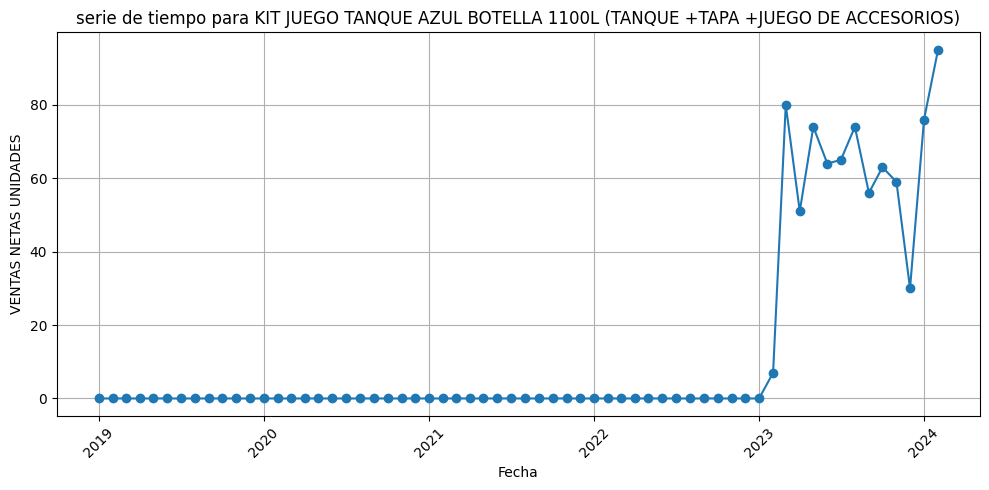

In [19]:
productos = ['KIT JUEGO TANQUE TOPTEC AZUL BOTELLA 1100L','KIT JUEGO TANQUE AZUL BOTELLA 1100L (TANQUE +TAPA +JUEGO DE ACCESORIOS)']
graficar_ventas_netas_productos(productos,ventas_corregido)

In [20]:
ventas_corregido['NOMBRE ITEM SAP'] = (
    ventas_corregido['NOMBRE ITEM SAP']
    .str.replace(r'\bTANQ\b', 'TANQUE', regex=True)  # Cambiar "TANQ" por "TANQUE"
    .str.replace(r'\bLTS\b', 'L', regex=True)  # Cambiar "LTS" por "L"
    .str.replace(r'\bLT\b', 'L', regex=True)  # Cambiar "LTS" por "L"
    .str.replace(r'(\d+)L\b', r'\1 L', regex=True)  # Asegurar formato "<CAPACIDAD> L"
    .str.replace(r'(\d+)MM\b', r'\1 MM', regex=True)  # Asegurar formato "<LONGITUD> MM"
    .str.replace(r'\bJUEG0\b', 'JUEGO', regex=True)  # Cambiar "JUEG0" (con cero) por "JUEGO"
    .str.replace('JUEGOTANQUE', 'JUEGO TANQUE')  # Asegurar espacio entre "JUEGO" y "TANQUE"
    .str.replace('TIPO BOTELL', 'BOTELLA')  # Cambiar "TIPO BOTELL" por "BOTELLA"
    .str.replace(' AZUL', '')  # Eliminar la referencia de color azul
    .str.replace(' NEGRO', '')  # Eliminar la referencia de color negro
    .str.replace(' NUEVO', '')  # Eliminar la palabra nuevo
    .str.replace('+TAPA ', '+ TAPA ')  # Eliminar la palabra nuevo
    .str.replace(' TAPA+', ' TAPA +')  # Eliminar la palabra nuevo
)

Volvemos a analizar los nombres de los productos posterior a sus correcciones

In [21]:
nombres_items = ventas_corregido['NOMBRE ITEM SAP'].value_counts()
nombres_items_df = nombres_items.reset_index()
nombres_items_df.columns = ['Nombre Item', 'Frecuencia']
nombres_items_df.to_csv('nombres_items_corregido.csv', index=False)

In [22]:
nombres_items

NOMBRE ITEM SAP
JUEGO TANQUE TOPTEC 1000 L                           3080
JUEGO TANQUE TOPTEC 500 L                            2570
JUEGO TANQUE TOPTEC 2000 L                           2119
TAPA TANQUE TOPTEC 1000 L                            1992
TANQUE TOPTEC 1000 L                                 1659
                                                     ... 
KIT SISTEMA SEPTICO 11 A 15 PERSONAS CON PIEDRA         1
VENTANA EN CALADO 0.61 X 1.00                           1
VENTANA EN CALADO 0.61 X 0.61                           1
CABALLETE PVC P7                                        1
KIT SISTEMA SEPTICO 6 A 10 PERSONAS CON ROSETONES       1
Name: count, Length: 100, dtype: int64

Como aún contamos con 100 nombres de productos diferentes y para algunos se tienen muy pocos registros, vamos a revisar los productos diferentes a tanques, que son el principal producto para observar como ha sido el comportamientos de estos productos "secundarios" a lo largo del tiempo

In [23]:
list_nombres_items = nombres_items.index.tolist()
list_nombres_items

['JUEGO TANQUE TOPTEC 1000 L',
 'JUEGO TANQUE TOPTEC 500 L',
 'JUEGO TANQUE TOPTEC 2000 L',
 'TAPA TANQUE TOPTEC 1000 L',
 'TANQUE TOPTEC 1000 L',
 'TAPA TANQUE TOPTEC 500 L',
 'TANQUE TOPTEC 500 L',
 'TAPA TANQUE TOPTEC 2000 L',
 'TANQUE TOPTEC 2000 L',
 'JUEGO TANQUE TOPTEC 250 L',
 'KIT JUEGO TANQUE 1000 L (TANQUE 1000 L + TAPA + JUEGO DE CONEXIONES )',
 'TAPA TANQUE TOPTEC 250 L',
 'KIT JUEGO TANQUE 500 L (TANQUE 500 L + TAPA + JUEGO DE CONEXIONES )',
 'TANQUE PLASTICO TOPTEC 2000 L',
 'KIT JUEGO TANQUE 2000 L (TANQUE 2000 L + TAPA + JUEGO DE CONEXIONES )',
 'KIT JUEGO TANQUE TOPTEC 1000 L',
 'TANQUE TOPTEC 250 L',
 'TRAMPA DE GRASAS 250 L',
 'KIT JUEGO TANQUE TOPTEC 500 L',
 'JUEGO TANQUE TOPTEC BOTELLA 1100 L',
 'TANQUE PLASTICO TOPTEC 1000 L',
 'TANQUE SEPTICO 1000 L',
 'TANQUE TOPTEC BOTELLA 1100 L',
 'TAPA TOPTEC BOTELLA 1100 L',
 'KIT JUEGO TANQUE 250 L (TANQUE 250 L + TAPA + JUEGO DE CONEXIONES )',
 'TANQUE PLASTICO TOPTEC 500 L',
 'FILTRO ANAEROBICO 1000 L',
 'TANQUE BEBEDE

In [24]:
productos_secundarios = []
for item in list_nombres_items:
    if not "TANQUE" in item:
        productos_secundarios.append(item)

print("Se tienen %s productos diferentes a tanques"%len(productos_secundarios))   
productos_secundarios.sort()
print(productos_secundarios)

Se tienen 49 productos diferentes a tanques
['ARMECOLOR 1.00 X 2.44 ROJO', 'CABALLETE PVC P7', 'CRUCETA DISTRIBUCION 1000 L', 'CRUCETA DISTRIBUCION 2000 L', 'CRUCETA DISTRIBUCION 500 L', 'FALSO FONDO 1000 L', 'FALSO FONDO 2000 L', 'FALSO FONDO 500 L', 'FILTRO ANAEROBICO 1000 L', 'FILTRO ANAEROBICO 2000 L', 'FILTRO ANAEROBICO 500 L', 'KIT FILTRO ANAEROBICO DE 1000 L (FILTRO ANAEROBICO Y TAPA)', 'KIT FILTRO ANAEROBICO DE 2000 L (FILTRO ANAEROBICO Y TAPA)', 'KIT FILTRO ANAEROBICO DE 500 L (FILTRO ANAEROBICO Y TAPA)', 'KIT SISTEMA SEPTICO 1 A 5 PERSONAS CON PIEDRA', 'KIT SISTEMA SEPTICO 11 A 15 PERSONAS CON PIEDRA', 'KIT SISTEMA SEPTICO 6 A 10 PERSONAS CON ROSETONES', 'KIT TRAMPA DE GRASAS DE 250 L (TRAMPA DE GRASAS Y TAPA)', 'L PC ALVEO 2,10X11,60X6 MM CRIS', 'L PC ALVEO 2,10X11,60X6 MM OPAL', 'L PC ALVEO 2,10X5,90X10 MM BRON', 'LAMINA POLIC ALVEOLAR 6 MM', 'METROS GOMA SUPER', 'P. ALUMINIO 6MTSX5CMS SUPER', 'PALA CUADRADA 4303-23 CABO LARGO -TOMSON', 'PALA CUADRADA 4303-43 CABO LARGO-TOM

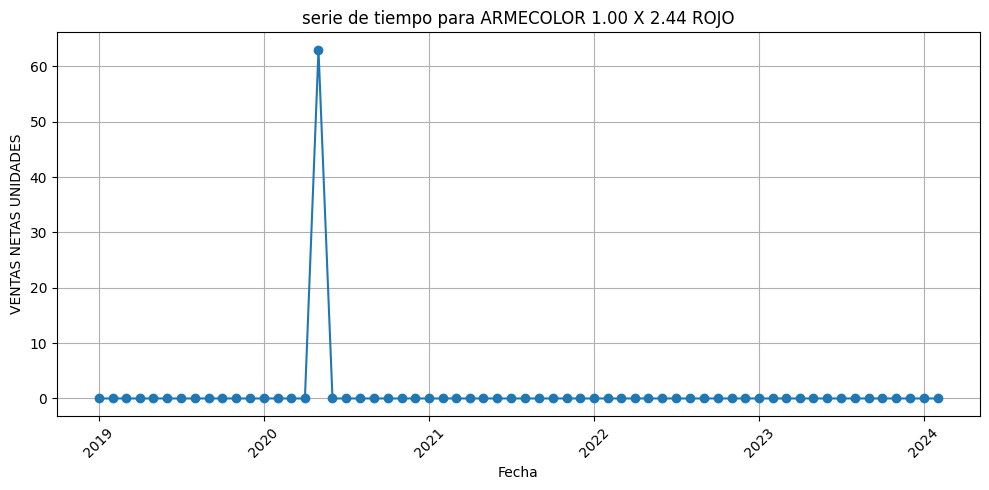

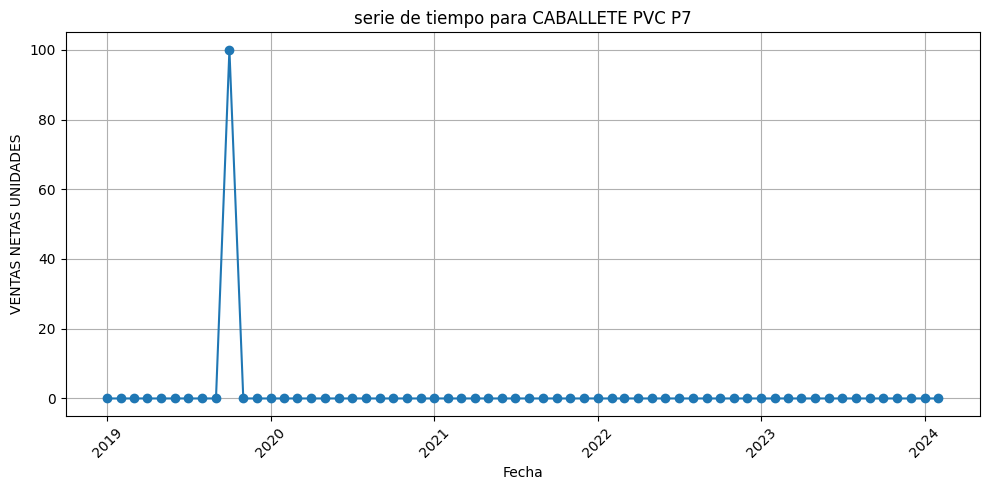

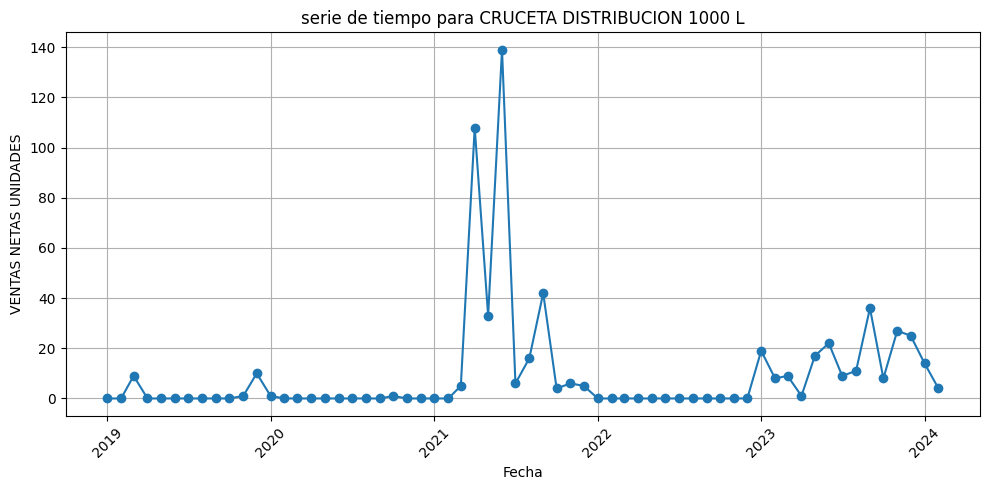

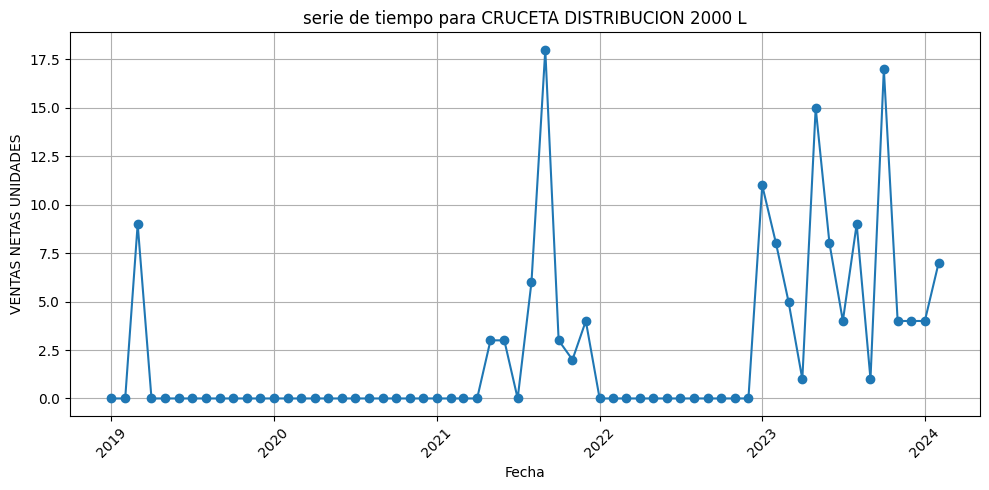

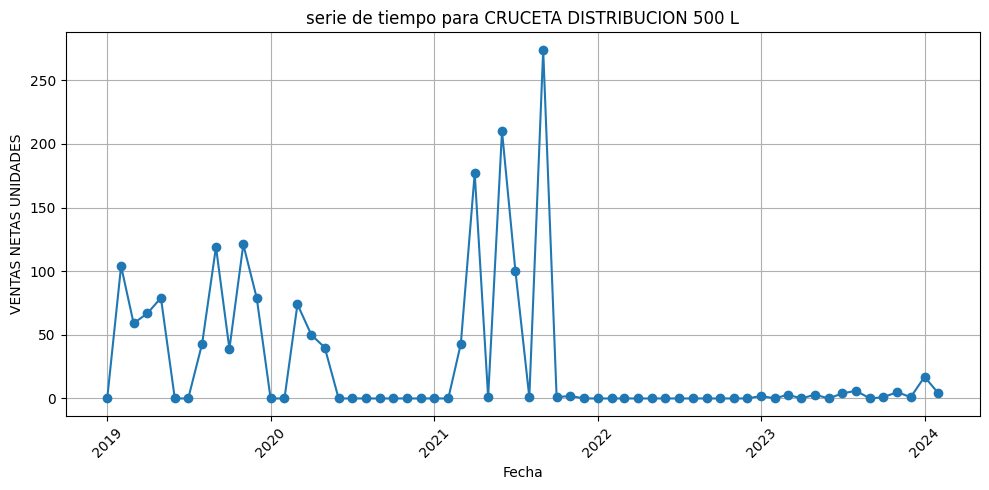

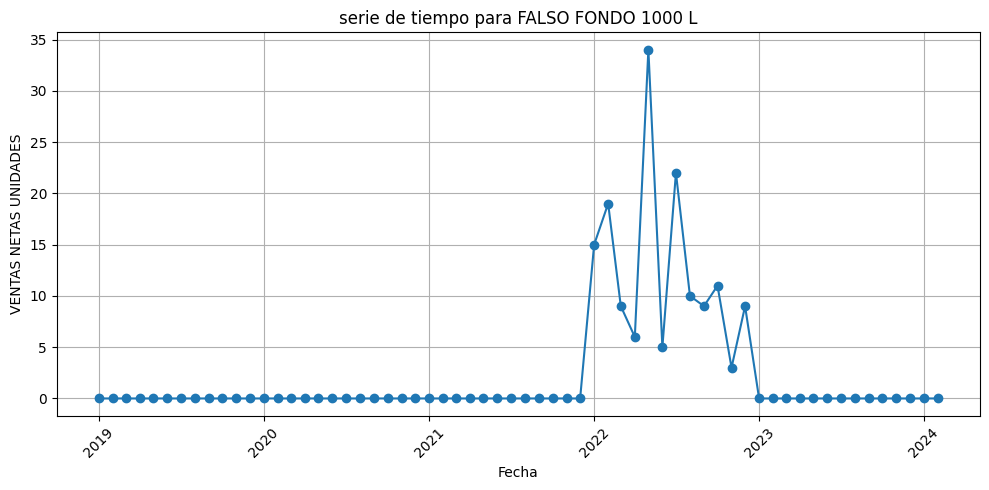

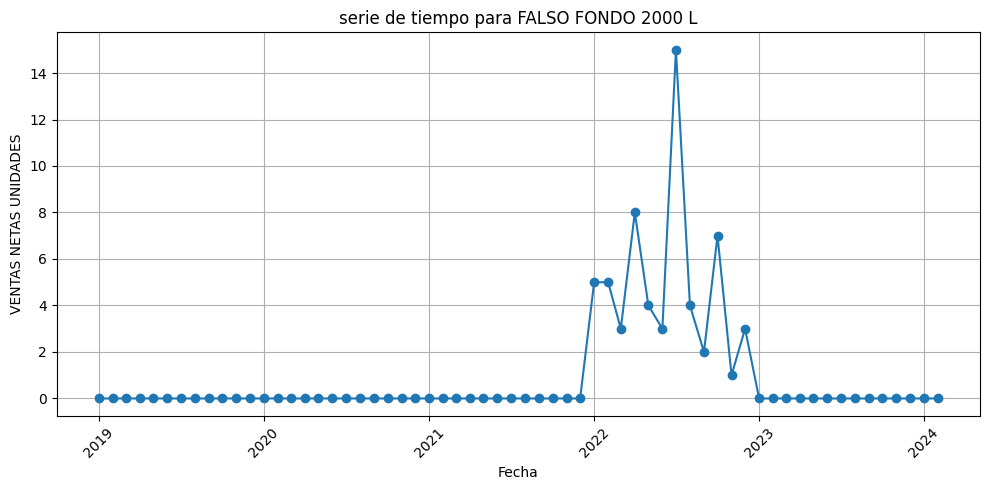

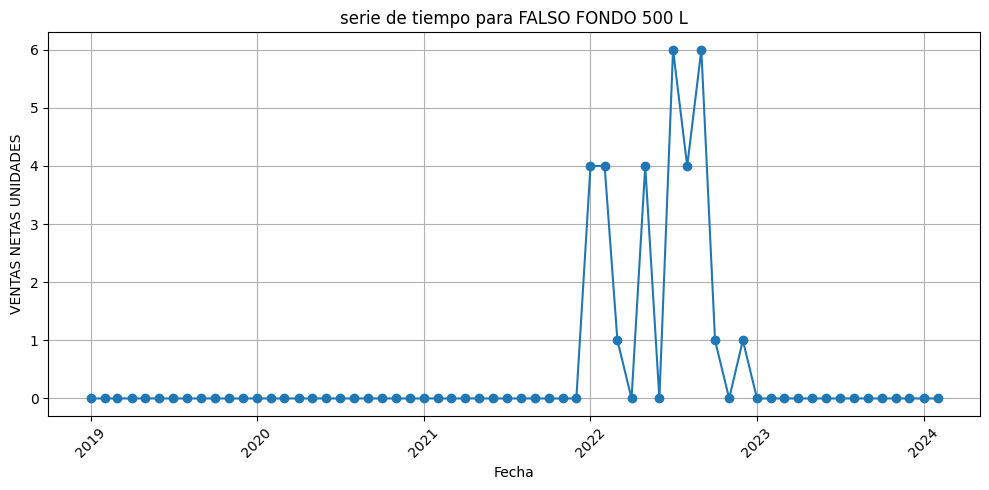

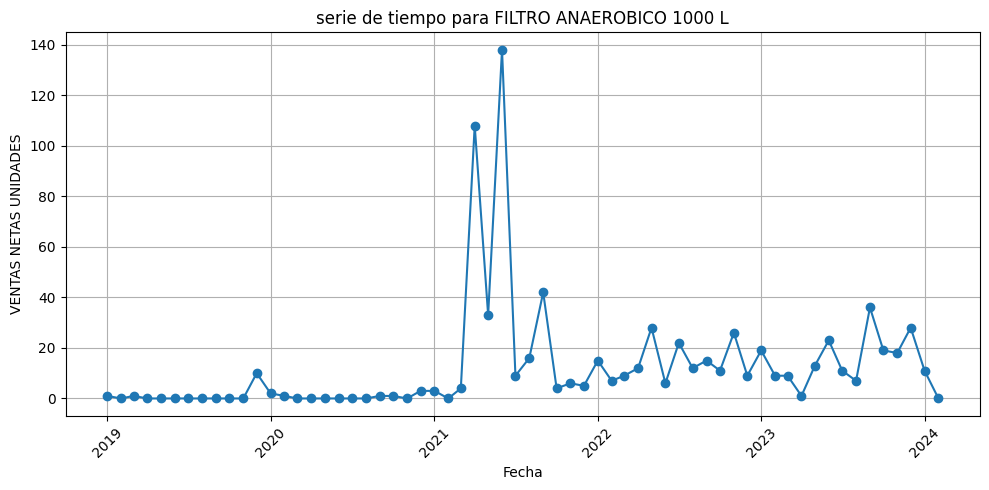

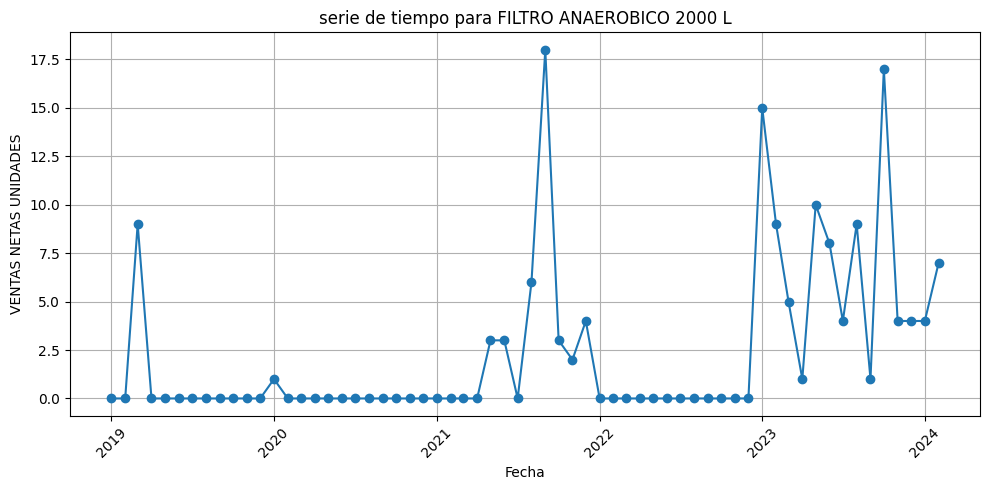

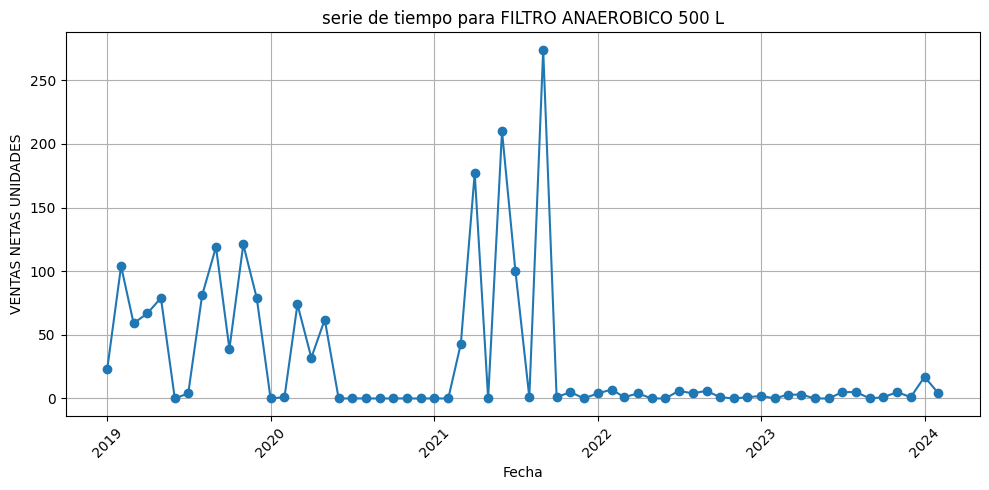

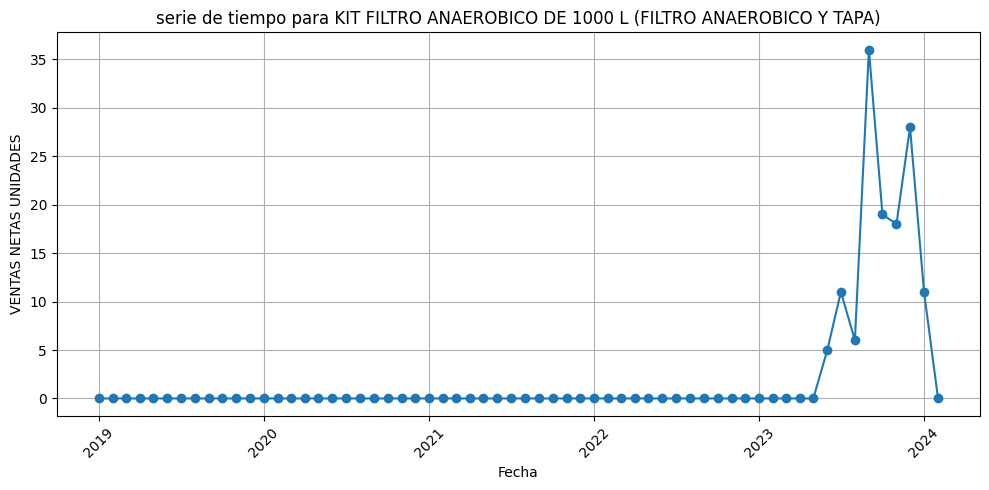

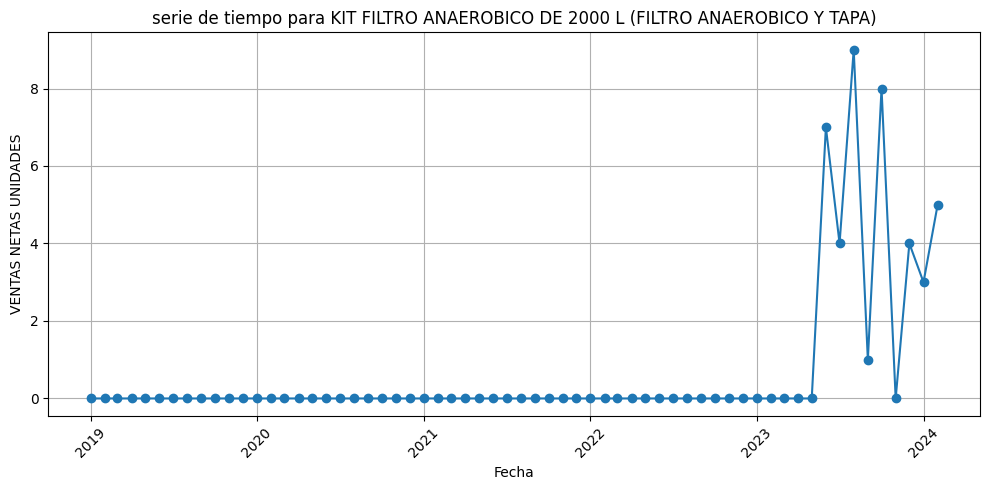

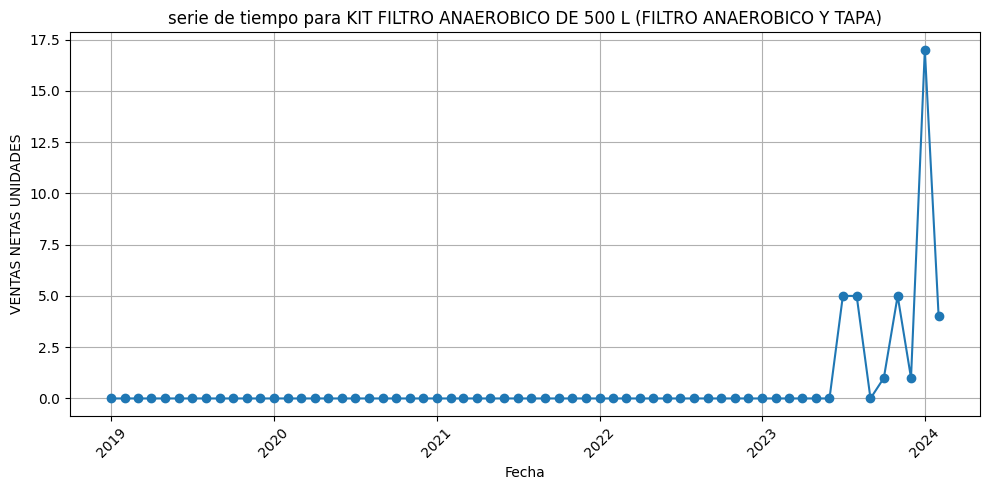

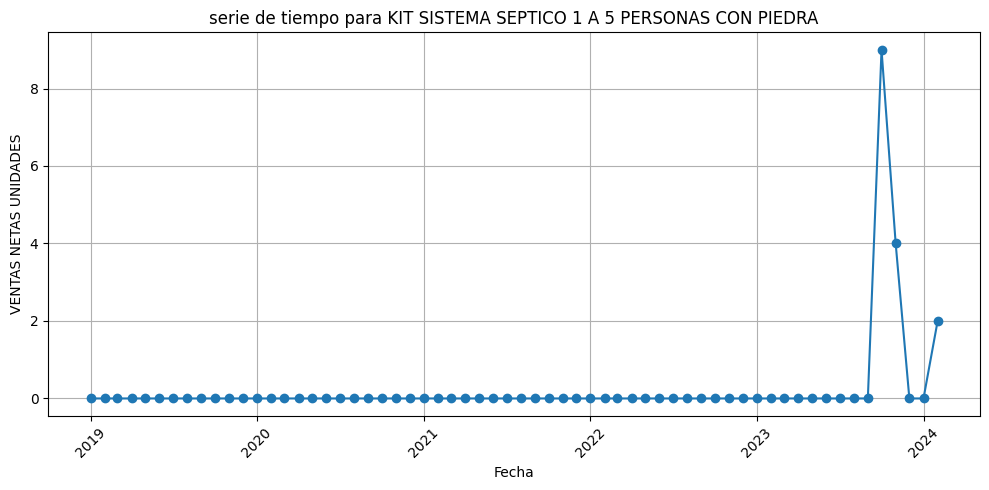

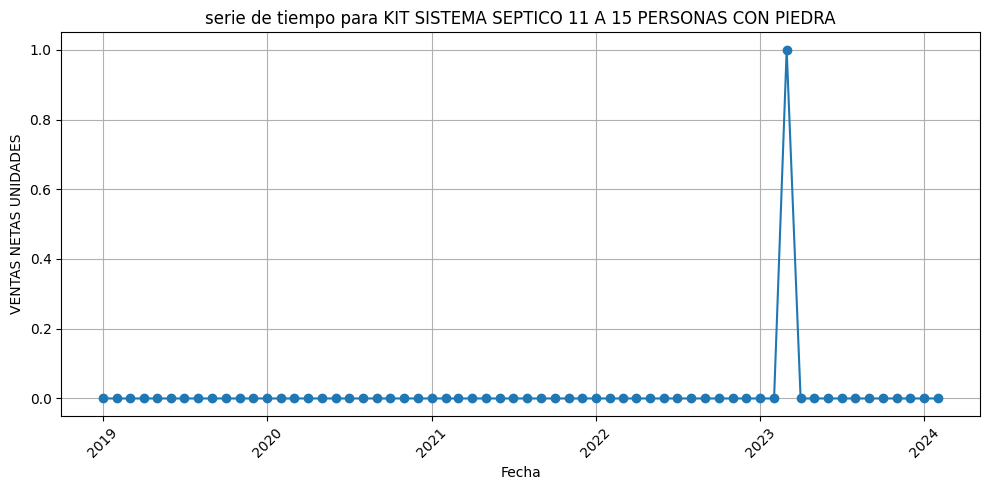

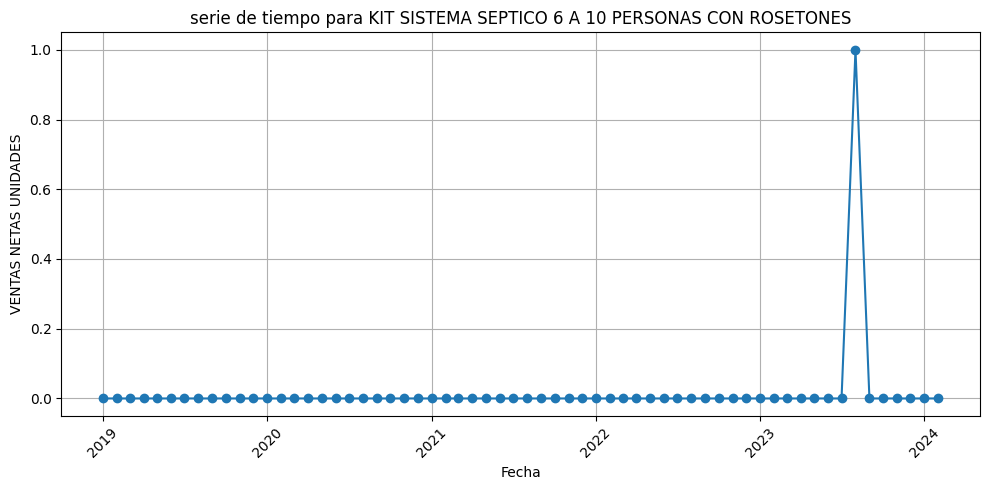

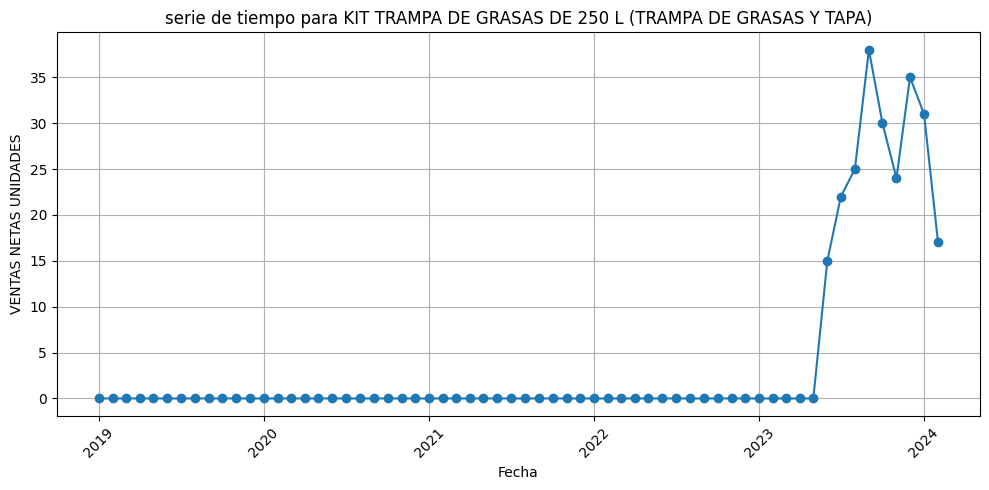

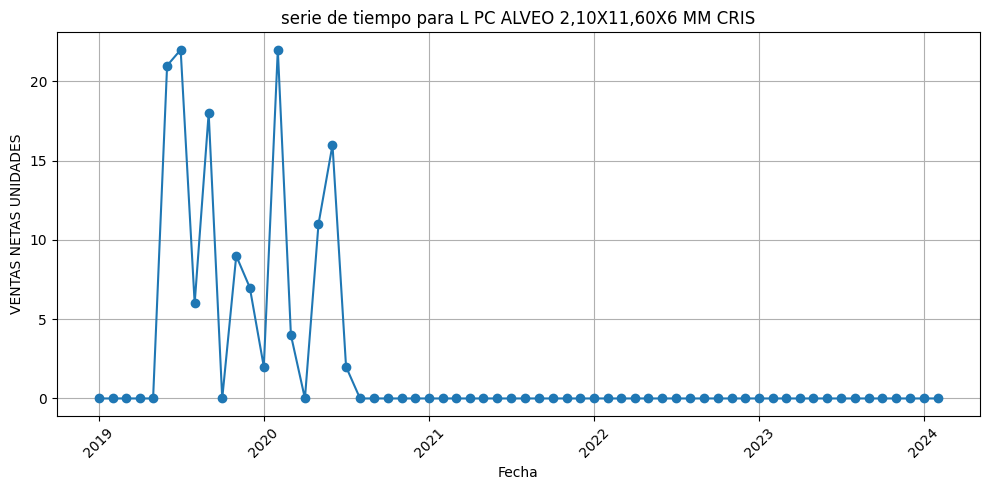

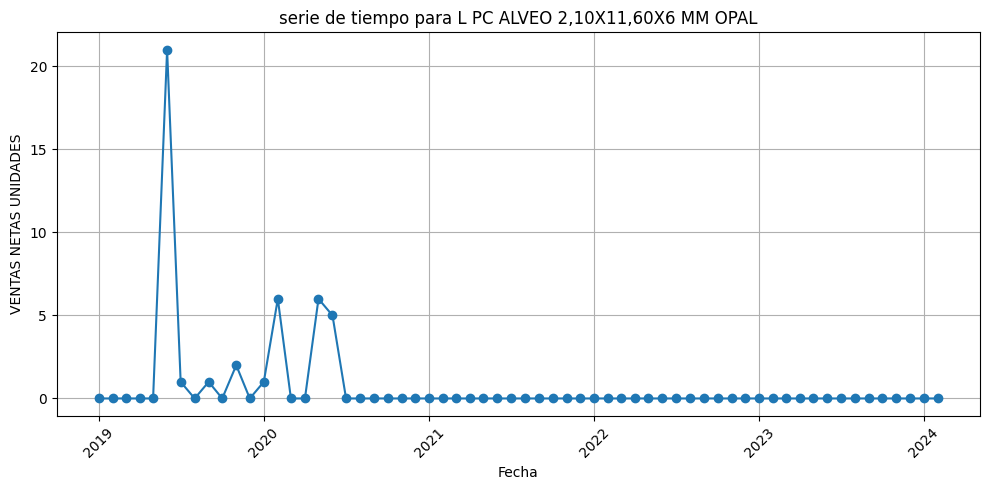

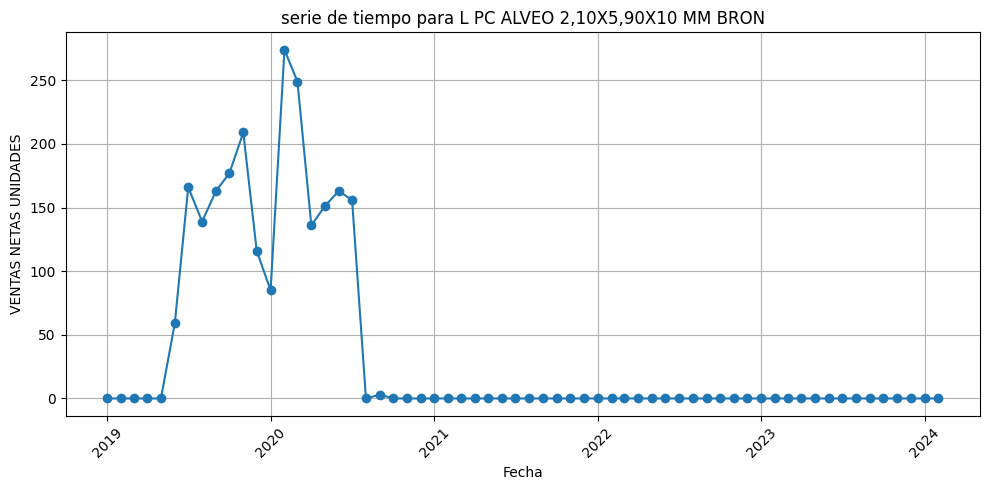

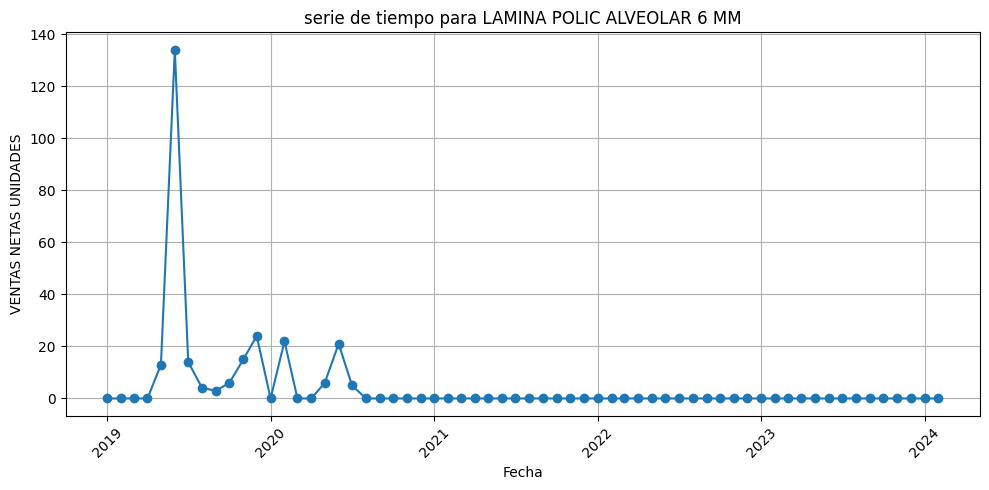

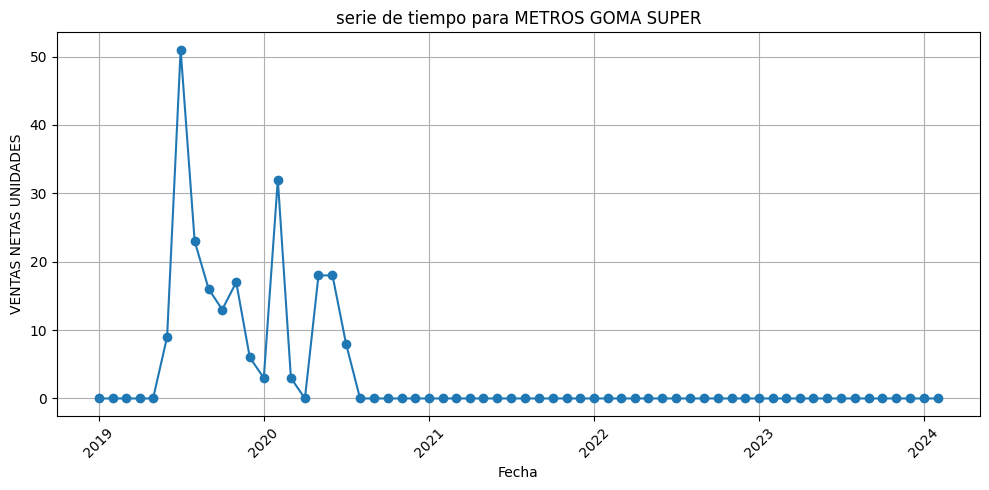

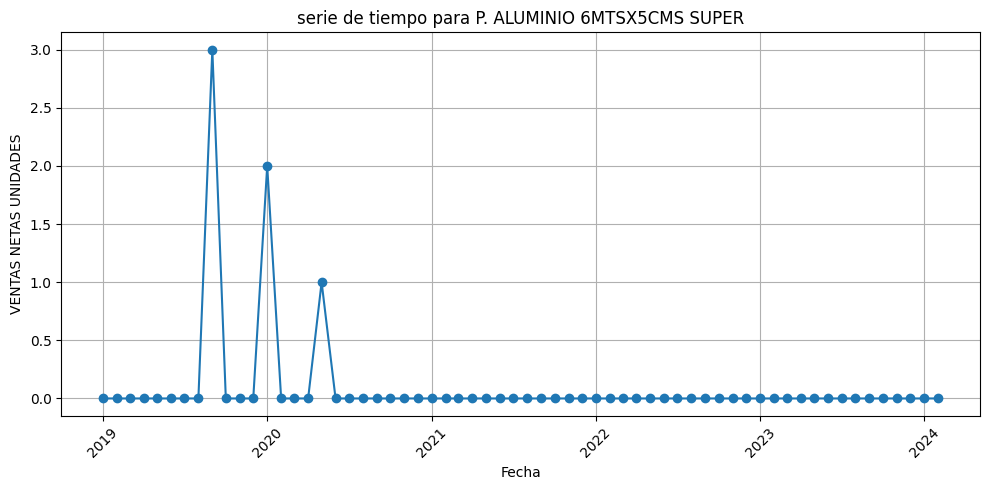

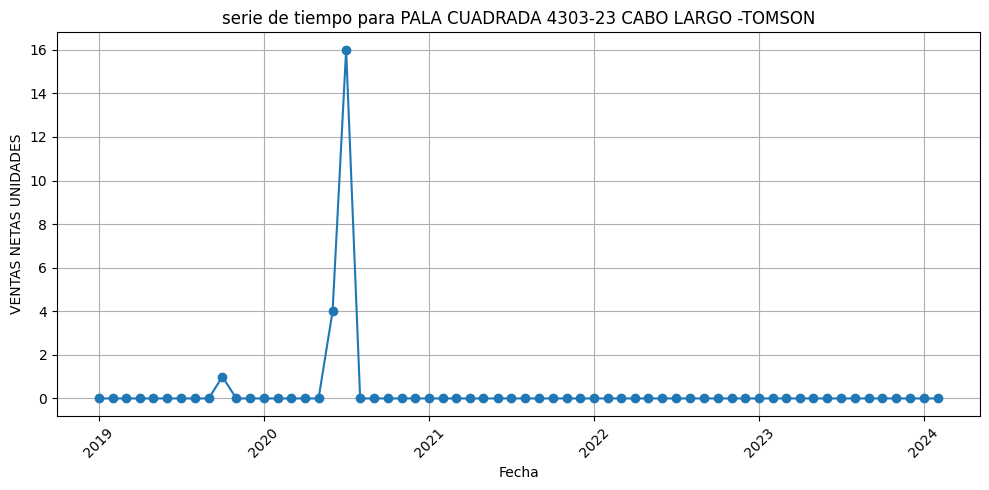

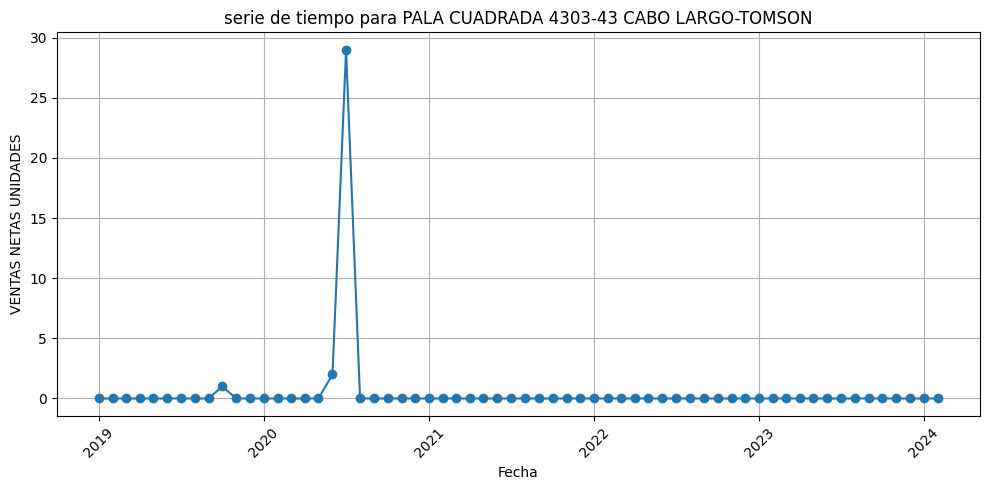

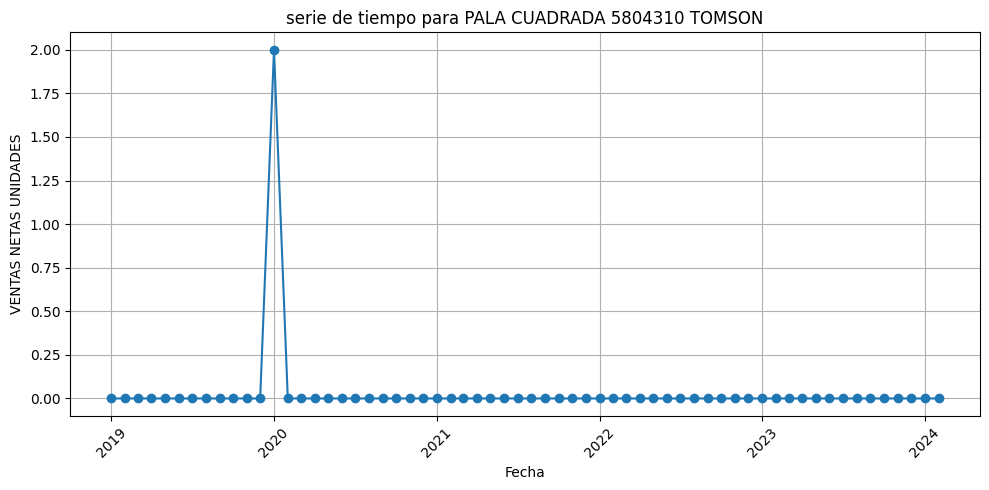

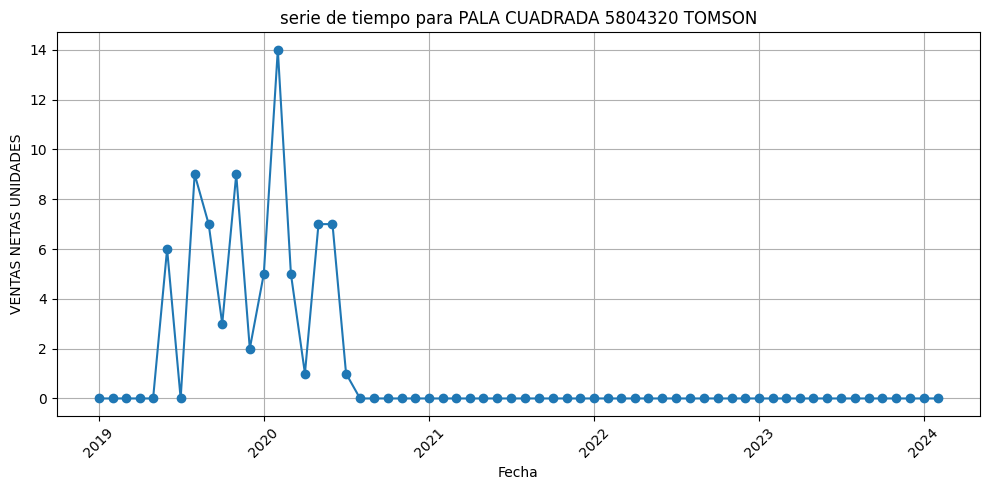

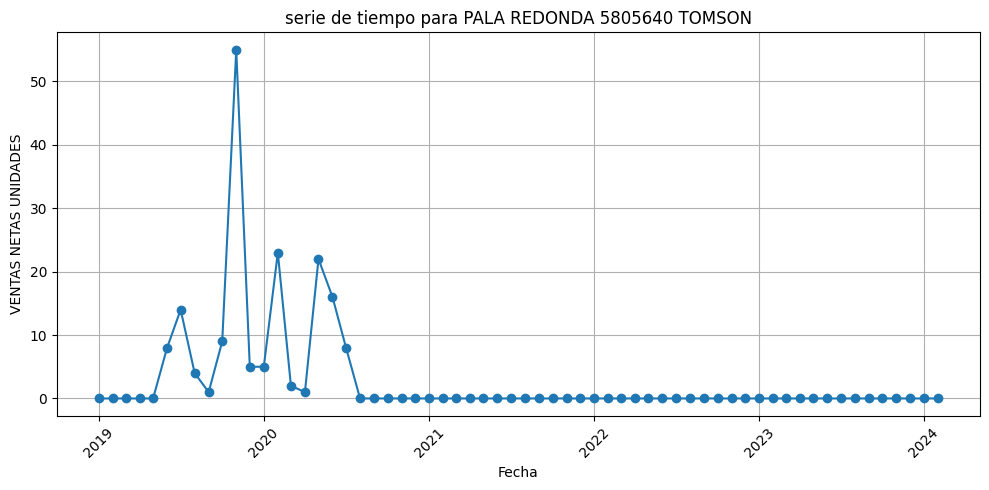

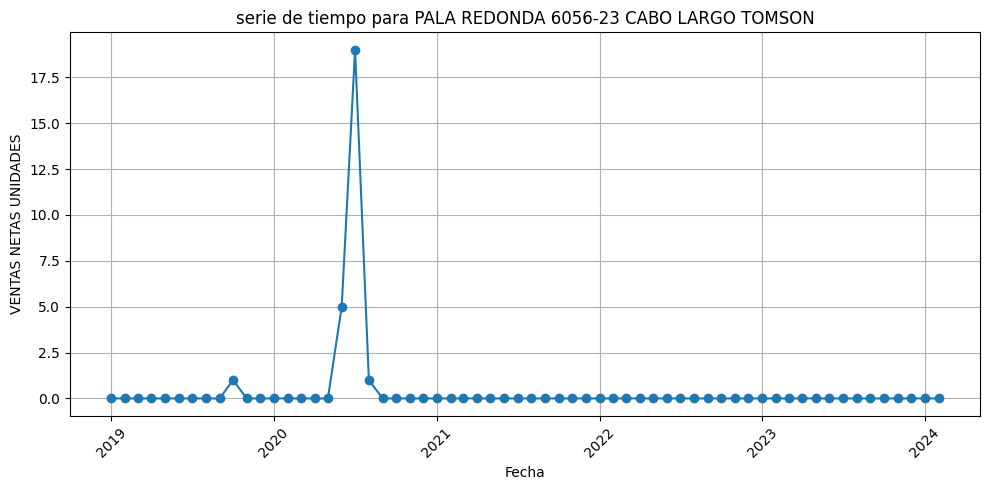

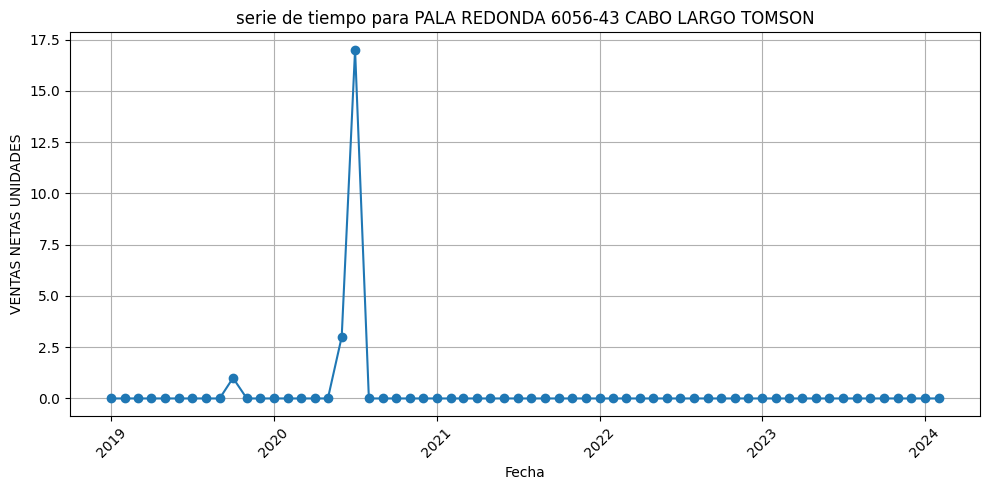

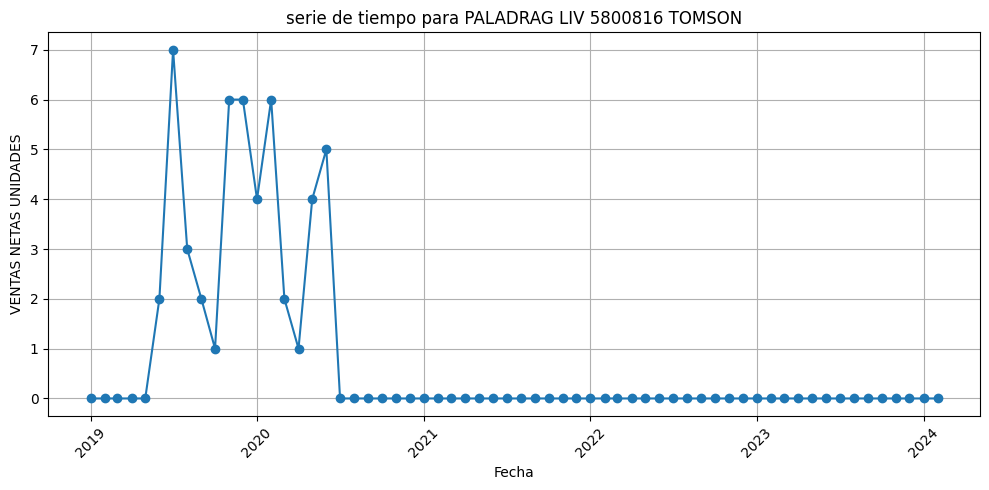

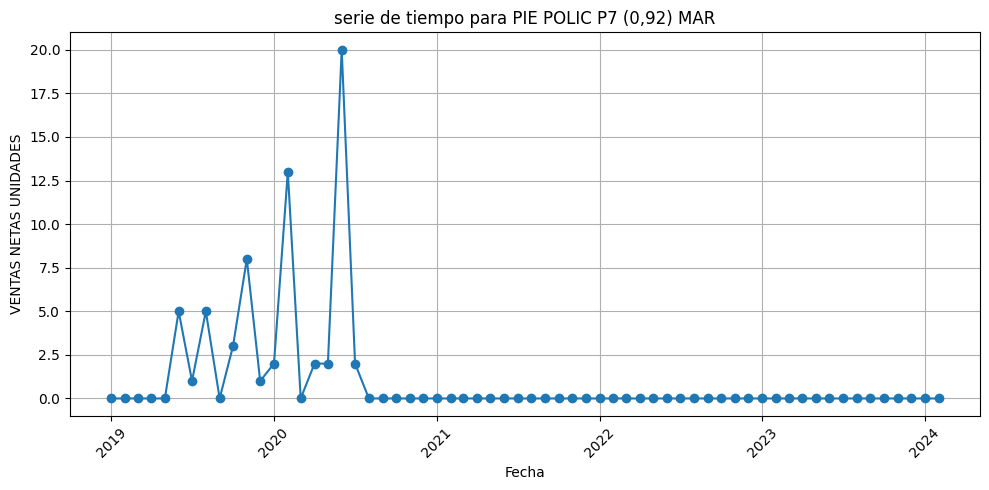

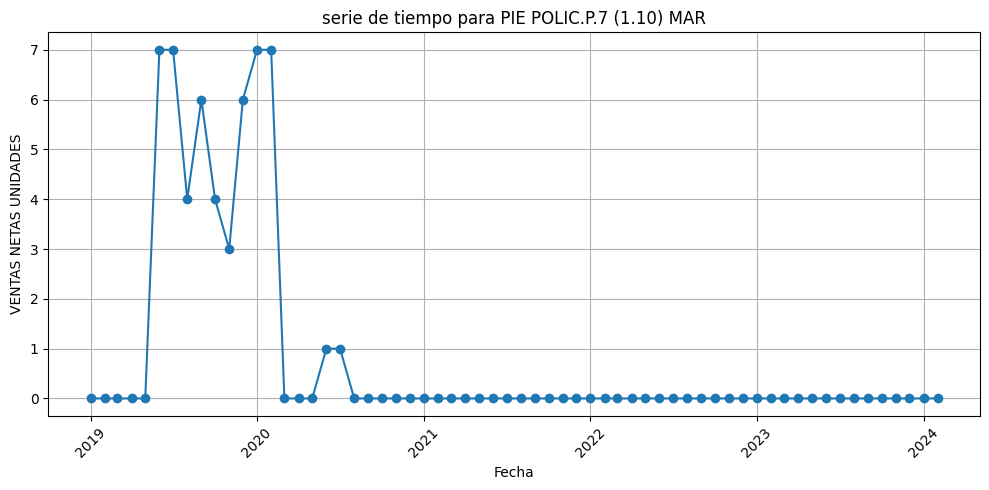

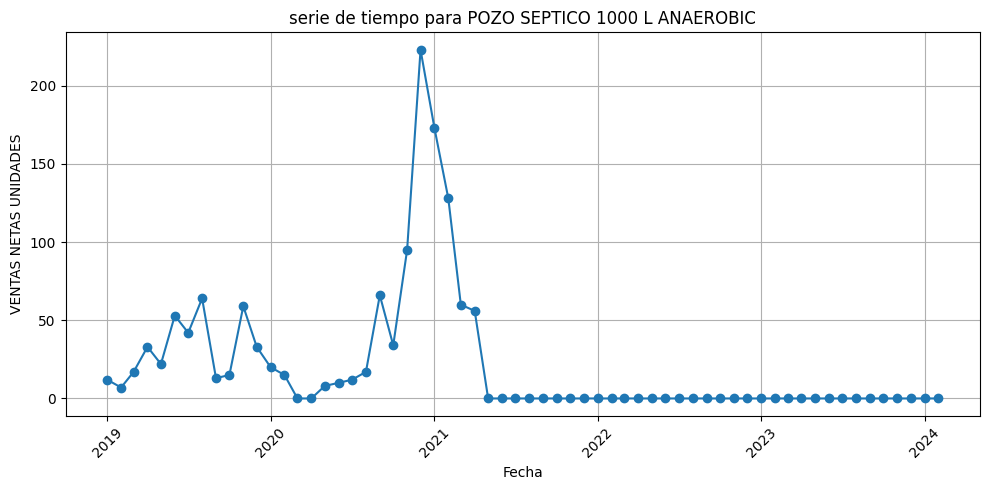

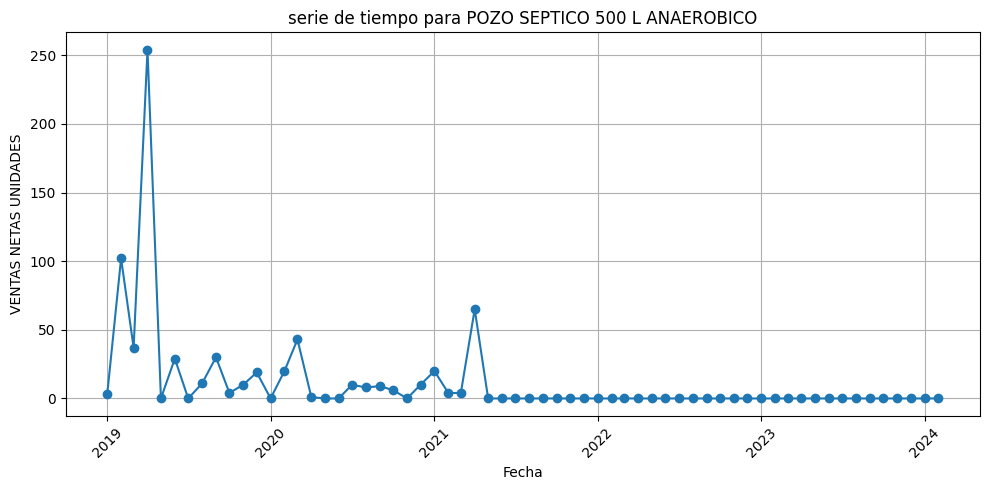

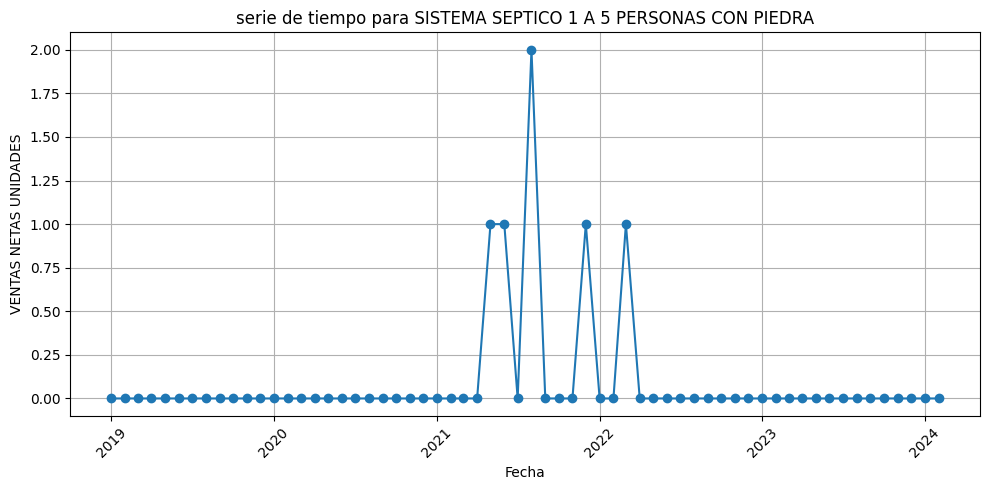

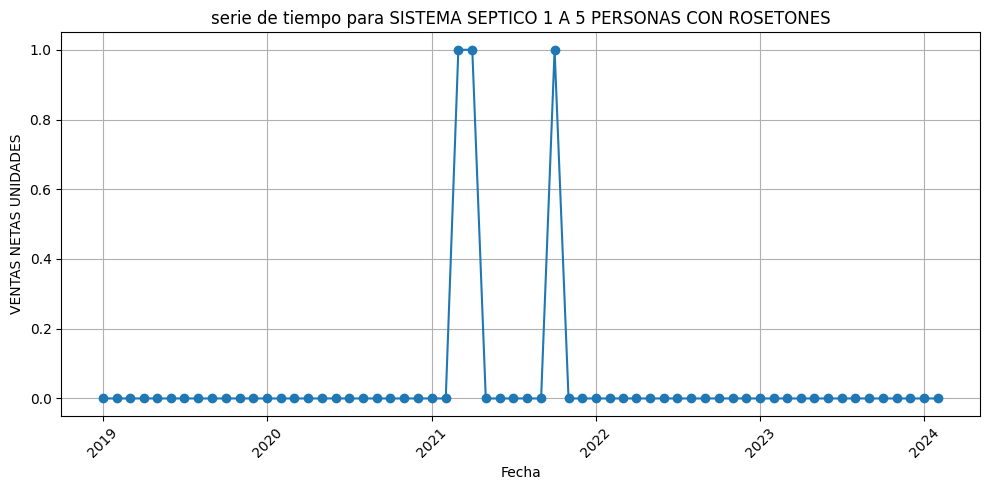

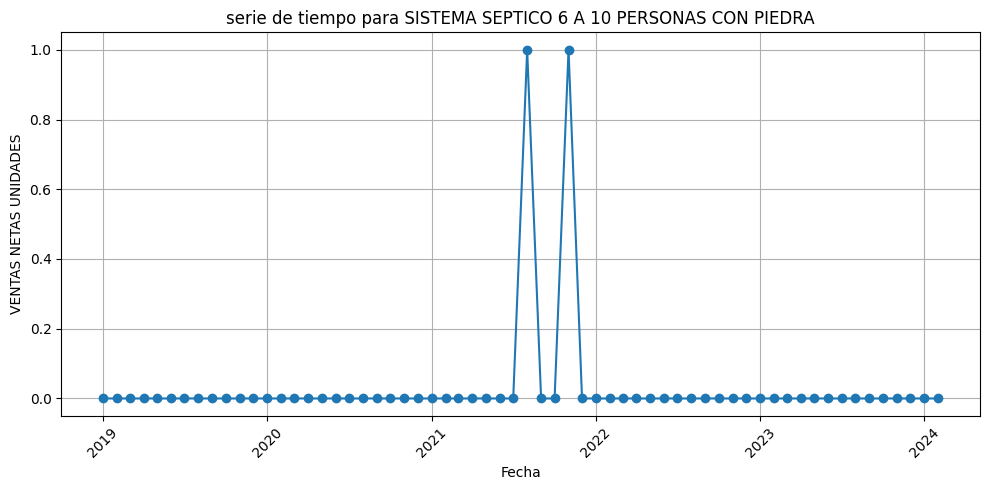

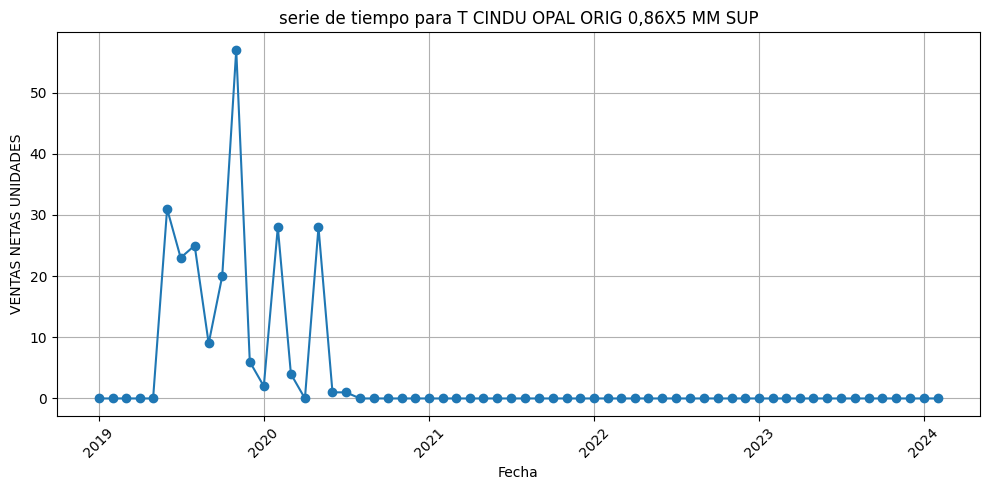

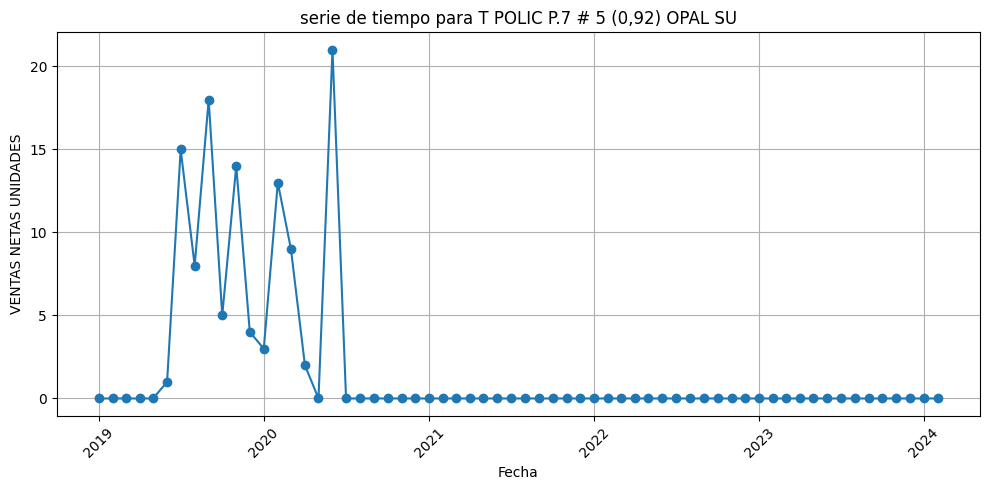

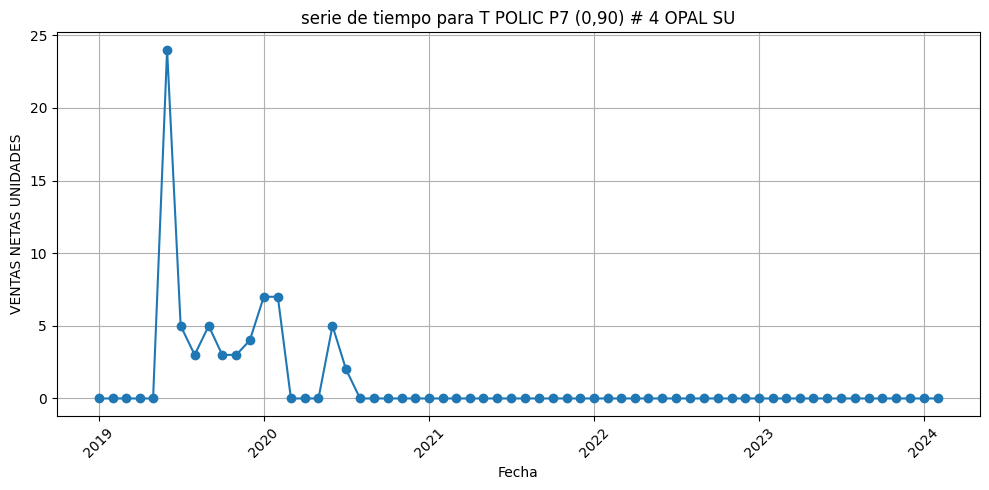

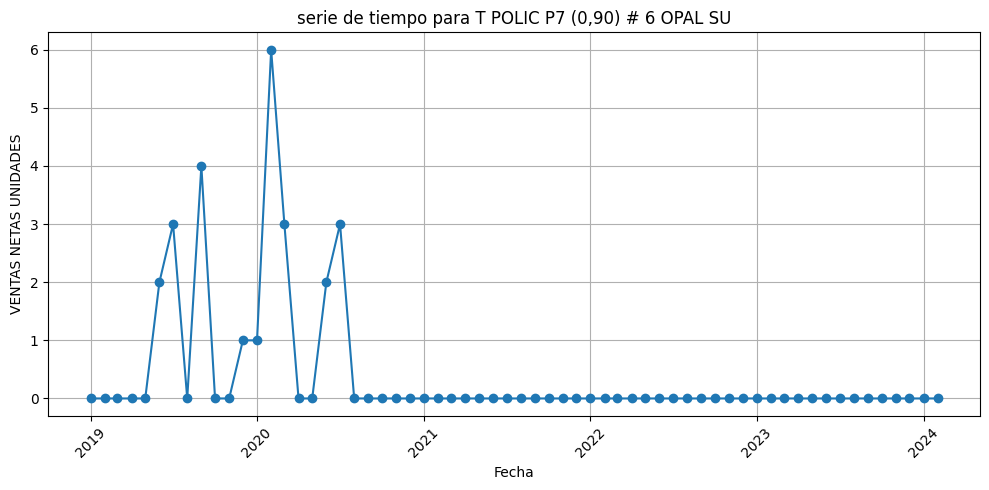

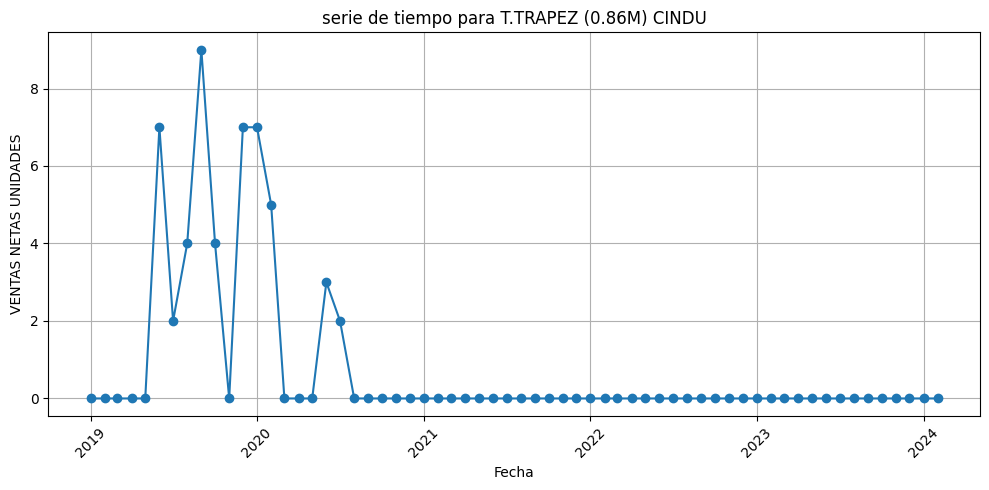

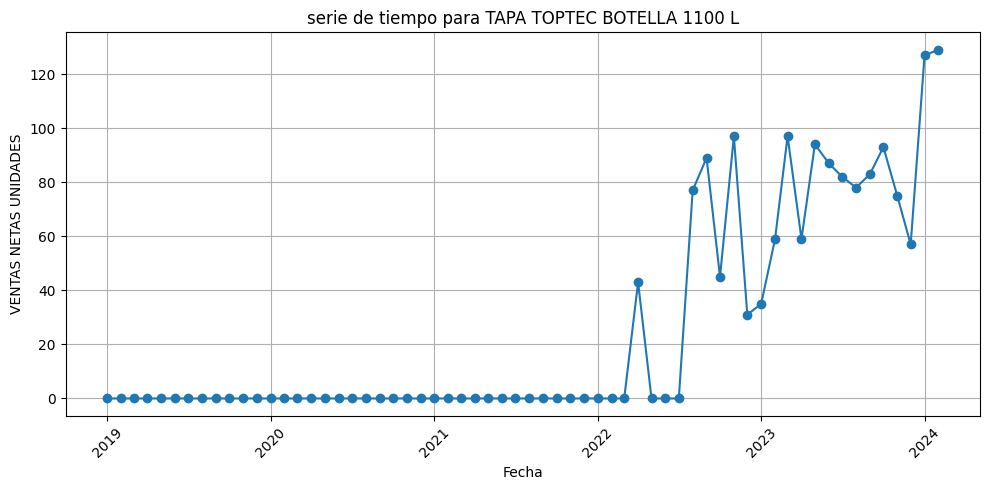

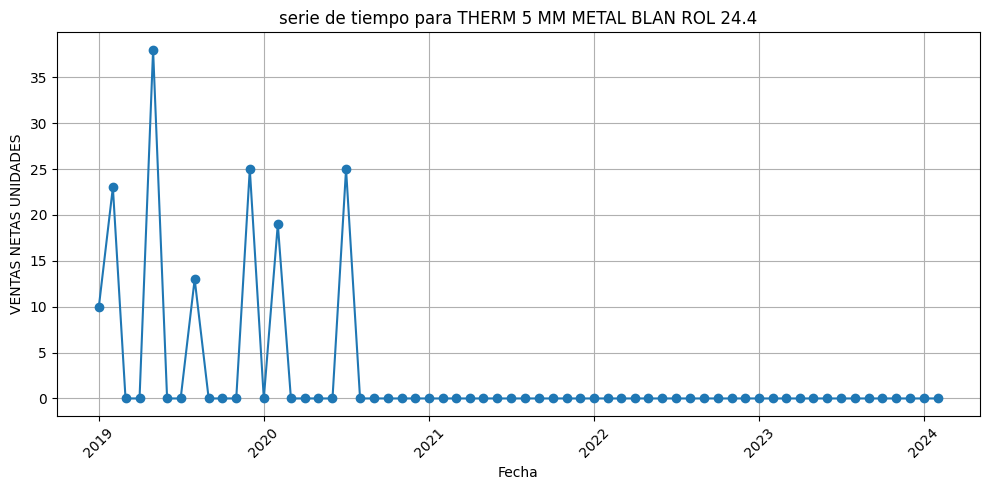

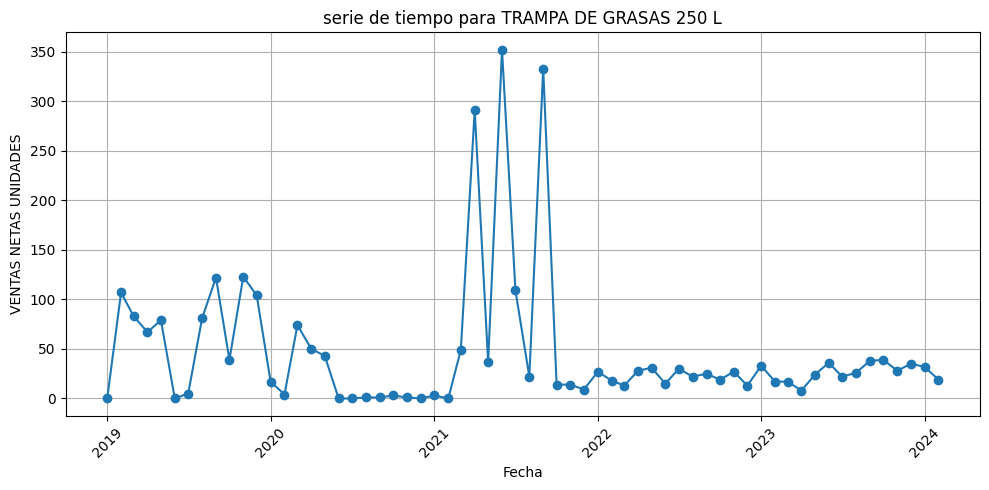

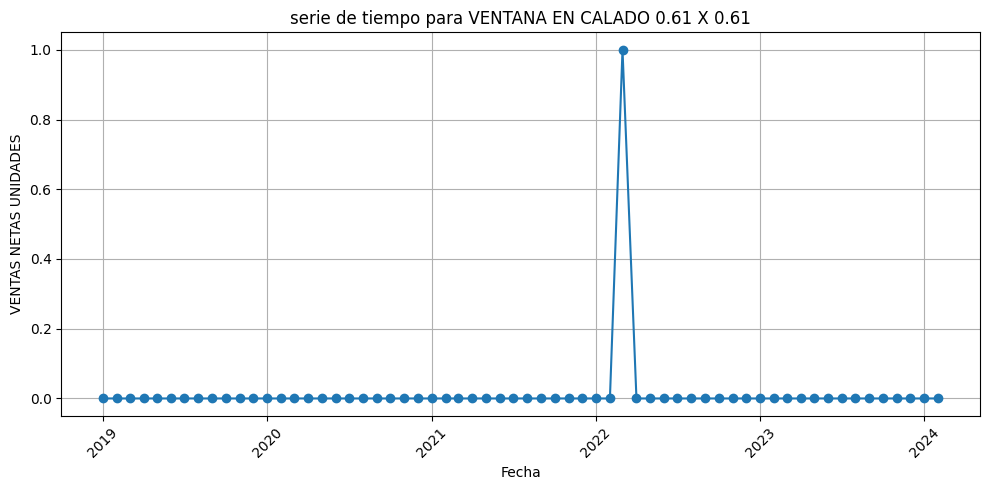

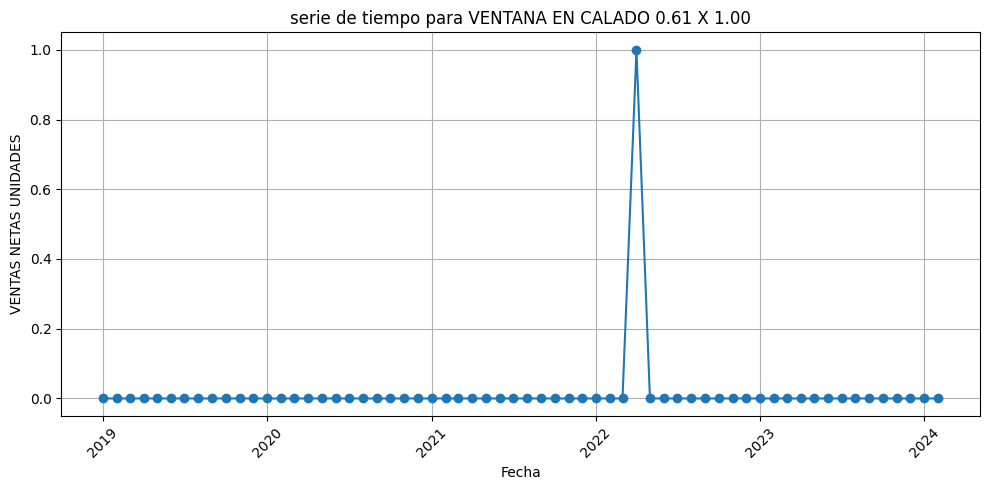

In [25]:
graficar_ventas_netas_productos(productos_secundarios,ventas_corregido)

De las gráficas anteriores podemos identificar que los siguientes productos ya no se están vendiendo en la empresa y se pueden descartar del dataset:
- ARMECOLOR 1.00 X 2.44 ROJO
- CABALLETE PVC P7
- FALSO FONDO 1000 L
- FALSO FONDO 2000 L
- FALSO FONDO 500 L
- KIT SISTEMA SEPTICO 1 A 5 PERSONAS CON PIEDRA
- KIT SISTEMA SEPTICO 11 A 15 PERSONAS CON PIEDRA
- KIT SISTEMA SEPTICO 6 A 10 PERSONAS CON ROSETONES
- L PC ALVEO 2,10X11,60X6 MM CRIS
- L PC ALVEO 2,10X11,60X6 MM OPAL
- L PC ALVEO 2,10X5,90X10 MM BRON
- LAMINA POLIC ALVEOLAR 6 MM
- METROS GOMA SUPER
- P. ALUMINIO 6MTSX5CMS SUPER
- PALA CUADRADA 4303-23 CABO LARGO -TOMSON
- PALA CUADRADA 4303-43 CABO LARGO-TOMSON
- PALA CUADRADA 5804310 TOMSON
- PALA CUADRADA 5804320 TOMSON
- PALA REDONDA 5805640 TOMSON
- PALA REDONDA 6056-23 CABO LARGO TOMSON
- PALA REDONDA 6056-43 CABO LARGO TOMSON
- PALADRAG LIV 5800816 TOMSON
- PIE POLIC P7 (0,92) MAR
- PIE POLIC.P.7 (1.10) MAR
- POZO SEPTICO 1000 L ANAEROBIC
- POZO SEPTICO 500 L ANAEROBICO
- SISTEMA SEPTICO 1 A 5 PERSONAS CON PIEDRA
- SISTEMA SEPTICO 1 A 5 PERSONAS CON ROSETONES
- SISTEMA SEPTICO 6 A 10 PERSONAS CON PIEDRA
- T CINDU OPAL ORIG 0,86X5 MM SUP
- T POLIC P.7 # 5 (0,92) OPAL SU
- T POLIC P7 (0,90) # 4 OPAL SU
- T POLIC P7 (0,90) # 6 OPAL SU
- T.TRAPEZ (0.86M) CINDU
- THERM 5 MM METAL BLAN ROL 24.4
- VENTANA EN CALADO 0.61 X 0.61
- VENTANA EN CALADO 0.61 X 1.00

In [26]:
# Eliminamos los productos que identicamos anteriormente que ya no se están vendiendo en la empresa
productos_a_eliminar = ['ARMECOLOR 1.00 X 2.44 ROJO','CABALLETE PVC P7','FALSO FONDO 1000 L','FALSO FONDO 2000 L','FALSO FONDO 500 L','KIT SISTEMA SEPTICO 1 A 5 PERSONAS CON PIEDRA','KIT SISTEMA SEPTICO 11 A 15 PERSONAS CON PIEDRA','KIT SISTEMA SEPTICO 6 A 10 PERSONAS CON ROSETONES','L PC ALVEO 2,10X11,60X6 MM CRIS','L PC ALVEO 2,10X11,60X6 MM OPAL','L PC ALVEO 2,10X5,90X10 MM BRON','LAMINA POLIC ALVEOLAR 6 MM','METROS GOMA SUPER','P. ALUMINIO 6MTSX5CMS SUPER','PALA CUADRADA 4303-23 CABO LARGO -TOMSON','PALA CUADRADA 4303-43 CABO LARGO-TOMSON','PALA CUADRADA 5804310 TOMSON','PALA CUADRADA 5804320 TOMSON','PALA REDONDA 5805640 TOMSON','PALA REDONDA 6056-23 CABO LARGO TOMSON','PALA REDONDA 6056-43 CABO LARGO TOMSON','PALADRAG LIV 5800816 TOMSON','PIE POLIC P7 (0,92) MAR','PIE POLIC.P.7 (1.10) MAR','POZO SEPTICO 1000 L ANAEROBIC','POZO SEPTICO 500 L ANAEROBICO','SISTEMA SEPTICO 1 A 5 PERSONAS CON PIEDRA','SISTEMA SEPTICO 1 A 5 PERSONAS CON ROSETONES','SISTEMA SEPTICO 6 A 10 PERSONAS CON PIEDRA','T CINDU OPAL ORIG 0,86X5 MM SUP','T POLIC P.7 # 5 (0,92) OPAL SU','T POLIC P7 (0,90) # 4 OPAL SU','T POLIC P7 (0,90) # 6 OPAL SU','T.TRAPEZ (0.86M) CINDU','THERM 5 MM METAL BLAN ROL 24.4','VENTANA EN CALADO 0.61 X 0.61','VENTANA EN CALADO 0.61 X 1.00']

# Filtrar el DataFrame para conservar solo las filas que no tienen esos valores en la columna
ventas_corregido = ventas_corregido[~ventas_corregido['NOMBRE ITEM SAP'].isin(productos_a_eliminar)]

Volvemos a analizar los nombres de los productos posterior al descarte de productos 

In [27]:
nombres_items = ventas_corregido['NOMBRE ITEM SAP'].value_counts()
nombres_items_df = nombres_items.reset_index()
nombres_items_df.columns = ['Nombre Item', 'Frecuencia']
nombres_items_df.to_csv('nombres_items_corregido_2.csv', index=False)

Identificamos que ahora tenemos productos con nombres similares y la empresa nos indico que a mediados del 2022 realizó un cambio en su sistema de facturación, por lo que algunos productos tuvieron un cambio en su nombre, así que vamos a analizar los siguientes productos "independientes":
- JUEGO TANQUE TOPTEC 2000 L
- TANQUE PLASTICO TOPTEC 2000 L
- KIT JUEGO TANQUE 2000 L (TANQUE 2000 L + TAPA + JUEGO DE CONEXIONES )
- KIT JUEGO TANQUE 2000 L (TANQUE 2000 L + TAPA)

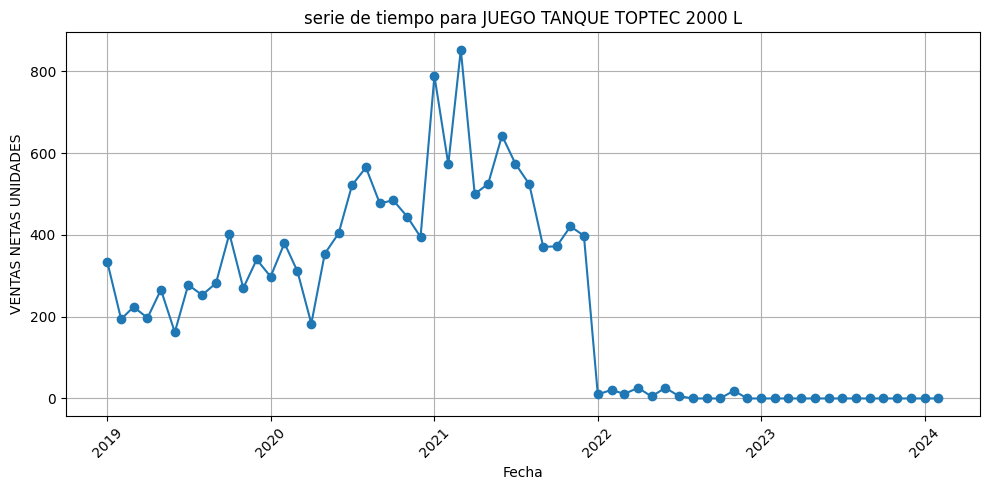

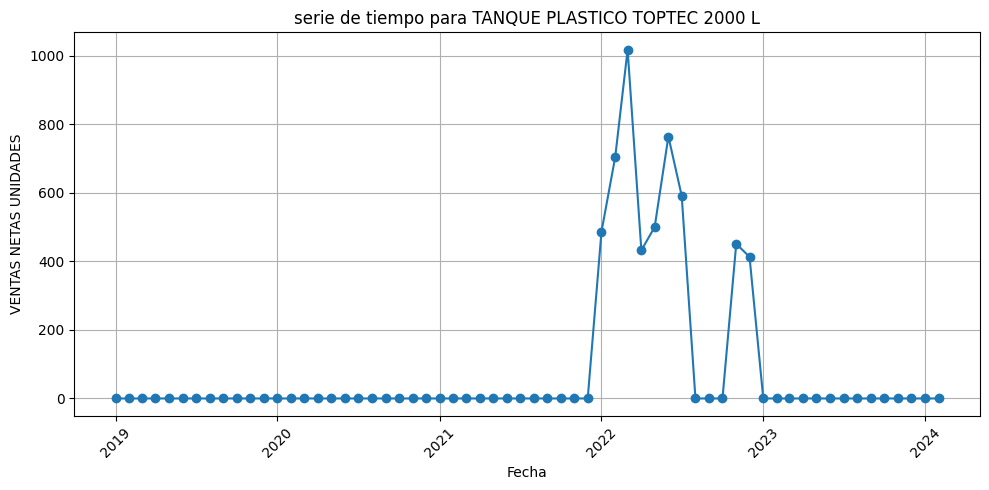

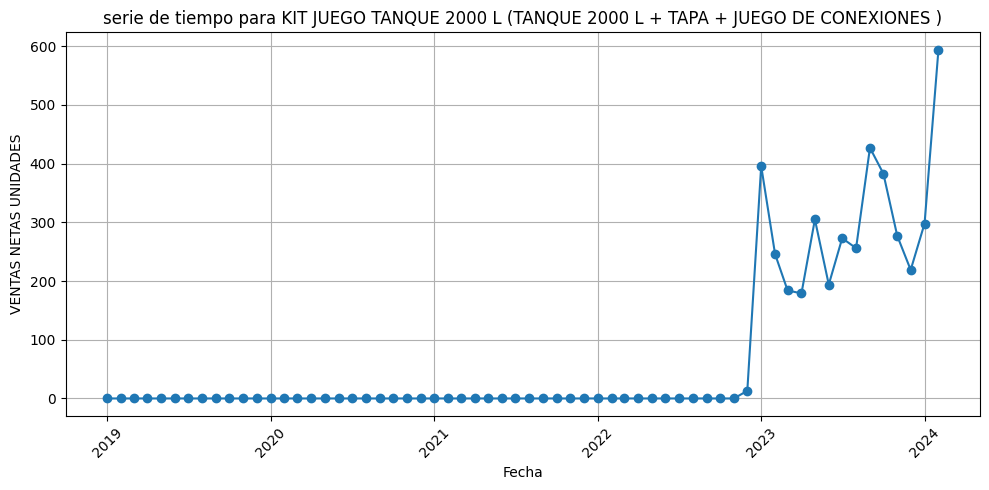

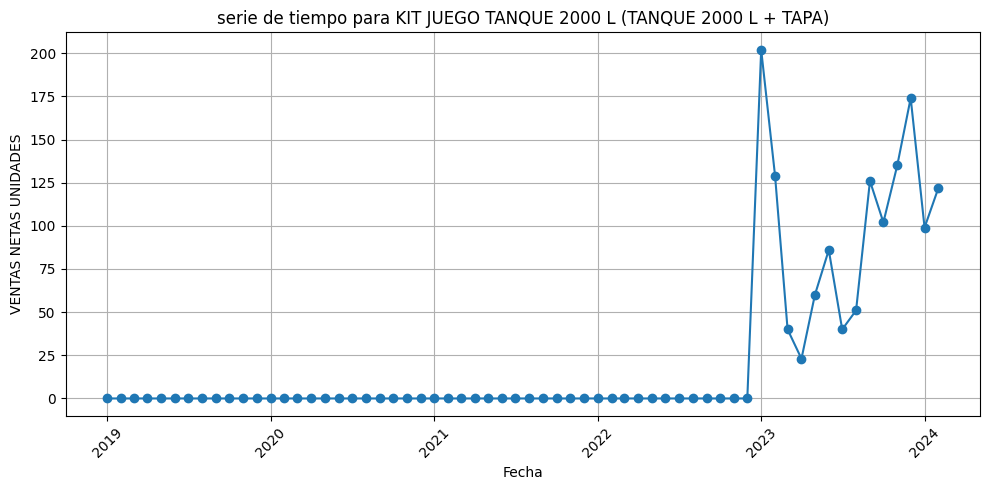

In [28]:
# Productos para analizar
productos = ['JUEGO TANQUE TOPTEC 2000 L','TANQUE PLASTICO TOPTEC 2000 L','KIT JUEGO TANQUE 2000 L (TANQUE 2000 L + TAPA + JUEGO DE CONEXIONES )','KIT JUEGO TANQUE 2000 L (TANQUE 2000 L + TAPA)']

graficar_ventas_netas_productos(productos,ventas_corregido)

Como se puede observar en las gráficas anteriores los productos se están vendiendo en diferentes instantes de tiempo pero en esencia continuan siendo el mismo producto

In [29]:
ventas_corregido.loc[19303:19320,:]

Fecha   CODIGO SAP  \
19303 2023-02-02  T1005035420   
19304 2023-02-02  T1005027420   
19305 2023-02-02  T1005008420   
19306 2023-02-02  T1005033511   
19307 2023-02-02  T1005108511   
19308 2023-02-02  T1005112511   
19309 2023-02-02  T1005027420   
19310 2023-02-02  T1005035420   
19311 2023-02-02  T1005008410   
19312 2023-02-02  T1005027410   
19313 2023-02-02  T1005008420   
19314 2023-02-02  T1005035410   
19315 2023-02-02  T1005027410   
19316 2023-02-02  T1005027450   
19317 2023-02-02  T1005008410   
19318 2023-02-02  T1005035451   
19319 2023-02-02  T1005028450   
19320 2023-02-02  T1005035410   

                                         NOMBRE ITEM SAP   BODEGA MOVIMIENTO  \
19303  KIT JUEGO TANQUE 2000 L (TANQUE 2000 L + TAPA ...        CEDI BQUILLA   
19304                          TAPA TANQUE TOPTEC 2000 L        CEDI BQUILLA   
19305                               TANQUE TOPTEC 2000 L        CEDI BQUILLA   
19306             KIT JUEGO TANQUE TOPTEC BOTELLA 1100 L  PRODUCTO TERMINADO   
19307                       TANQUE TOPTEC BOTELLA 1100 L  PRODUCTO TERMINADO   
19308                         TAPA TOPTEC BOTELLA 1100 L  PRODUCTO TERMINADO   
19309                          TAPA TANQUE TOPTEC 2000 L  PRODUCTO TERMINADO   
19310  KIT JUEGO TANQUE 2000 L (TANQUE 2000 L + TAPA ...  PRODUCTO TERMINADO   
19311                               TANQUE TOPTEC 1000 L        CEDI BQUILLA   
19312                          TAPA TANQUE TOPTEC 1000 L        CEDI BQUILLA   
19313                               TANQUE TOPTEC 2000 L  PRODUCTO TERMINADO   
19314  KIT JUEGO TANQUE 1000 L (TANQUE 1000 L + TAPA ...        CEDI BQUILLA   
19315                          TAPA TANQUE TOPTEC 1000 L        CEDI BQUILLA   
19316                           TAPA TANQUE TOPTEC 500 L        CEDI BQUILLA   
19317                               TANQUE TOPTEC 1000 L        CEDI BQUILLA   
19318  KIT JUEGO TANQUE 500 L (TANQUE 500 L + TAPA + ...        CEDI BQUILLA   
19319                                TANQUE TOPTEC 500 L        CEDI BQUILLA   
19320  KIT JUEGO TANQUE 1000 L (TANQUE 1000 L + TAPA ...        CEDI BQUILLA   

               CIUDAD  VENTAS NETAS UNIDADES  
19303  TALAIGUA NUEVO                      6  
19304  TALAIGUA NUEVO                      6  
19305  TALAIGUA NUEVO                      6  
19306    BUENAVENTURA                      5  
19307    BUENAVENTURA                      5  
19308    BUENAVENTURA                      5  
19309         COVEÑAS                     25  
19310         COVEÑAS                     25  
19311     SANTA MARTA                      8  
19312     SANTA MARTA                      8  
19313         COVEÑAS                     25  
19314  TALAIGUA NUEVO                     25  
19315  TALAIGUA NUEVO                     25  
19316     SANTA MARTA                     25  
19317  TALAIGUA NUEVO                     25  
19318     SANTA MARTA                     25  
19319     SANTA MARTA                     25  
19320     SANTA MARTA                      8

Adicionalmente podemos observar que cuando se registra la venta de un kit, también se registra la venta de la tapa y el tanque de forma independiente, así que ahora se procedera a estandarizar estos tipos de productos según su capacidad de la siguiente forma:
- KIT JUEGO TANQUE 2000 L: Abarcara los productos nombrados como:
    - JUEGO TANQUE TOPTEC 2000 L
    - TANQUE PLASTICO TOPTEC 2000 L
    - TAPA TANQUE TOPTEC 2000 L
    - KIT JUEGO TANQUE 2000 L (TANQUE 2000 L + TAPA + JUEGO DE CONEXIONES )
    - KIT JUEGO TANQUE 2000 L (TANQUE 2000 L + TAPA)
- KIT JUEGO TANQUE 1000 L: Abarcara los productos nombrados como:
    - KIT JUEGO TANQUE TOPTEC 1000 L
    - JUEGO TANQUE TOPTEC 1000 L
    - TANQUE PLASTICO TOPTEC 1000 L
    - TAPA TANQUE TOPTEC 1000 L
    - KIT JUEGO TANQUE 1000 L (TANQUE 1000 L + TAPA + JUEGO DE CONEXIONES )
    - KIT JUEGO TANQUE 1000 L (TANQUE 1000 L + TAPA)
- KIT JUEGO TANQUE 500 L: Abarcara los productos nombrados como:
    - KIT JUEGO TANQUE TOPTEC 500 L
    - JUEGO TANQUE TOPTEC 500 L
    - TANQUE PLASTICO TOPTEC 500 L
    - TAPA TANQUE TOPTEC 500 L
    - KIT JUEGO TANQUE 500 L (TANQUE 500 L + TAPA + JUEGO DE CONEXIONES )
    - KIT JUEGO TANQUE 500 L (TANQUE 500 L + TAPA)
- KIT JUEGO TANQUE 250 L: Abarcara los productos nombrados como:
    - KIT JUEGO TANQUE TOPTEC 250 L
    - JUEGO TANQUE TOPTEC 250 L
    - TANQUE PLASTICO TOPTEC 250 L
    - TAPA TANQUE TOPTEC 250 L
    - KIT JUEGO TANQUE 250 L (TANQUE 250 L + TAPA + JUEGO DE CONEXIONES )
    - KIT JUEGO TANQUE 250 L (TANQUE 250 L + TAPA)
- KIT JUEGO TANQUE BAJITO 500 L: Abarcara los productos nombrados como:
    - TAPA TANQUE TOPTEC BAJITO 500 L
    - KIT JUEGO TANQUE TOPTEC BAJITO 500 L
    - KIT JUEGO TANQUE BAJITO 500 L (TANQUE 500 L + TAPA + JUEGO DE CONEXIONES )
    - KIT JUEGO TANQUE BAJITO 500 L (TANQUE 500 L + TAPA)
- KIT JUEGO TANQUE BAJITO 250 L: Abarcara los productos nombrados como:
    - KIT JUEGO TANQUE TOPTEC BAJITO 250 L
    - JUEGO TANQUE TOPTEC BAJITO 250 L
    - TAPA TANQUE TOPTEC BAJITO 250 L
    - KIT JUEGO TANQUE BAJITO 250 L (TANQUE 250 L + TAPA + JUEGO DE CONEXIONES )
    - KIT JUEGO TANQUE BAJITO 250 L (TANQUE 250 L + TAPA)
- KIT JUEGO TANQUE BOTELLA 1100 L: Abarcara los productos nombrados como:
    - TANQUE TOPTEC BOTELLA 1100 L
    - TAPA TOPTEC BOTELLA 1100 L
    - JUEGO TANQUE TOPTEC BOTELLA 1100 L
    - KIT JUEGO TANQUE TOPTEC BOTELLA 1100 L
    - KIT JUEGO TANQUE BOTELLA 1100 L (TANQUE + TAPA +JUEGO DE ACCESORIOS)

In [30]:
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'JUEGO TANQUE TOPTEC 2000 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 2000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE 2000 L (TANQUE 2000 L + TAPA + JUEGO DE CONEXIONES )', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 2000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE 2000 L (TANQUE 2000 L + TAPA)', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 2000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TANQUE PLASTICO TOPTEC 2000 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 2000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TAPA TANQUE TOPTEC 2000 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 2000 L'

ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'JUEGO TANQUE TOPTEC 1000 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 1000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE TOPTEC 1000 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 1000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE 1000 L (TANQUE 1000 L + TAPA + JUEGO DE CONEXIONES )', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 1000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE 1000 L (TANQUE 1000 L + TAPA)', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 1000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TANQUE PLASTICO TOPTEC 1000 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 1000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TAPA TANQUE TOPTEC 1000 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 1000 L'

ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'JUEGO TANQUE TOPTEC 500 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 500 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE TOPTEC 500 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 500 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE 500 L (TANQUE 500 L + TAPA + JUEGO DE CONEXIONES )', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 500 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE 500 L (TANQUE 500 L + TAPA)', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 500 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TANQUE PLASTICO TOPTEC 500 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 500 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TAPA TANQUE TOPTEC 500 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 500 L'

ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'JUEGO TANQUE TOPTEC 250 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 250 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE TOPTEC 250 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 250 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE 250 L (TANQUE 250 L + TAPA + JUEGO DE CONEXIONES )', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 250 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE 250 L (TANQUE 250 L + TAPA)', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 250 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TANQUE PLASTICO TOPTEC 250 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 250 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TAPA TANQUE TOPTEC 250 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 250 L'

ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE TOPTEC BAJITO 500 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BAJITO 500 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE BAJITO 500 L (TANQUE BAJITO 500 L + TAPA + JUEGO DE CONEXIONES )', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BAJITO 500 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE BAJITO 500 L (TANQUE BAJITO 500 L + TAPA)', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BAJITO 500 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TAPA TANQUE TOPTEC BAJITO 500 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BAJITO 500 L'

ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'JUEGO TANQUE TOPTEC BAJITO 250 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BAJITO 250 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE TOPTEC BAJITO 250 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BAJITO 250 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE BAJITO 250 L (TANQUE BAJITO 250 L + TAPA + JUEGO DE CONEXIONES )', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BAJITO 250 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE BAJITO 250 L (TANQUE BAJITO 250 L + TAPA)', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BAJITO 250 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TAPA TANQUE TOPTEC BAJITO 250 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BAJITO 250 L'

ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TANQUE TOPTEC BOTELLA 1100 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BOTELLA 1100 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'JUEGO TANQUE TOPTEC BOTELLA 1100 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BOTELLA 1100 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE BOTELLA 1100 L (TANQUE + TAPA +JUEGO DE ACCESORIOS)', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BOTELLA 1100 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TAPA TOPTEC BOTELLA 1100 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BOTELLA 1100 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE TOPTEC BOTELLA 1100 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BOTELLA 1100 L'

In [31]:
nombres_items = ventas_corregido['NOMBRE ITEM SAP'].value_counts()
nombres_items_df = nombres_items.reset_index()
nombres_items_df.columns = ['Nombre Item', 'Frecuencia']
nombres_items_df.to_csv('nombres_items_corregido_3.csv', index=False)

Se vuelve a realizar el análisis de los productos ya que aún contamos con 33 productos diferentes

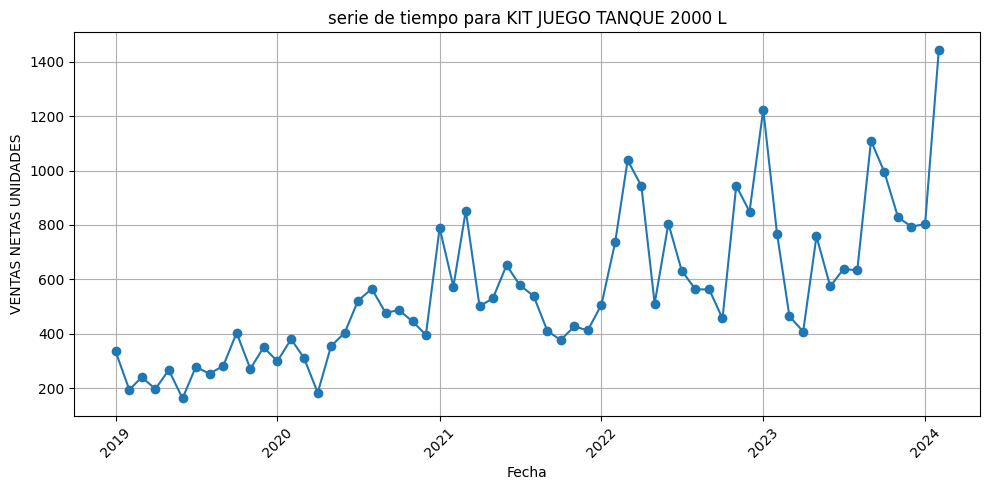

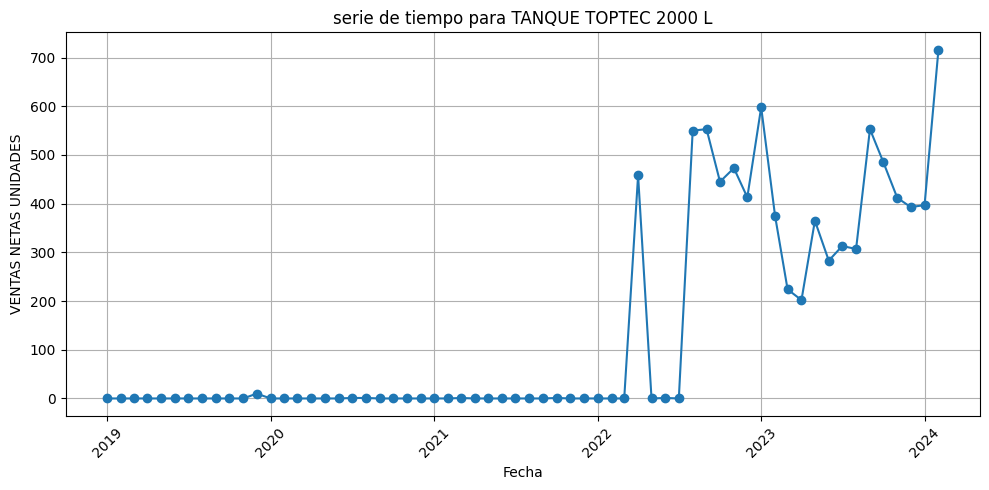

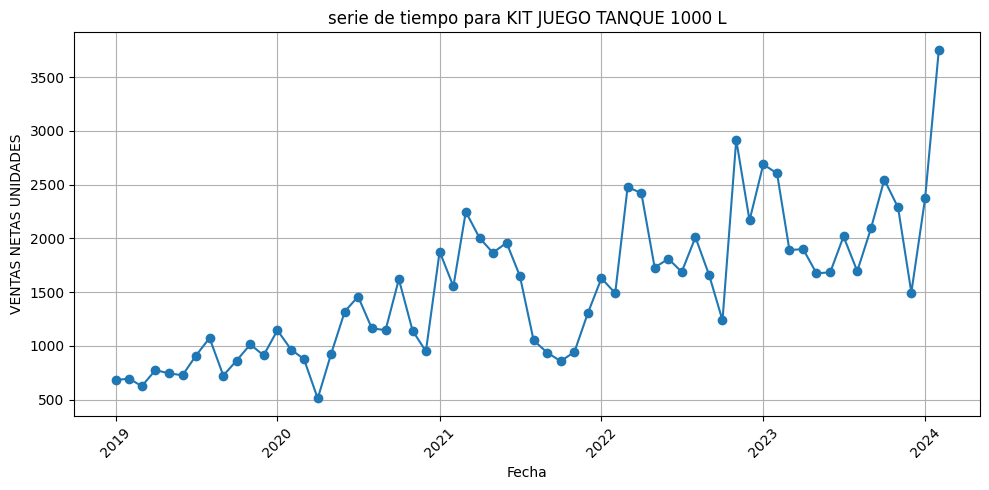

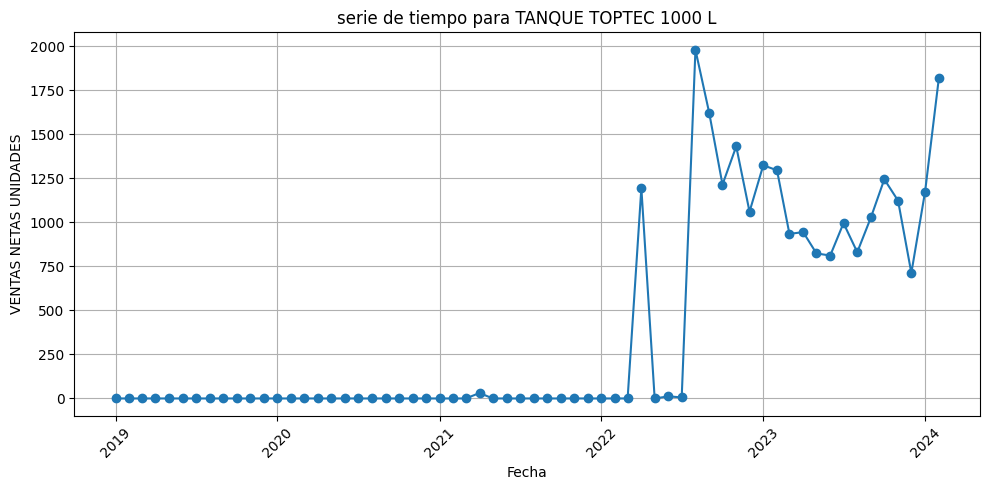

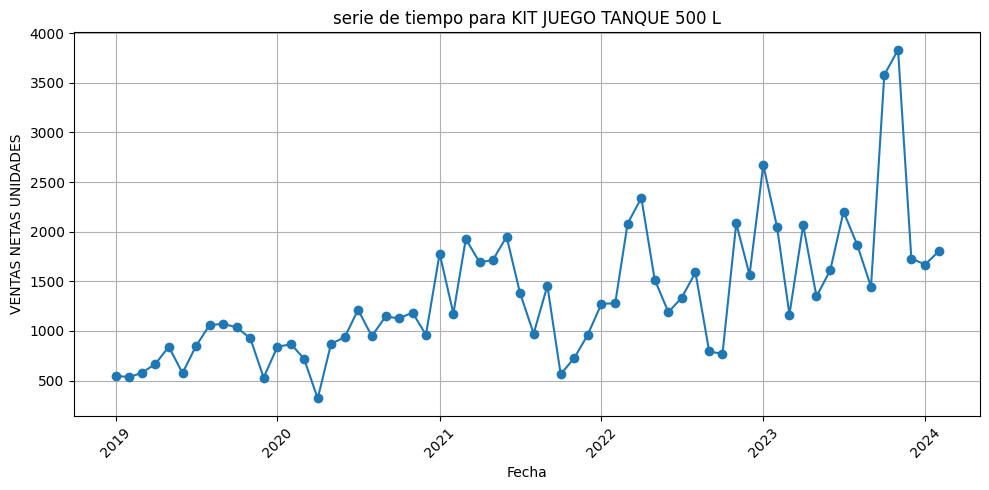

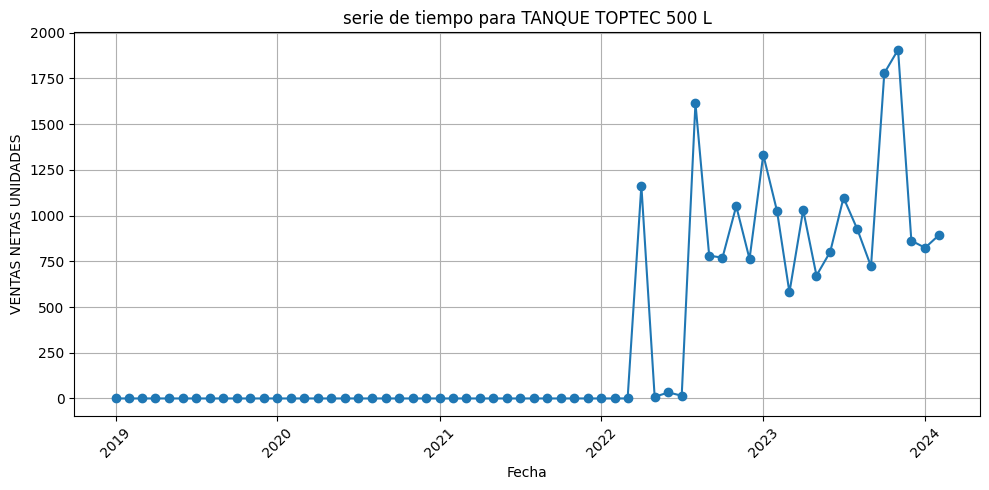

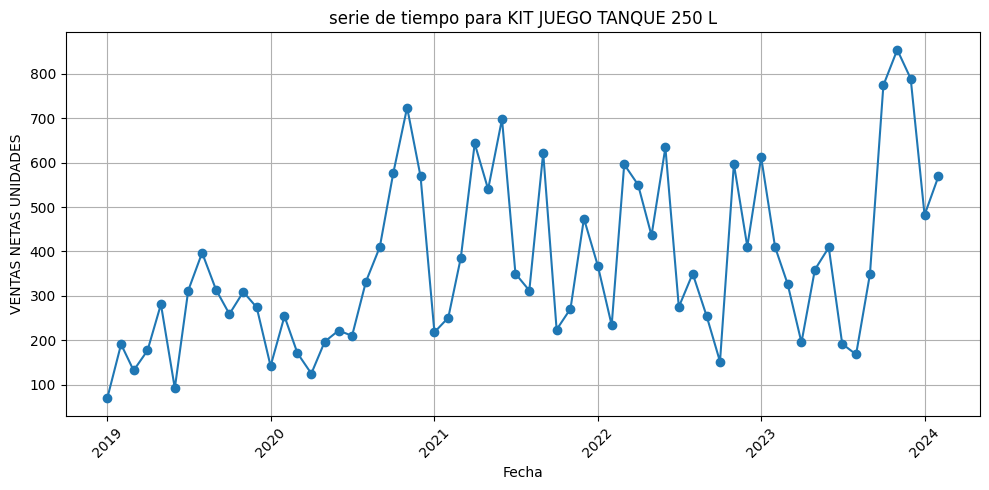

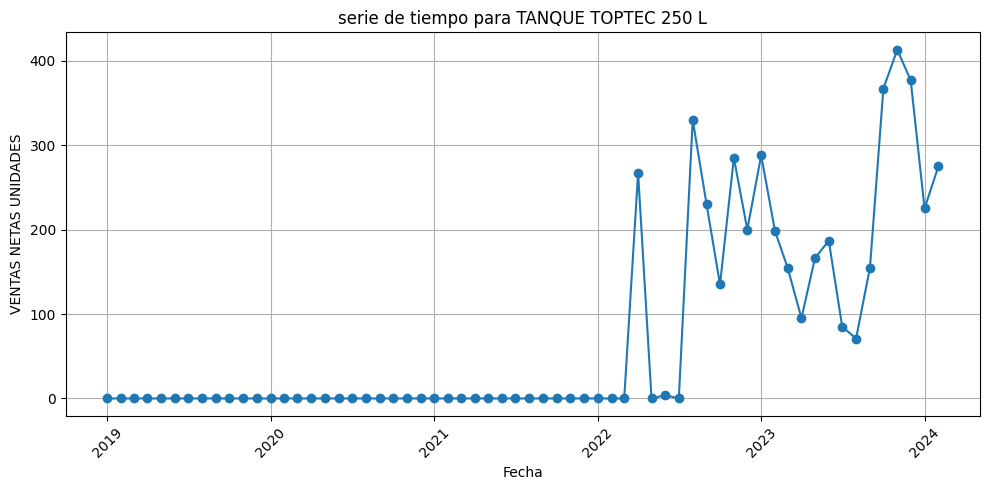

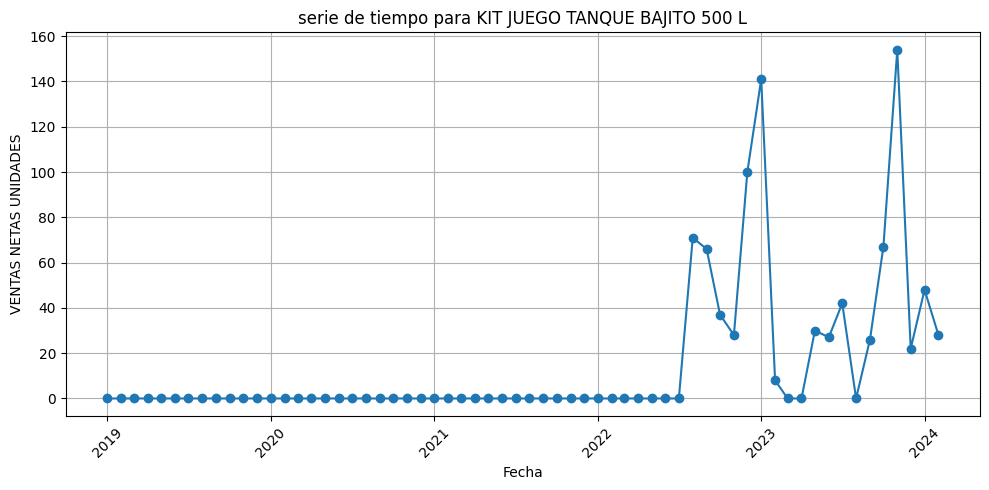

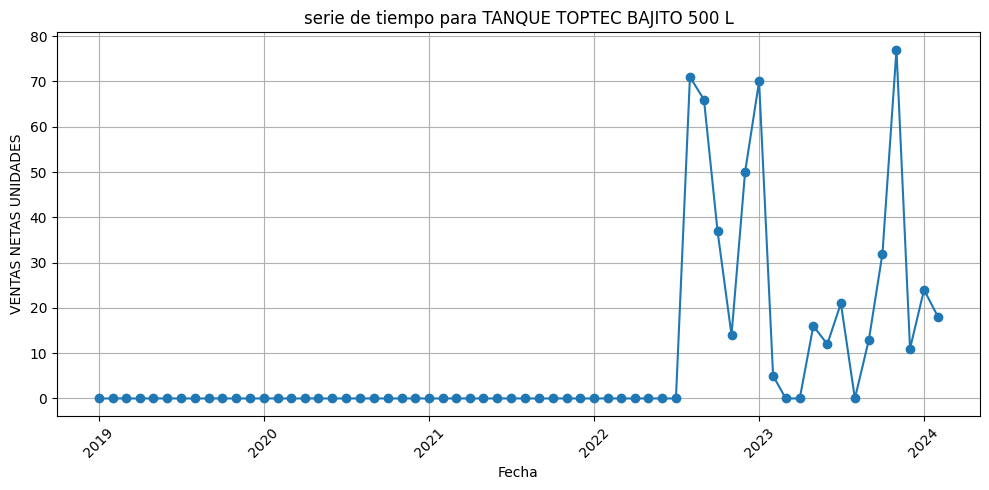

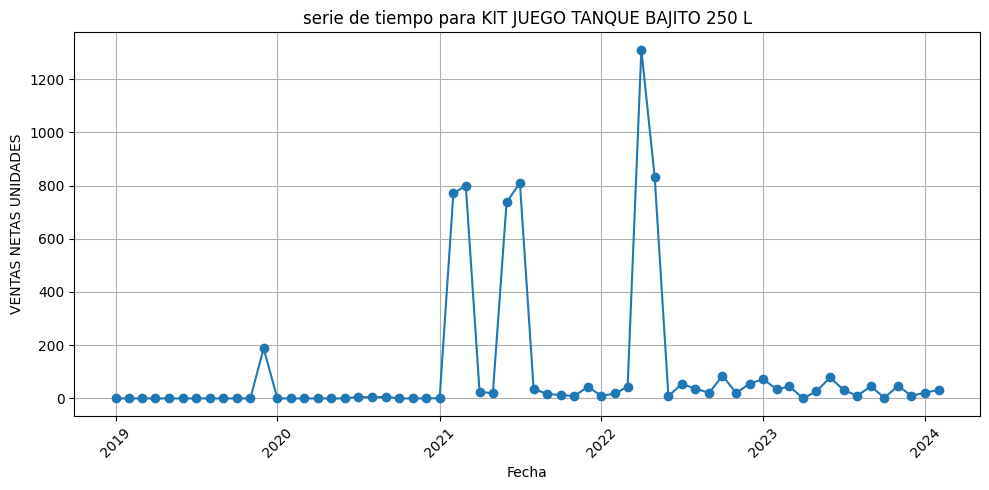

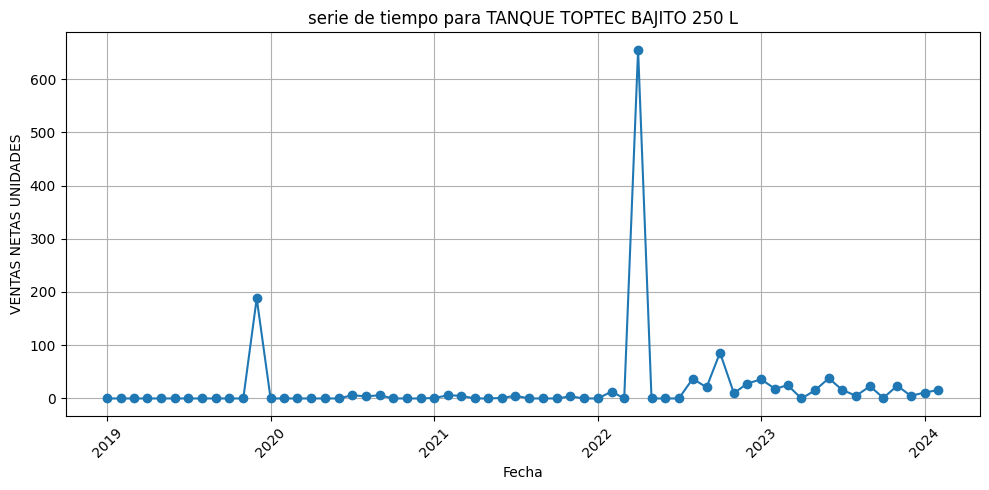

In [32]:
# Productos para analizar
productos = ['KIT JUEGO TANQUE 2000 L','TANQUE TOPTEC 2000 L','KIT JUEGO TANQUE 1000 L','TANQUE TOPTEC 1000 L','KIT JUEGO TANQUE 500 L','TANQUE TOPTEC 500 L','KIT JUEGO TANQUE 250 L','TANQUE TOPTEC 250 L','KIT JUEGO TANQUE BAJITO 500 L','TANQUE TOPTEC BAJITO 500 L','KIT JUEGO TANQUE BAJITO 250 L','TANQUE TOPTEC BAJITO 250 L']

graficar_ventas_netas_productos(productos,ventas_corregido)

Como podemos observar en las gráficas se están mostrando exactamente los mismo datos para diferentes productos, así que se unificaremos sus nombres y posteriormente eliminaremos los duplicados

In [33]:
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TANQUE TOPTEC 2000 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 2000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TANQUE TOPTEC 1000 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 1000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TANQUE TOPTEC 500 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 500 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TANQUE TOPTEC 250 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 250 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TANQUE TOPTEC BAJITO 500 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BAJITO 500 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TANQUE TOPTEC BAJITO 250 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BAJITO 250 L'

In [34]:
duplicados = ventas_corregido[ventas_corregido.duplicated(subset=ventas_corregido.columns.difference(['CODIGO SAP']))]
print(duplicados)


           Fecha   CODIGO SAP          NOMBRE ITEM SAP   BODEGA MOVIMIENTO  \
14    2019-01-10  T1005028420  KIT JUEGO TANQUE 2000 L  PRODUCTO TERMINADO   
30    2019-01-15  T1005028410  KIT JUEGO TANQUE 1000 L  PRODUCTO TERMINADO   
37    2019-01-16  T1005028420  KIT JUEGO TANQUE 2000 L  PRODUCTO TERMINADO   
41    2019-01-16  T1005027410  KIT JUEGO TANQUE 1000 L  PRODUCTO TERMINADO   
58    2019-01-18  T1005028451   KIT JUEGO TANQUE 500 L  PRODUCTO TERMINADO   
...          ...          ...                      ...                 ...   
29977 2024-02-29  T1005027450   KIT JUEGO TANQUE 500 L  PRODUCTO TERMINADO   
29978 2024-02-29  T1005028450   KIT JUEGO TANQUE 500 L  PRODUCTO TERMINADO   
29979 2024-02-29  T1005028450   KIT JUEGO TANQUE 500 L  PRODUCTO TERMINADO   
29980 2024-02-29  T1005027450   KIT JUEGO TANQUE 500 L  PRODUCTO TERMINADO   
29981 2024-02-29  T1005032410  KIT JUEGO TANQUE 1000 L  PRODUCTO TERMINADO   

             CIUDAD  VENTAS NETAS UNIDADES  
14              Na

Se identifican 10.634 registros duplicados así que se procede a eliminarlos

In [35]:
ventas_corregido = ventas_corregido.drop_duplicates(subset=ventas_corregido.columns.difference(['CODIGO SAP']))

In [36]:
nombres_items = ventas_corregido['NOMBRE ITEM SAP'].value_counts()
nombres_items_df = nombres_items.reset_index()
nombres_items_df.columns = ['Nombre Item', 'Frecuencia']
nombres_items_df.to_csv('nombres_items_corregido_4.csv', index=False)

Analizamos nuevamente los productos

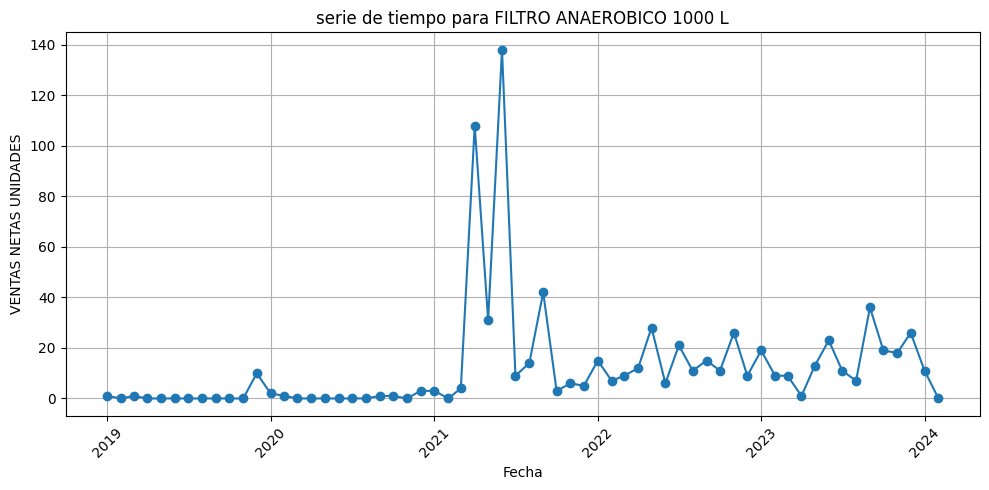

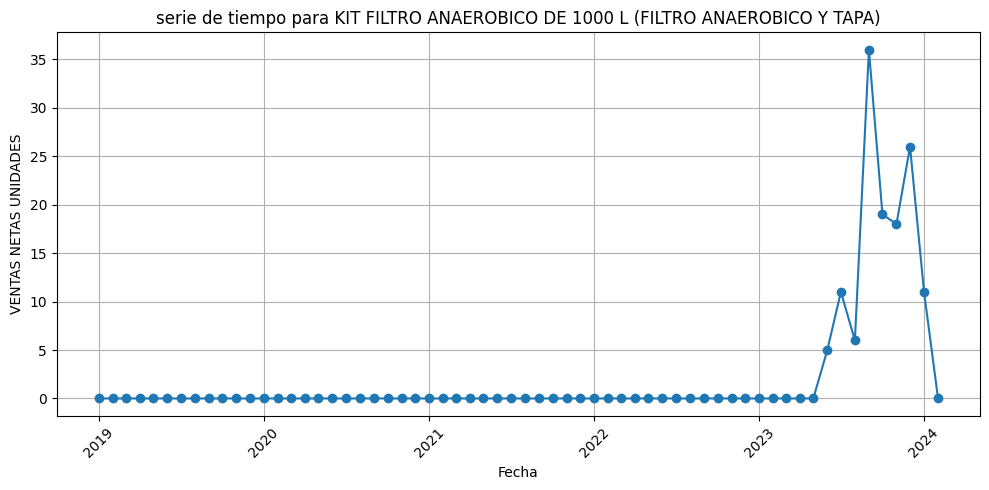

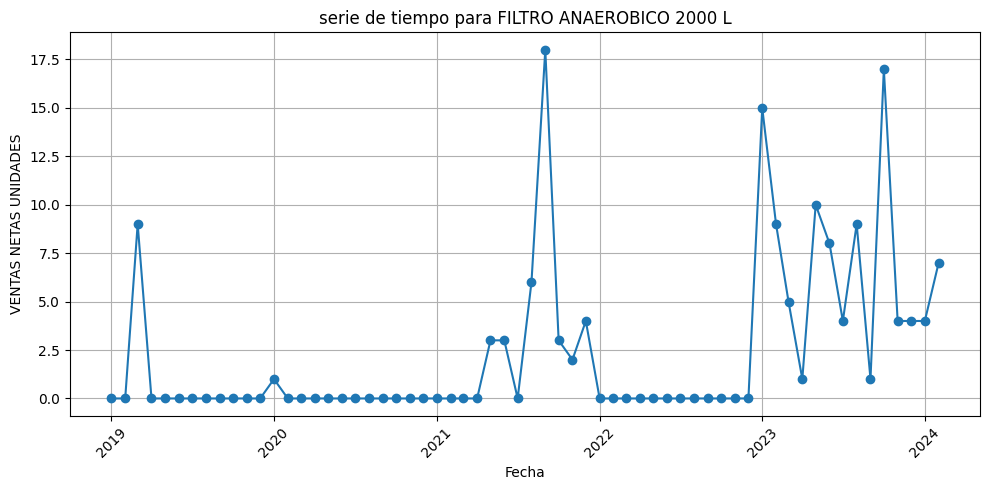

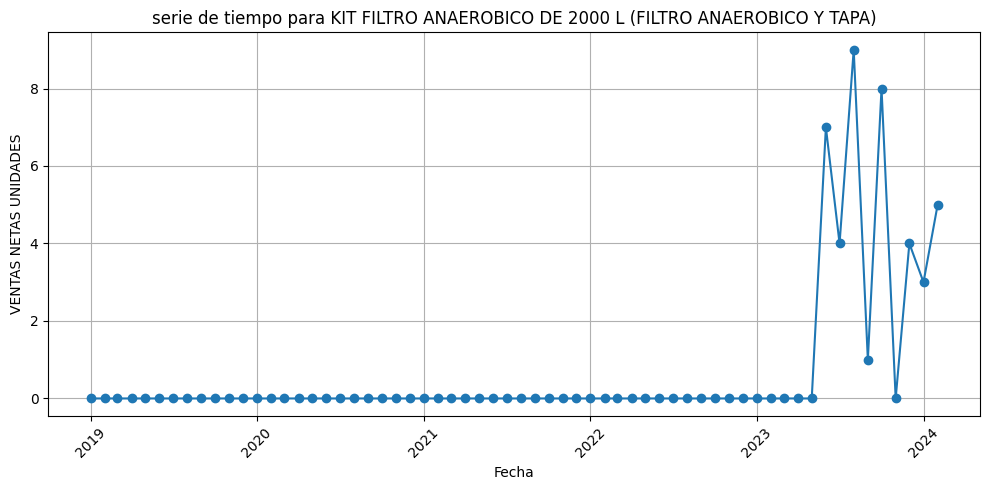

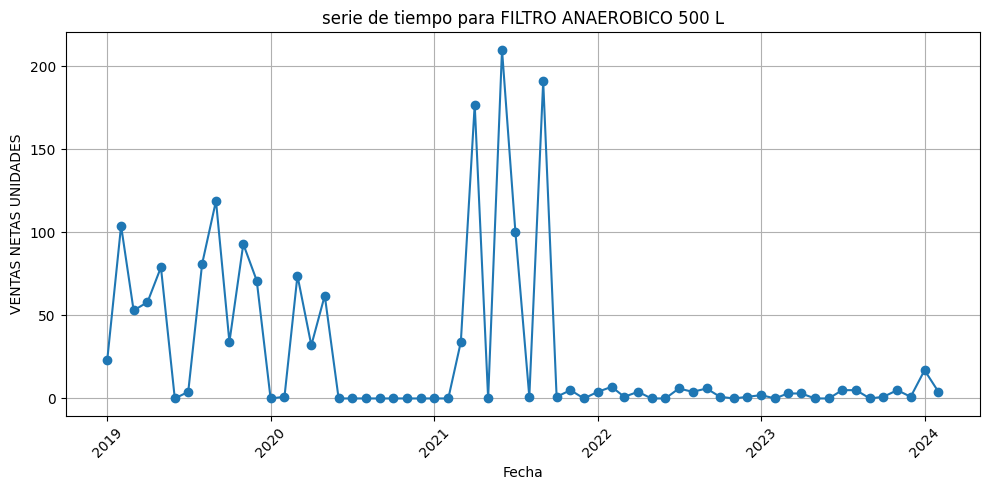

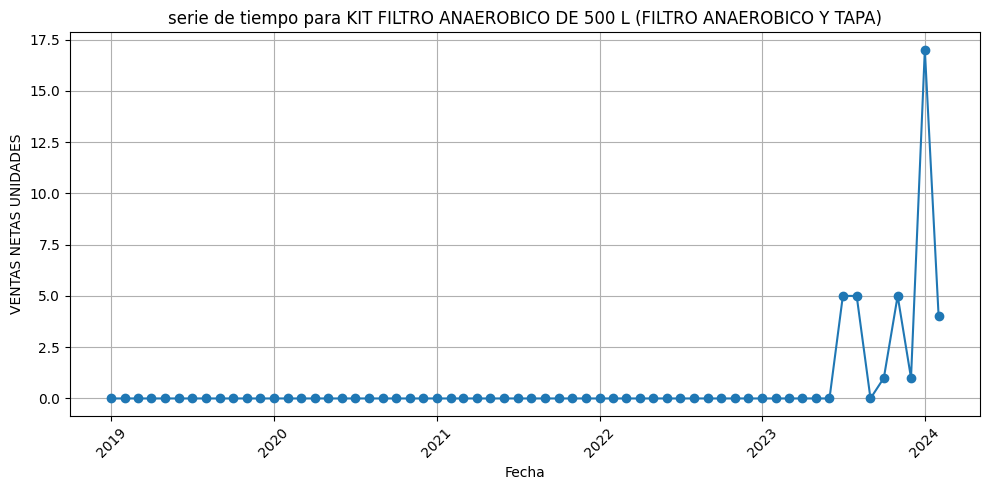

In [37]:
# Productos para analizar
productos = ['FILTRO ANAEROBICO 1000 L','KIT FILTRO ANAEROBICO DE 1000 L (FILTRO ANAEROBICO Y TAPA)','FILTRO ANAEROBICO 2000 L','KIT FILTRO ANAEROBICO DE 2000 L (FILTRO ANAEROBICO Y TAPA)','FILTRO ANAEROBICO 500 L','KIT FILTRO ANAEROBICO DE 500 L (FILTRO ANAEROBICO Y TAPA)']

graficar_ventas_netas_productos(productos,ventas_corregido)

Como podemos observar en las gráficas se están mostrando exactamente los mismo datos para diferentes productos, así que se unificaremos sus nombres y posteriormente eliminaremos los duplicados nuevamente

In [38]:
ventas_corregido.loc[(ventas_corregido['Fecha'] > '2023-07-17') & ((ventas_corregido['NOMBRE ITEM SAP'] == 'FILTRO ANAEROBICO 1000 L') | (ventas_corregido['NOMBRE ITEM SAP'] == 'KIT FILTRO ANAEROBICO DE 1000 L (FILTRO ANAEROBICO Y TAPA)'))]

Fecha   CODIGO SAP  \
23320 2023-07-18  T1005009410   
23330 2023-07-18  T1005029150   
23346 2023-07-19  T1005009410   
23353 2023-07-19  T1005029150   
23516 2023-07-26  T1005009410   
...          ...          ...   
28249 2024-01-18  T1005009410   
28528 2024-01-24  T1005009410   
28534 2024-01-24  T1005029150   
28585 2024-01-24  T1005029150   
28593 2024-01-24  T1005009410   

                                         NOMBRE ITEM SAP   BODEGA MOVIMIENTO  \
23320                           FILTRO ANAEROBICO 1000 L  PRODUCTO TERMINADO   
23330  KIT FILTRO ANAEROBICO DE 1000 L (FILTRO ANAERO...  PRODUCTO TERMINADO   
23346                           FILTRO ANAEROBICO 1000 L  PRODUCTO TERMINADO   
23353  KIT FILTRO ANAEROBICO DE 1000 L (FILTRO ANAERO...  PRODUCTO TERMINADO   
23516                           FILTRO ANAEROBICO 1000 L  PRODUCTO TERMINADO   
...                                                  ...                 ...   
28249                           FILTRO ANAEROBICO 1000 L  PRODUCTO TERMINADO   
28528                           FILTRO ANAEROBICO 1000 L  PRODUCTO TERMINADO   
28534  KIT FILTRO ANAEROBICO DE 1000 L (FILTRO ANAERO...  PRODUCTO TERMINADO   
28585  KIT FILTRO ANAEROBICO DE 1000 L (FILTRO ANAERO...  PRODUCTO TERMINADO   
28593                           FILTRO ANAEROBICO 1000 L  PRODUCTO TERMINADO   

           CIUDAD  VENTAS NETAS UNIDADES  
23320     LA CEJA                      6  
23330     LA CEJA                      6  
23346   CHINCHINA                      3  
23353   CHINCHINA                      3  
23516   MANIZALES                      1  
...           ...                    ...  
28249  LA TEBAIDA                      1  
28528   MANIZALES                      3  
28534   MANIZALES                      3  
28585    CAUCASIA                      4  
28593    CAUCASIA                      4  

[79 rows x 6 columns]

In [39]:
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'FILTRO ANAEROBICO 2000 L', 'NOMBRE ITEM SAP'] = 'KIT FILTRO ANAEROBICO 2000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TANQUE ANAEROBICO 2000 L', 'NOMBRE ITEM SAP'] = 'KIT FILTRO ANAEROBICO 2000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT FILTRO ANAEROBICO DE 2000 L (FILTRO ANAEROBICO Y TAPA)', 'NOMBRE ITEM SAP'] = 'KIT FILTRO ANAEROBICO 2000 L'

ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'FILTRO ANAEROBICO 1000 L', 'NOMBRE ITEM SAP'] = 'KIT FILTRO ANAEROBICO 1000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT FILTRO ANAEROBICO DE 1000 L (FILTRO ANAEROBICO Y TAPA)', 'NOMBRE ITEM SAP'] = 'KIT FILTRO ANAEROBICO 1000 L'

ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'FILTRO ANAEROBICO 500 L', 'NOMBRE ITEM SAP'] = 'KIT FILTRO ANAEROBICO 500 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT FILTRO ANAEROBICO DE 500 L (FILTRO ANAEROBICO Y TAPA)', 'NOMBRE ITEM SAP'] = 'KIT FILTRO ANAEROBICO 500 L'

In [40]:
duplicados = ventas_corregido[ventas_corregido.duplicated(keep=False)]
print(duplicados)


Empty DataFrame
Columns: [Fecha, CODIGO SAP, NOMBRE ITEM SAP, BODEGA MOVIMIENTO, CIUDAD, VENTAS NETAS UNIDADES]
Index: []


En este caso no se están detectando duplicados porque el campo "CODIGO SAP" sí es diferente, aunque claramente vimos arriba que es un registro duplicado, así que omitiremos este campo para dropear los duplicados

In [41]:
ventas_corregido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18067 entries, 0 to 29974
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha                  18067 non-null  datetime64[ns]
 1   CODIGO SAP             18059 non-null  object        
 2   NOMBRE ITEM SAP        18067 non-null  object        
 3   BODEGA MOVIMIENTO      18067 non-null  object        
 4   CIUDAD                 8841 non-null   object        
 5   VENTAS NETAS UNIDADES  18067 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 988.0+ KB


In [42]:
ventas_corregido.loc[(ventas_corregido['Fecha'] > '2023-07-17') & (ventas_corregido['NOMBRE ITEM SAP'].str.contains("KIT FILTRO ANAEROBICO"))]

Fecha   CODIGO SAP               NOMBRE ITEM SAP  \
23318 2023-07-18  T1005009950   KIT FILTRO ANAEROBICO 500 L   
23320 2023-07-18  T1005009410  KIT FILTRO ANAEROBICO 1000 L   
23330 2023-07-18  T1005029150  KIT FILTRO ANAEROBICO 1000 L   
23333 2023-07-18  T1005029149   KIT FILTRO ANAEROBICO 500 L   
23346 2023-07-19  T1005009410  KIT FILTRO ANAEROBICO 1000 L   
...          ...          ...                           ...   
29604 2024-02-20  T1005029148  KIT FILTRO ANAEROBICO 2000 L   
29607 2024-02-20  T1005009920  KIT FILTRO ANAEROBICO 2000 L   
29757 2024-02-23  T1005009920  KIT FILTRO ANAEROBICO 2000 L   
29813 2024-02-26  T1005009920  KIT FILTRO ANAEROBICO 2000 L   
29814 2024-02-26  T1005029148  KIT FILTRO ANAEROBICO 2000 L   

        BODEGA MOVIMIENTO     CIUDAD  VENTAS NETAS UNIDADES  
23318  PRODUCTO TERMINADO    LA CEJA                      3  
23320  PRODUCTO TERMINADO    LA CEJA                      6  
23330  PRODUCTO TERMINADO    LA CEJA                      6  
23333  PRODUCTO TERMINADO    LA CEJA                      3  
23346  PRODUCTO TERMINADO  CHINCHINA                      3  
...                   ...        ...                    ...  
29604  PRODUCTO TERMINADO   CISNEROS                      3  
29607  PRODUCTO TERMINADO   CISNEROS                      3  
29757  PRODUCTO TERMINADO  MANIZALES                      1  
29813  PRODUCTO TERMINADO    ARMENIA                      1  
29814  PRODUCTO TERMINADO    ARMENIA                      1  

[138 rows x 6 columns]

In [43]:
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'].str.contains("KIT FILTRO ANAEROBICO")]

Fecha   CODIGO SAP               NOMBRE ITEM SAP  \
45    2019-01-16  T1005009410  KIT FILTRO ANAEROBICO 1000 L   
174   2019-01-31  T1005009950   KIT FILTRO ANAEROBICO 500 L   
178   2019-01-31  T1005009950   KIT FILTRO ANAEROBICO 500 L   
201   2019-02-05  T1005009950   KIT FILTRO ANAEROBICO 500 L   
221   2019-02-07  T1005009950   KIT FILTRO ANAEROBICO 500 L   
...          ...          ...                           ...   
29604 2024-02-20  T1005029148  KIT FILTRO ANAEROBICO 2000 L   
29607 2024-02-20  T1005009920  KIT FILTRO ANAEROBICO 2000 L   
29757 2024-02-23  T1005009920  KIT FILTRO ANAEROBICO 2000 L   
29813 2024-02-26  T1005009920  KIT FILTRO ANAEROBICO 2000 L   
29814 2024-02-26  T1005029148  KIT FILTRO ANAEROBICO 2000 L   

        BODEGA MOVIMIENTO     CIUDAD  VENTAS NETAS UNIDADES  
45     PRODUCTO TERMINADO        NaN                      1  
174    PRODUCTO TERMINADO        NaN                     10  
178    PRODUCTO TERMINADO        NaN                     13  
201    PRODUCTO TERMINADO        NaN                     13  
221    PRODUCTO TERMINADO        NaN                     14  
...                   ...        ...                    ...  
29604  PRODUCTO TERMINADO   CISNEROS                      3  
29607  PRODUCTO TERMINADO   CISNEROS                      3  
29757  PRODUCTO TERMINADO  MANIZALES                      1  
29813  PRODUCTO TERMINADO    ARMENIA                      1  
29814  PRODUCTO TERMINADO    ARMENIA                      1  

[528 rows x 6 columns]

In [44]:
# Filtra los registros que contienen "KIT FILTRO ANAEROBICO" en "NOMBRE ITEM SAP"
filtro = ventas_corregido['NOMBRE ITEM SAP'].str.contains("KIT FILTRO ANAEROBICO", case=False, na=False)

# Identifica los duplicados sin tener en cuenta la columna "CODIGO SAP"
ventas_filtrado = ventas_corregido[filtro].drop_duplicates(subset=ventas_corregido.columns.difference(['CODIGO SAP']))

# Combina los registros sin duplicados con el resto del DataFrame
ventas_corregido = pd.concat([ventas_corregido[~filtro], ventas_filtrado], ignore_index=True)


In [45]:
ventas_corregido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17989 entries, 0 to 17988
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha                  17989 non-null  datetime64[ns]
 1   CODIGO SAP             17981 non-null  object        
 2   NOMBRE ITEM SAP        17989 non-null  object        
 3   BODEGA MOVIMIENTO      17989 non-null  object        
 4   CIUDAD                 8763 non-null   object        
 5   VENTAS NETAS UNIDADES  17989 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 843.4+ KB


In [46]:
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'].str.contains("KIT FILTRO ANAEROBICO")]

Fecha   CODIGO SAP               NOMBRE ITEM SAP  \
17539 2019-01-16  T1005009410  KIT FILTRO ANAEROBICO 1000 L   
17540 2019-01-31  T1005009950   KIT FILTRO ANAEROBICO 500 L   
17541 2019-01-31  T1005009950   KIT FILTRO ANAEROBICO 500 L   
17542 2019-02-05  T1005009950   KIT FILTRO ANAEROBICO 500 L   
17543 2019-02-07  T1005009950   KIT FILTRO ANAEROBICO 500 L   
...          ...          ...                           ...   
17984 2024-02-19  T1005009950   KIT FILTRO ANAEROBICO 500 L   
17985 2024-02-19  T1005009950   KIT FILTRO ANAEROBICO 500 L   
17986 2024-02-20  T1005029148  KIT FILTRO ANAEROBICO 2000 L   
17987 2024-02-23  T1005009920  KIT FILTRO ANAEROBICO 2000 L   
17988 2024-02-26  T1005009920  KIT FILTRO ANAEROBICO 2000 L   

        BODEGA MOVIMIENTO     CIUDAD  VENTAS NETAS UNIDADES  
17539  PRODUCTO TERMINADO        NaN                      1  
17540  PRODUCTO TERMINADO        NaN                     10  
17541  PRODUCTO TERMINADO        NaN                     13  
17542  PRODUCTO TERMINADO        NaN                     13  
17543  PRODUCTO TERMINADO        NaN                     14  
...                   ...        ...                    ...  
17984  PRODUCTO TERMINADO    LA CEJA                      3  
17985  PRODUCTO TERMINADO   MEDELLIN                      1  
17986  PRODUCTO TERMINADO   CISNEROS                      3  
17987  PRODUCTO TERMINADO  MANIZALES                      1  
17988  PRODUCTO TERMINADO    ARMENIA                      1  

[450 rows x 6 columns]

In [47]:
ventas_corregido.loc[(ventas_corregido['Fecha'] > '2023-07-17') & (ventas_corregido['NOMBRE ITEM SAP'].str.contains("KIT FILTRO ANAEROBICO"))]


Fecha   CODIGO SAP               NOMBRE ITEM SAP  \
17917 2023-07-18  T1005009950   KIT FILTRO ANAEROBICO 500 L   
17918 2023-07-18  T1005009410  KIT FILTRO ANAEROBICO 1000 L   
17919 2023-07-19  T1005009410  KIT FILTRO ANAEROBICO 1000 L   
17920 2023-07-24  T1005029149   KIT FILTRO ANAEROBICO 500 L   
17921 2023-07-26  T1005009410  KIT FILTRO ANAEROBICO 1000 L   
...          ...          ...                           ...   
17984 2024-02-19  T1005009950   KIT FILTRO ANAEROBICO 500 L   
17985 2024-02-19  T1005009950   KIT FILTRO ANAEROBICO 500 L   
17986 2024-02-20  T1005029148  KIT FILTRO ANAEROBICO 2000 L   
17987 2024-02-23  T1005009920  KIT FILTRO ANAEROBICO 2000 L   
17988 2024-02-26  T1005009920  KIT FILTRO ANAEROBICO 2000 L   

        BODEGA MOVIMIENTO        CIUDAD  VENTAS NETAS UNIDADES  
17917  PRODUCTO TERMINADO       LA CEJA                      3  
17918  PRODUCTO TERMINADO       LA CEJA                      6  
17919  PRODUCTO TERMINADO     CHINCHINA                      3  
17920  PRODUCTO TERMINADO  PUERTO LOPEZ                      1  
17921  PRODUCTO TERMINADO     MANIZALES                      1  
...                   ...           ...                    ...  
17984  PRODUCTO TERMINADO       LA CEJA                      3  
17985  PRODUCTO TERMINADO      MEDELLIN                      1  
17986  PRODUCTO TERMINADO      CISNEROS                      3  
17987  PRODUCTO TERMINADO     MANIZALES                      1  
17988  PRODUCTO TERMINADO       ARMENIA                      1  

[72 rows x 6 columns]

In [48]:
nombres_items = ventas_corregido['NOMBRE ITEM SAP'].value_counts()
nombres_items_df = nombres_items.reset_index()
nombres_items_df.columns = ['Nombre Item', 'Frecuencia']
nombres_items_df.to_csv('nombres_items_corregido_5.csv', index=False)

Analizamos nuevamente los productos

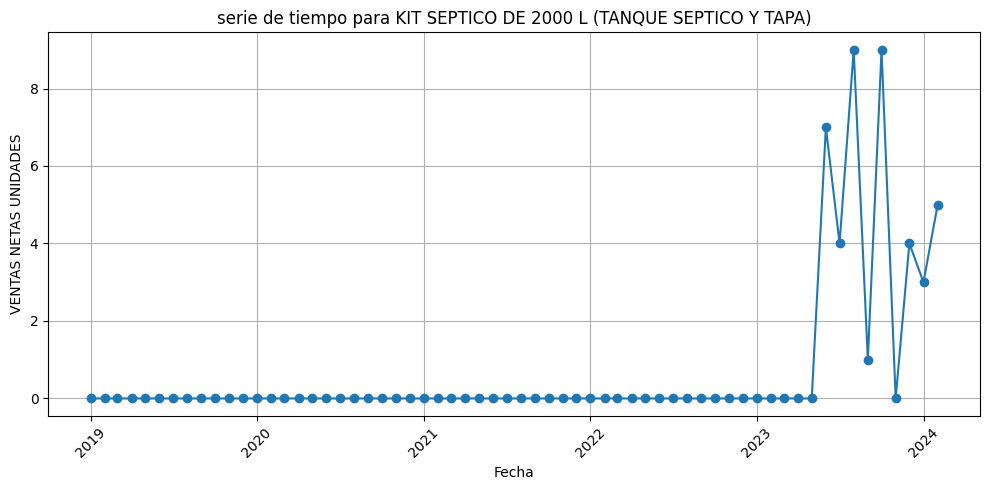

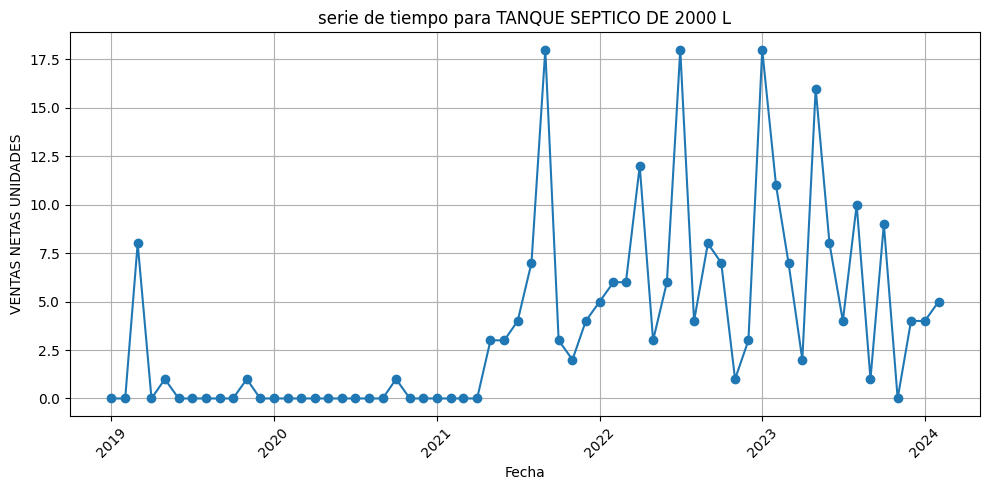

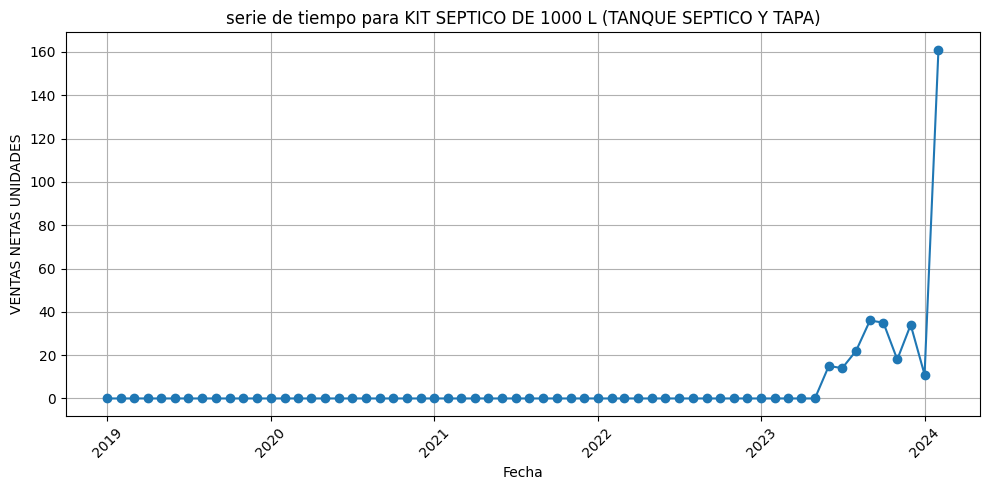

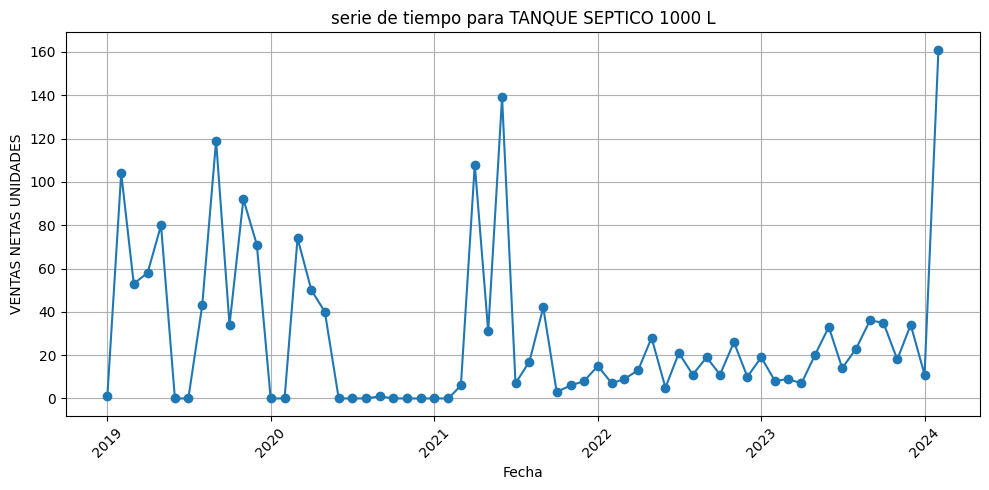

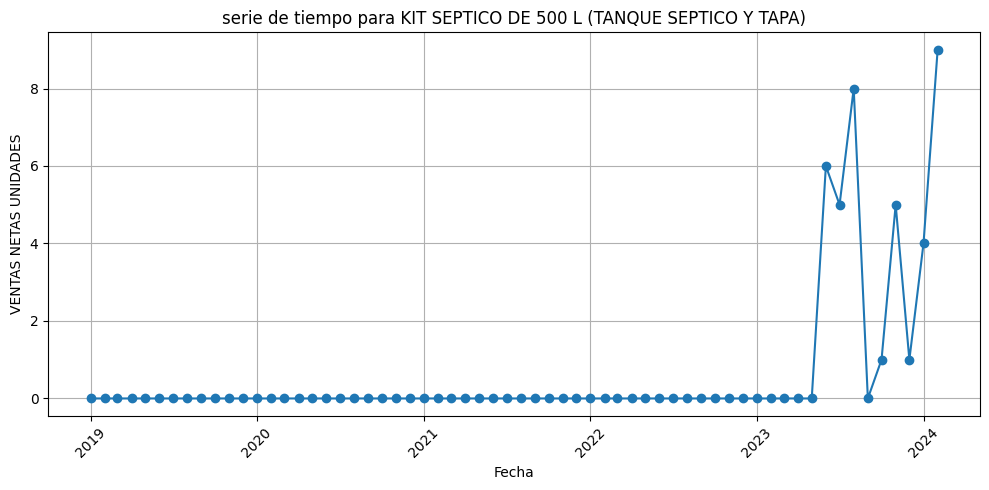

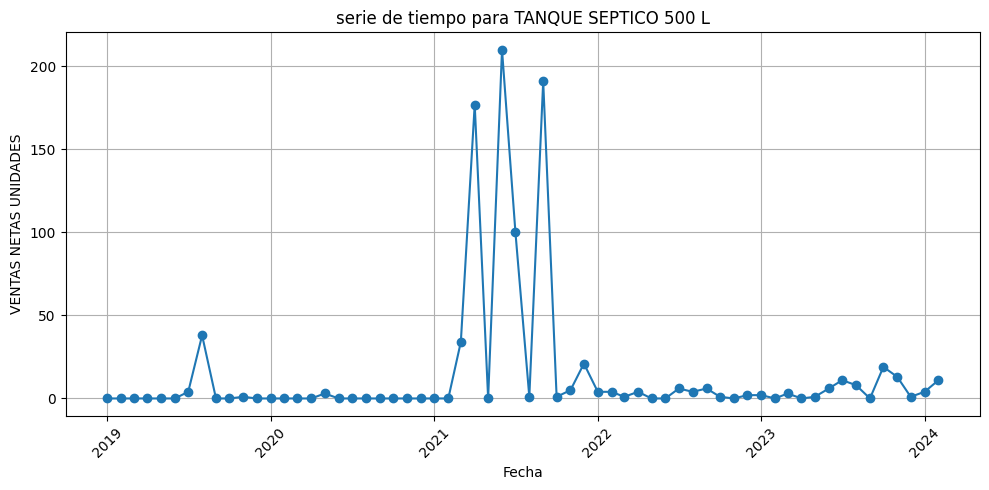

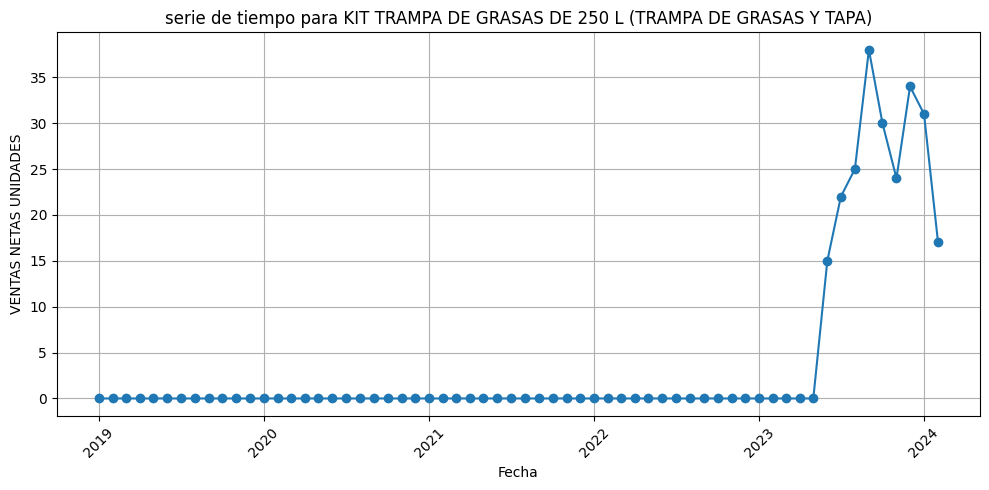

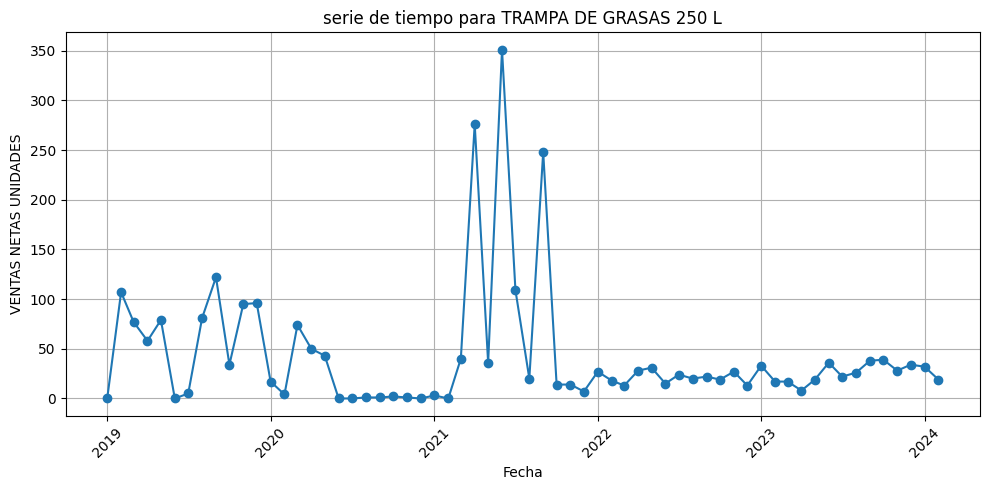

In [49]:
# Productos para analizar
productos = ['KIT SEPTICO DE 2000 L (TANQUE SEPTICO Y TAPA)','TANQUE SEPTICO DE 2000 L','KIT SEPTICO DE 1000 L (TANQUE SEPTICO Y TAPA)','TANQUE SEPTICO 1000 L','KIT SEPTICO DE 500 L (TANQUE SEPTICO Y TAPA)','TANQUE SEPTICO 500 L','KIT TRAMPA DE GRASAS DE 250 L (TRAMPA DE GRASAS Y TAPA)','TRAMPA DE GRASAS 250 L']

graficar_ventas_netas_productos(productos,ventas_corregido)

Como podemos observar también hacen referencia los mismos productos porque se registran los kits y los productos que lo componen, así que se estandarizaran los nombres para estos productos también

In [50]:
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT SEPTICO DE 2000 L (TANQUE SEPTICO Y TAPA)', 'NOMBRE ITEM SAP'] = 'KIT SEPTICO 2000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TANQUE SEPTICO DE 2000 L', 'NOMBRE ITEM SAP'] = 'KIT SEPTICO 2000 L'

ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT SEPTICO DE 1000 L (TANQUE SEPTICO Y TAPA)', 'NOMBRE ITEM SAP'] = 'KIT SEPTICO 1000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TANQUE SEPTICO 1000 L', 'NOMBRE ITEM SAP'] = 'KIT SEPTICO 1000 L'

ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT SEPTICO DE 500 L (TANQUE SEPTICO Y TAPA)', 'NOMBRE ITEM SAP'] = 'KIT SEPTICO 500 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TANQUE SEPTICO 500 L', 'NOMBRE ITEM SAP'] = 'KIT SEPTICO 500 L'

ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT TRAMPA DE GRASAS DE 250 L (TRAMPA DE GRASAS Y TAPA)', 'NOMBRE ITEM SAP'] = 'KIT TRAMPA DE GRASAS 250 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TRAMPA DE GRASAS 250 L', 'NOMBRE ITEM SAP'] = 'KIT TRAMPA DE GRASAS 250 L'

In [51]:
# Se borran los registros duplicados omitiendo la columna "CODIGO SAP"
ventas_corregido = ventas_corregido.drop_duplicates(subset=ventas_corregido.columns.difference(['CODIGO SAP']))

In [52]:
nombres_items = ventas_corregido['NOMBRE ITEM SAP'].value_counts()
nombres_items_df = nombres_items.reset_index()
nombres_items_df.columns = ['Nombre Item', 'Frecuencia']
nombres_items_df.to_csv('nombres_items_corregido_6.csv', index=False)

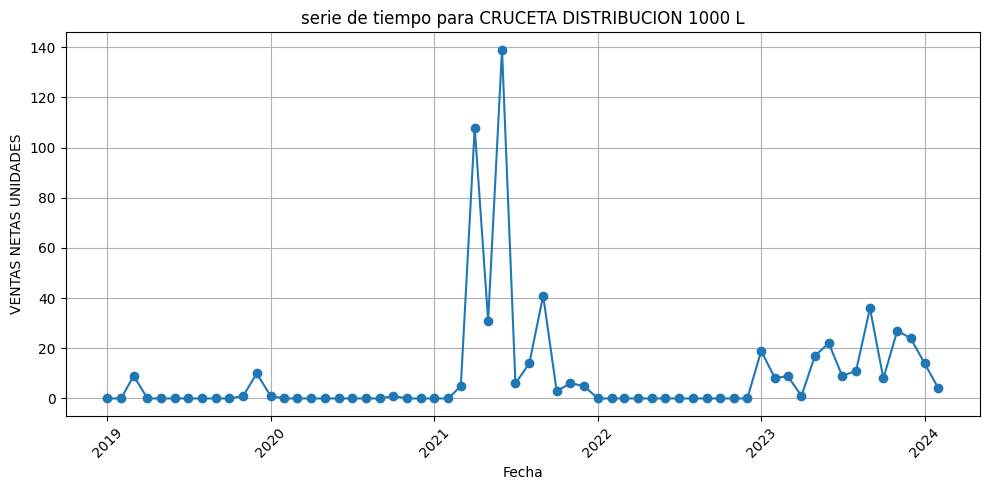

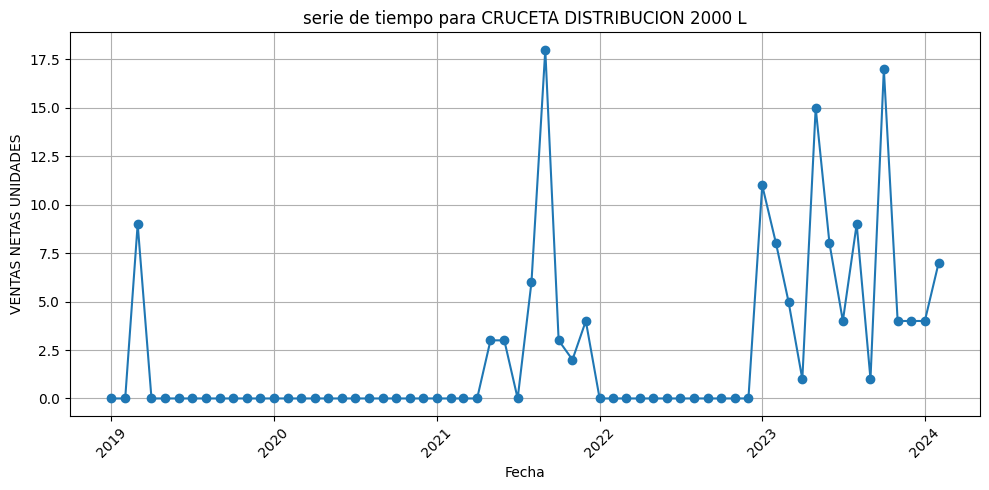

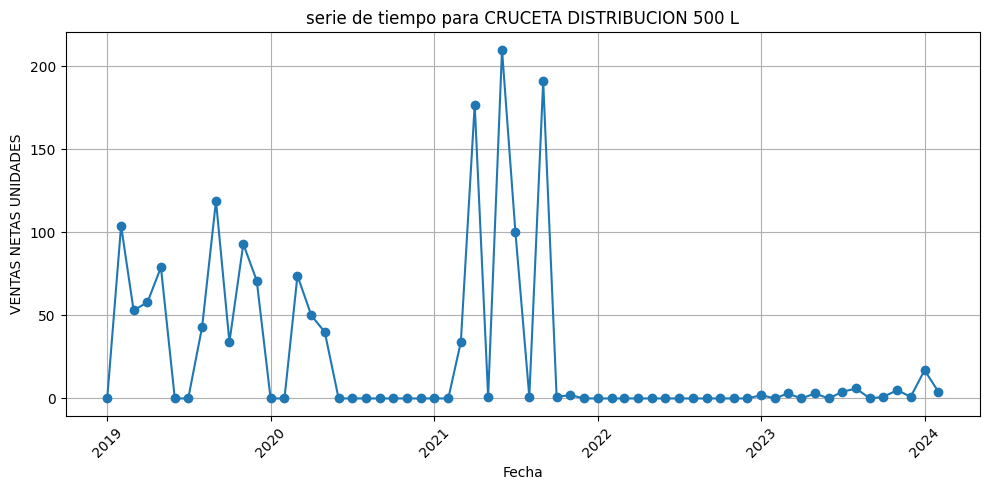

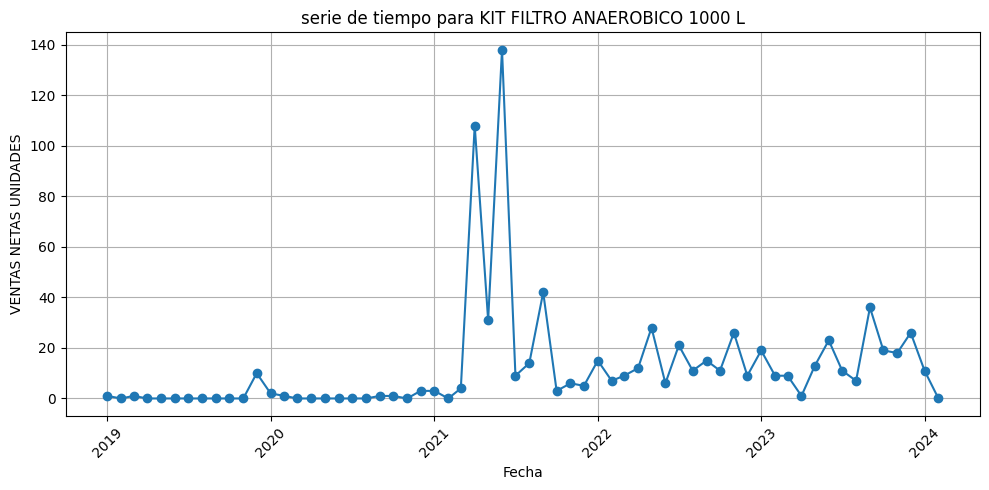

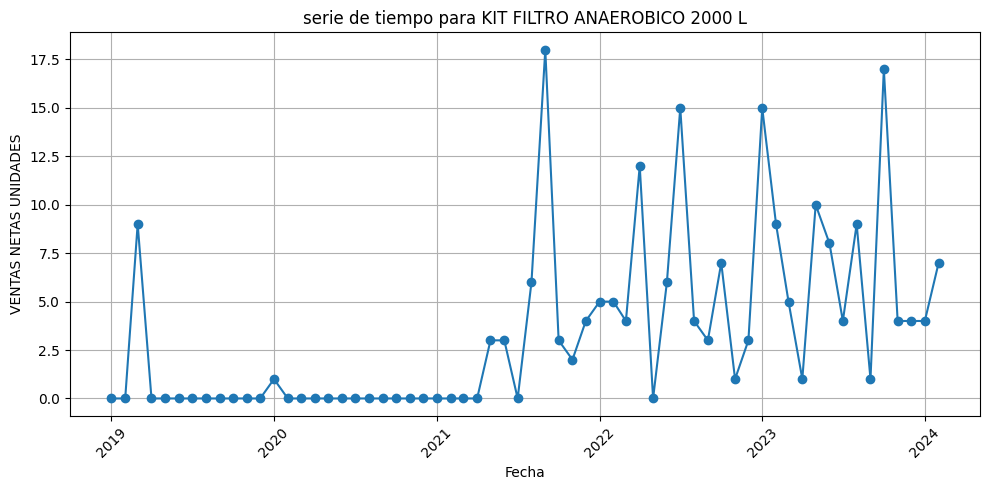

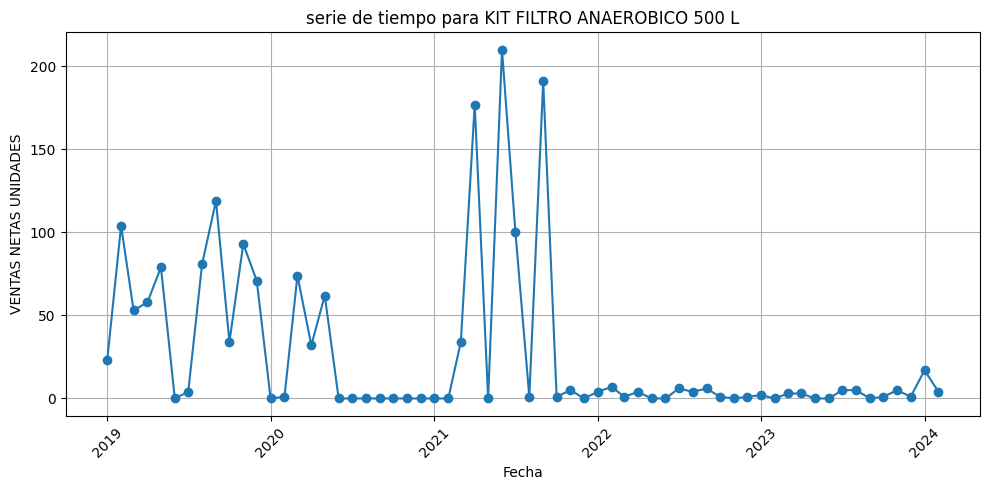

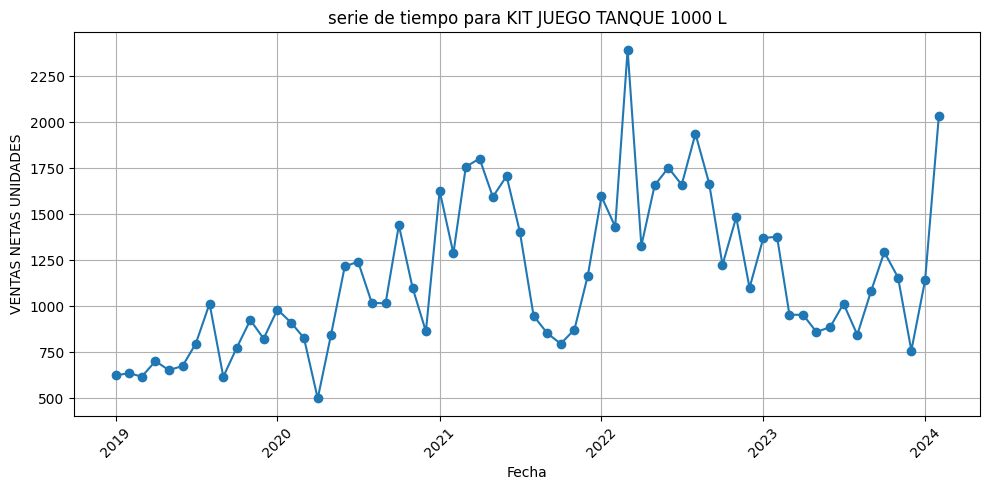

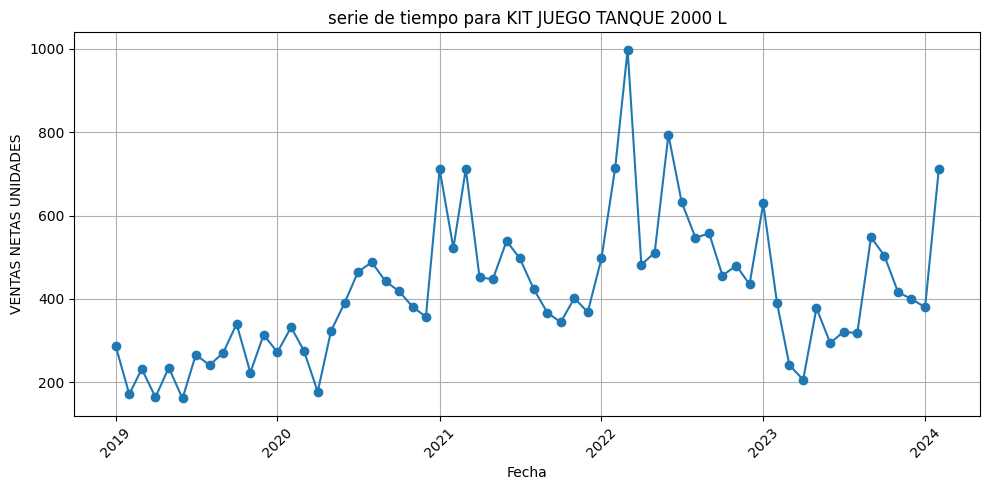

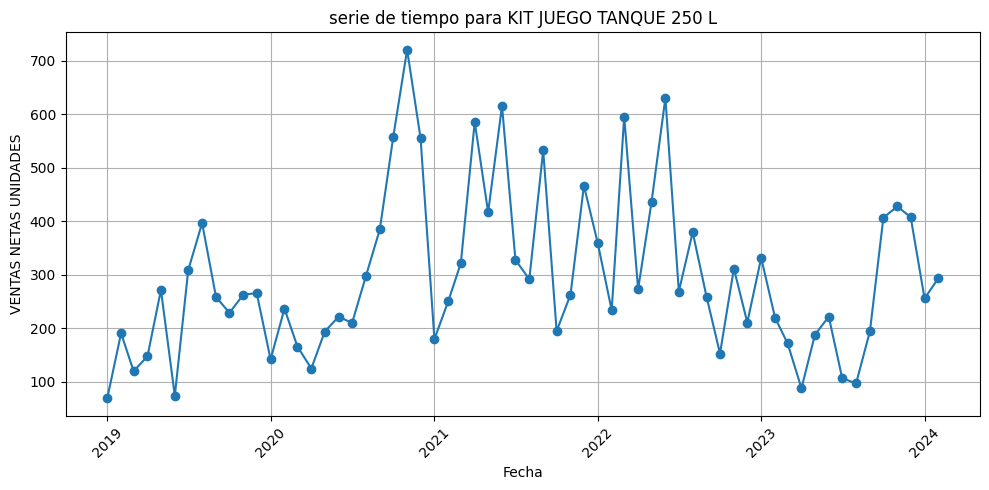

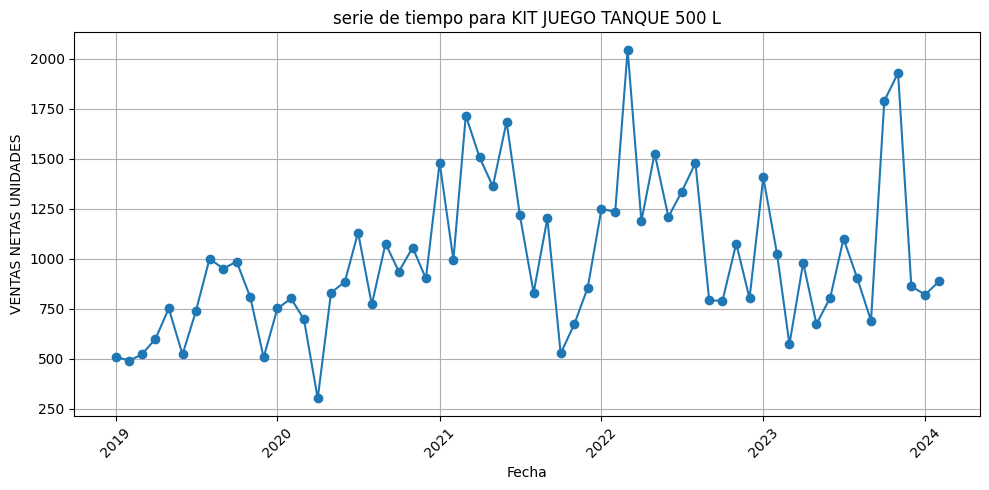

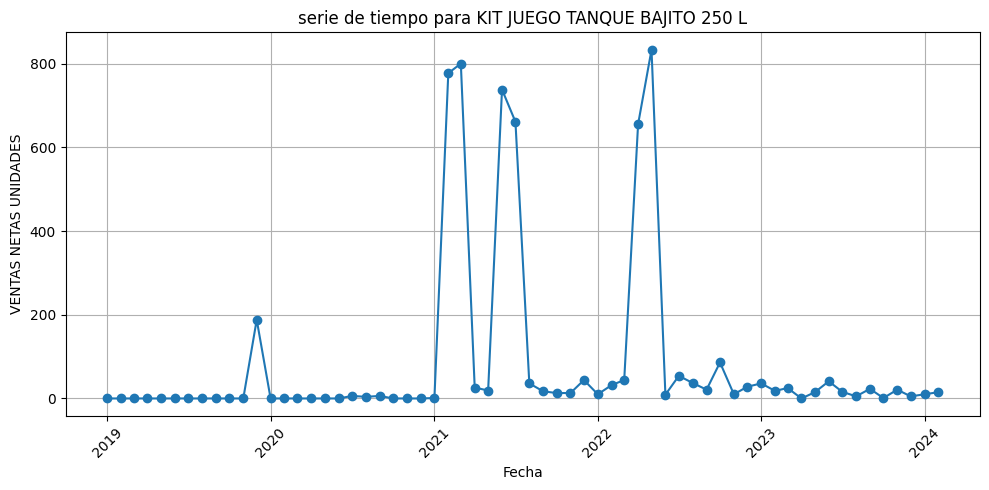

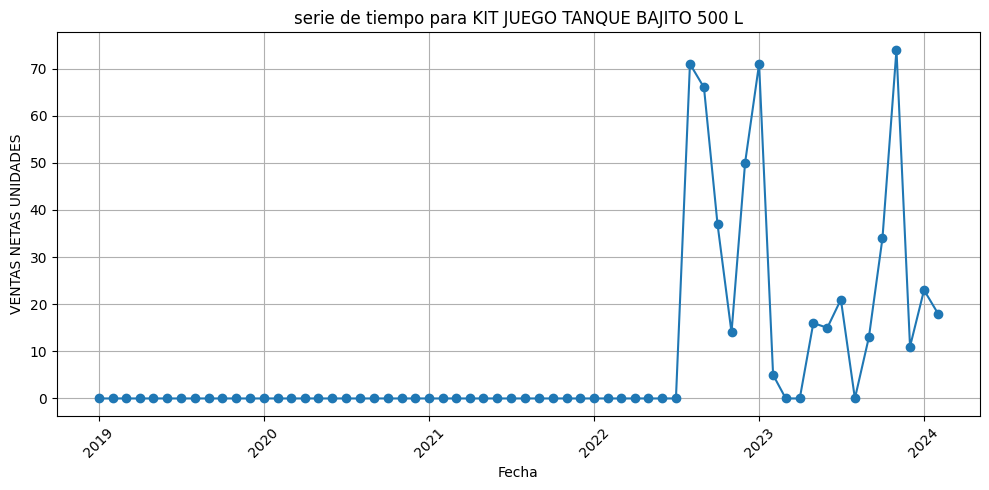

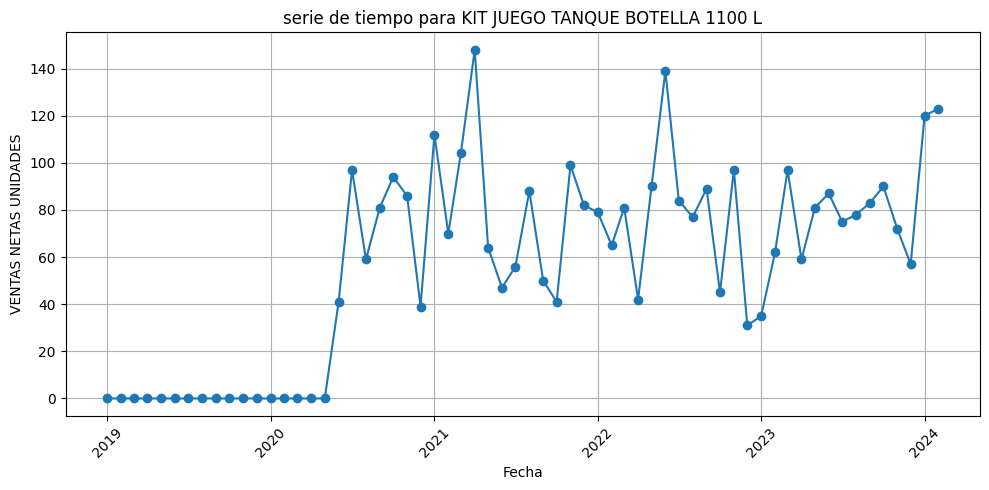

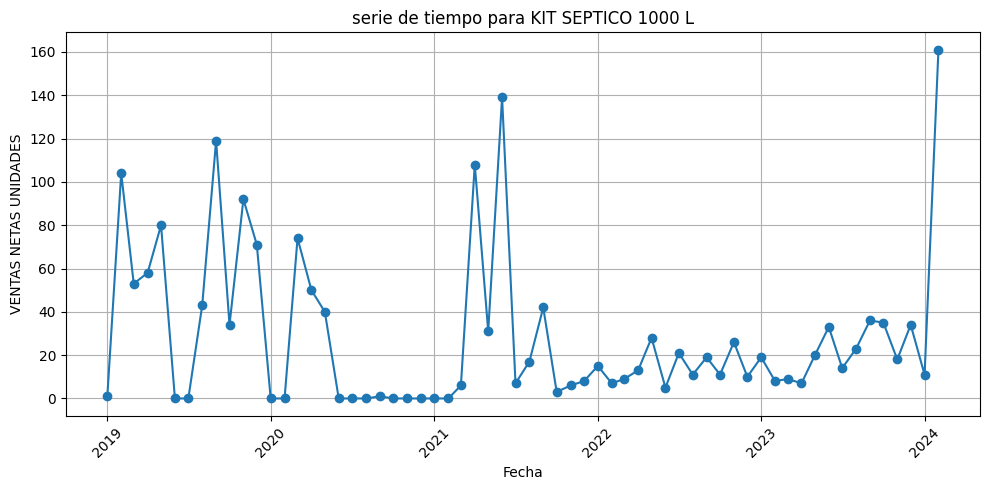

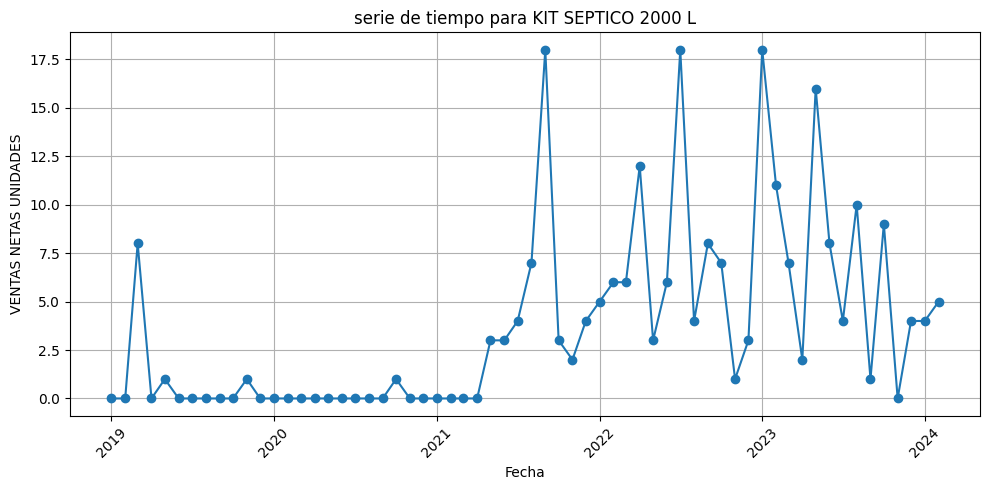

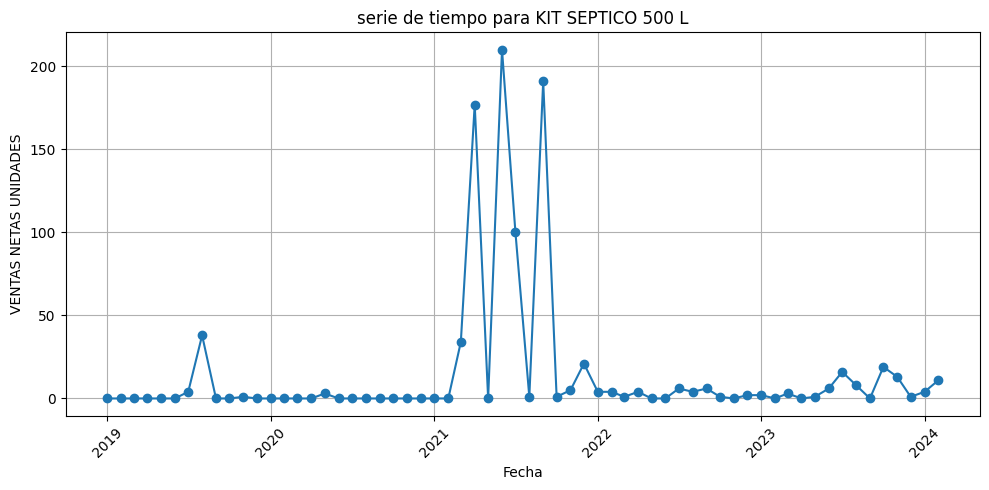

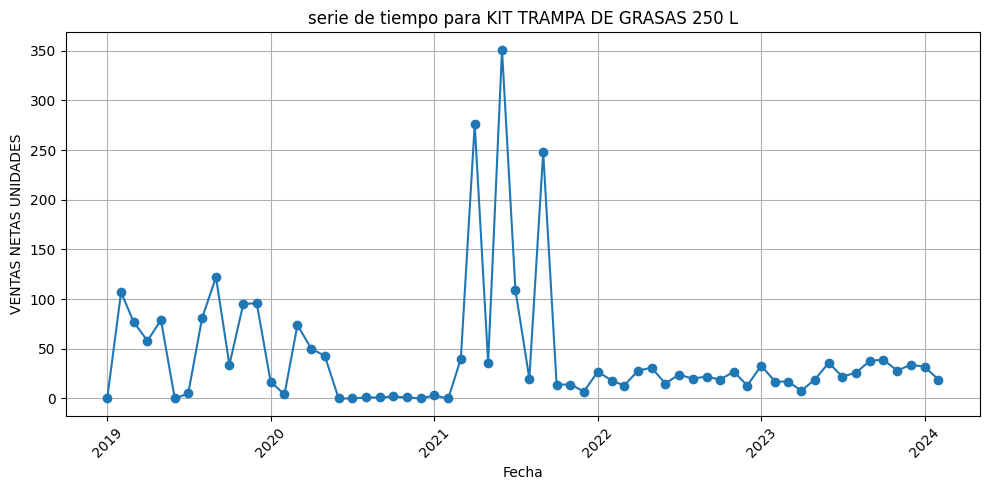

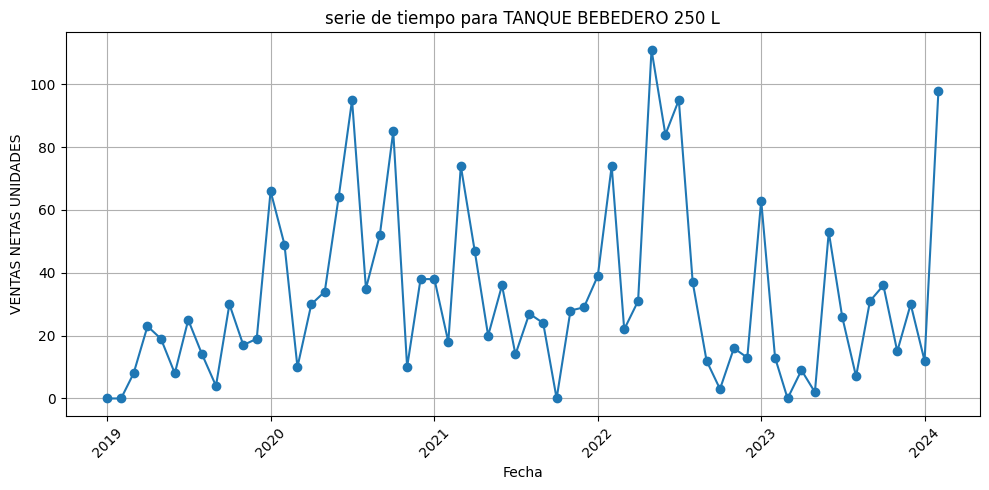

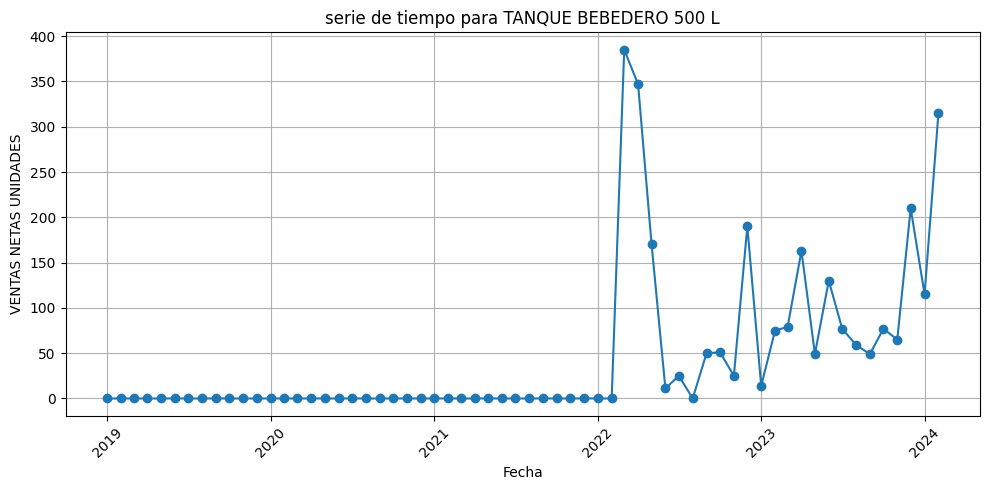

In [53]:
# Productos para analizar
productos = ventas_corregido['NOMBRE ITEM SAP'].unique().tolist()
productos.sort()

graficar_ventas_netas_productos(productos,ventas_corregido)

KIT JUEGO TANQUE 2000 L
KIT JUEGO TANQUE 1000 L
KIT JUEGO TANQUE 500 L
KIT JUEGO TANQUE 250 L


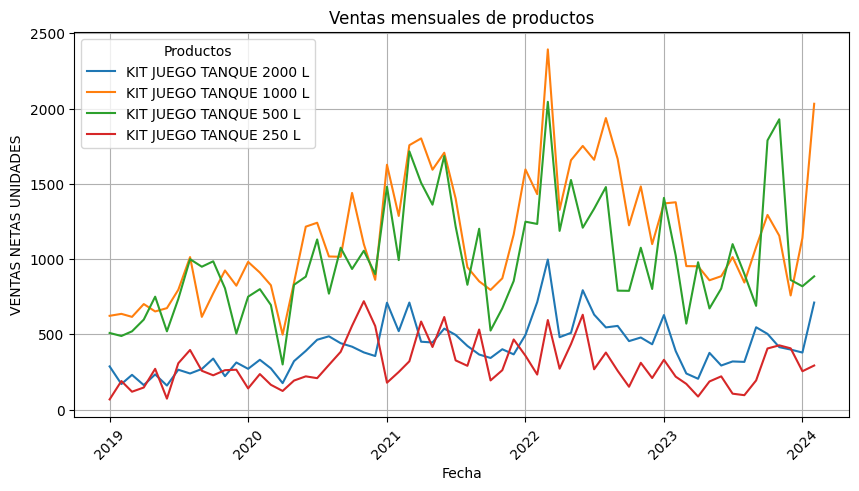

In [54]:
# Productos para analizar
productos = ['KIT JUEGO TANQUE 2000 L','KIT JUEGO TANQUE 1000 L', 'KIT JUEGO TANQUE 500 L', 'KIT JUEGO TANQUE 250 L']

# Graficar
plt.figure(figsize=(10, 5))

for producto in productos:
    # Filtrar los datos de cada producto
    df_producto = ventas_corregido[ventas_corregido['NOMBRE ITEM SAP'] == producto]
    # Agrupar las ventas por mes y llenar los meses faltantes con 0
    df_mensual = df_producto.groupby(pd.Grouper(key='Fecha', freq='MS'))['VENTAS NETAS UNIDADES'].sum().reindex(rango_fechas, fill_value=0).reset_index()
    df_mensual.columns = ['Fecha', 'VENTAS NETAS UNIDADES']
    print(producto)
    plt.plot(df_mensual['Fecha'], df_mensual['VENTAS NETAS UNIDADES'], linestyle='-', label=producto)

plt.title('Ventas mensuales de productos')
plt.xlabel('Fecha')
plt.ylabel('VENTAS NETAS UNIDADES')
plt.legend(title='Productos', fontsize=10)
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad
plt.show()


In [55]:
# Lista de productos a filtrar
productos = ['KIT JUEGO TANQUE 2000 L', 'KIT JUEGO TANQUE 1000 L', 'KIT JUEGO TANQUE 500 L', 'KIT JUEGO TANQUE 250 L']

# Filtrar el DataFrame
ventas_final = ventas_corregido[ventas_corregido['NOMBRE ITEM SAP'].isin(productos)][['Fecha', 'NOMBRE ITEM SAP', 'VENTAS NETAS UNIDADES']]


In [56]:
ventas_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14834 entries, 0 to 17538
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha                  14834 non-null  datetime64[ns]
 1   NOMBRE ITEM SAP        14834 non-null  object        
 2   VENTAS NETAS UNIDADES  14834 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 463.6+ KB


In [57]:
ventas_final = ventas_final.reset_index(drop=True)

In [58]:
ventas_final.to_excel("ventas_procesadas_sin_juntar.xlsx", index=False)

In [59]:
# Convertir el DataFrame para que cada valor único de "NOMBRE ITEM SAP" sea una columna
ventas_final = ventas_final.pivot_table(
    index='Fecha', 
    columns='NOMBRE ITEM SAP', 
    values='VENTAS NETAS UNIDADES',
    aggfunc='sum',
    fill_value=0
)

# Eliminar el nombre del índice de columnas
ventas_final.columns.name = None

# Restablecer el índice si necesitas que "Fecha" sea una columna en lugar de índice
ventas_final = ventas_final.reset_index()

In [64]:
# Especifica la ruta al directorio donde quieres guardar el archivo
directorio = os.path.join(os.getcwd(), "dataset_final")  # Ruta absoluta basada en el directorio actual del proyecto

# Crear la carpeta si no existe
os.makedirs(directorio, exist_ok=True)

# Guardar el DataFrame en el archivo CSV dentro de la carpeta
ventas_final.to_csv(os.path.join(directorio, "ventas_procesadas.csv"), index=False)

print("Archivo guardado correctamente en la carpeta 'dataset_final'")

Archivo guardado correctamente en la carpeta 'dataset_final'


In [61]:
ventas_corregido.isnull().sum()

Fecha                       0
CODIGO SAP                  8
NOMBRE ITEM SAP             0
BODEGA MOVIMIENTO           0
CIUDAD                   9226
VENTAS NETAS UNIDADES       0
dtype: int64